# **IMPORT LIBRARIES**

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import plotly.express as px
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
!pip install pmdarima
import pmdarima as pm
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# **CONNECT TO GOOGLE DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **READ THE DATA**

## **Growing Of Crops GDP**

In [3]:
gdp_df = pd.read_excel('/content/drive/MyDrive/timeseriescheckpoint/.ipynb_checkpoints/GDP.xlsx', index_col=0)
gdp_df.head()

2018  2019  2020+  2021+  \
Industry                                                                       
Agriculture, forestry and fishing……………………………………...  20.3  20.9   22.7   21.5   
Growing of crops……………………………………………...                14.5  15.1   16.7   15.3   
Animal production……………………………………………...                3.7   3.5    3.6    3.6   
Support activities to agriculture……………………………………...   0.2   0.2    0.2    0.2   
Forestry & logging……………………………………………...               1.3   1.5    1.6    1.7   

                                                    2022*  
Industry                                                   
Agriculture, forestry and fishing……………………………………...   21.2  
Growing of crops……………………………………………...                 15.2  
Animal production……………………………………………...                 3.5  
Support activities to agriculture……………………………………...    0.2  
Forestry & logging……………………………………………...                1.6

Observation:

The GDP data presented here is crucial for understanding the economic contribution of various sectors. Specifically, the "Growing of crops" segment within the "Agriculture, forestry and fishing" industry shows the economic value of crops over the years 2018 to 2022.

## **Population**

In [4]:
# Specify the path to the excel file
file_path = '/content/drive/MyDrive/Highlights-of-Population-Projections.xlsx'

# Read the Excel file into a pandas DataFrame
population_df = pd.read_excel(file_path, header=2)

population_df.head()

County   2019   2020   2021   2022
0       Kenya  47564  48818  49720  50623
1     Mombasa   1208   1228   1256   1284
2       Kwale    866    879    901    923
3      Kilifi   1453   1489   1518   1548
4  Tana River    315    326    335    344

## **Retail and Wholesale Prices of Crops**

In [5]:
# Read the CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/wfp_food_prices_ken.csv")
df.head()

date      admin1      admin2            market  longitude  \
0       #date  #adm1+name  #adm2+name  #loc+market+name   #geo+lon   
1  15/01/2012       Coast     Mombasa           Mombasa  39.666667   
2  15/01/2012       Coast     Mombasa           Mombasa  39.666667   
3  15/01/2012       Coast     Mombasa           Mombasa  39.666667   
4  15/01/2012       Coast     Mombasa           Mombasa  39.666667   

    commodity        unit         priceflag         pricetype   currency  \
0  #item+name  #item+unit  #item+price+flag  #item+price+type  #currency   
1       Maize       90 KG            actual         Wholesale        KES   
2    Potatoes       50 KG            actual         Wholesale        KES   
3       Beans          KG            actual         Wholesale        KES   
4       Beans       90 KG            actual         Wholesale        KES   

    price    usdprice  
0  #value  #value+usd  
1    3020     35.5983  
2    2180     25.6968  
3   62.49      0.7366  
4    5470     64.4777

## **Material Inputs**

### **Fertilizer**

In [6]:
#Fertilizer data
df_fert = pd.read_csv("/content/drive/MyDrive/Fert_data.csv")
df_fert = df_fert[pd.to_datetime(df_fert['Date'], format='%d-%b-%y', errors='coerce').notna()]

# Convert the 'Date' column to datetime format
df_fert['Date'] = pd.to_datetime(df_fert['Date'], format='%d-%b-%y')
df_fert['Value'] = df_fert['Value'].astype(float)

df_fert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    300 non-null    datetime64[ns]
 1   Value   300 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.0 KB


### **Grains**

In [7]:
# Grains data
df_grains = pd.read_csv("/content/drive/MyDrive/Grains.csv")
df_grains = df_grains[pd.to_datetime(df_grains['Date'], format='%d-%b-%y', errors='coerce').notna()]

# Convert the 'Date' column to datetime format
df_grains['Date'] = pd.to_datetime(df_grains['Date'], format='%d-%b-%y')
df_grains['Value'] = df_grains['Value'].astype(float)

df_grains.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    300 non-null    datetime64[ns]
 1   Value   300 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.0 KB


### **Fuel**

In [8]:
#Fertilizer data
df_fuels = pd.read_csv("/content/drive/MyDrive/Fuels.csv")
df_fuels = df_fuels[pd.to_datetime(df_fuels['Date'], format='%d-%b-%y', errors='coerce').notna()]

# Convert the 'Date' column to datetime format
df_fuels['Date'] = pd.to_datetime(df_fuels['Date'], format='%d-%b-%y')
df_fuels['Value'] = df_fuels['Value'].astype(float)

df_fuels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    250 non-null    datetime64[ns]
 1   Value   250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB


In [9]:
df_fuels

Date   Value
0   2023-12-31  320.29
1   2023-11-30  369.78
2   2023-10-31  384.54
3   2023-09-30  420.69
4   2023-08-31  402.11
..         ...     ...
245 1999-05-31   52.60
246 1999-04-30   52.50
247 1999-03-31   42.80
248 1999-02-28   38.20
249 1999-01-31   40.90

[250 rows x 2 columns]

## **Climatic Conditions**

In [10]:
temp_df = pd.read_excel('/content/drive/MyDrive/Environment-and-Natural-Resources.xlsx')
temp_df

Region  2013  2014  2015  2016  2017  2018  2019  2020  \
0   Maximum Temperatures   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1              N-Western  35.5  35.9  36.2  36.0  35.9  35.0  36.0  35.4   
2              N-Eastern  30.9  33.0  32.9  33.0  33.5  31.4  32.5  31.3   
3                Western  26.2  26.2  26.9  26.6  26.2  25.3  26.6  25.8   
4          C-Rift Valley  24.0  24.4  24.9  24.7  25.3  24.0  25.2  24.1   
5                Central  23.9  24.0  24.6  24.0  25.0  24.1  25.2  24.4   
6                Nairobi  25.5  25.7  26.3  25.8  26.0  24.4  25.3  24.7   
7              S-Eastern  28.6  28.5  29.2  28.9  29.0  28.2  28.9  28.3   
8                Coastal  30.5  30.7  30.9  31.0  31.0  30.7  31.0  30.8   
9                Country  28.1  28.5  29.0  28.7  29.0  27.9  28.8  28.1   
10  Minimum Temperatures   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11             N-Western  24.3  24.2  24.7  24.9  23.8  24.7  24.3  24.7   
12             N-Eastern  21.1  21.1  20.9  21.4  22.5  20.6  21.6  21.7   
13               Western  13.8  13.8  14.2  14.2  13.1  13.3  14.6  14.6   
14         C-Rift Valley  10.3  10.4  10.7  10.5  10.2  10.7  11.2  11.7   
15               Central  13.4  13.6  13.4  13.6  12.8  13.0  13.4  13.5   
16               Nairobi  14.1  14.4  14.4  14.3  14.6  14.3  14.8  14.9   
17             S-Eastern  17.1  17.2  17.5  17.4  17.5  17.2  17.7  17.3   
18               Coastal  23.5  23.7  23.9  24.0  24.0  23.5  24.3  24.2   
19               Country  17.2  17.3  17.5  17.5  17.3  17.2  17.7  17.8   

    2021  2022  
0    NaN   NaN  
1   36.1  35.9  
2   31.0  32.1  
3   26.3  26.5  
4   24.6  24.9  
5   24.9  25.0  
6   24.1  24.9  
7   30.6  28.8  
8   31.0  30.5  
9   28.6  28.6  
10   NaN   NaN  
11  24.1  24.8  
12  21.2  21.8  
13  14.3  14.9  
14  10.9  11.9  
15  12.5  13.1  
16  14.4  15.4  
17  18.9  18.1  
18  24.1  24.5  
19  17.5  18.1

In [11]:
rain_df = pd.read_excel("/content/drive/MyDrive/Rain.xlsx")
rain_df

Region    2013    2014    2015    2016     2017    2018    2019  \
0      N-Western   296.0   139.3   170.0   219.3   226.23   282.7   309.5   
1      N-Eastern   529.0   396.6   394.2   367.0   367.70   971.3   555.3   
2        Western  1793.6  1508.4  1690.8  1407.2  1715.10  1830.5  1855.1   
3  C-Rift Valley  1173.5   744.0   901.8   888.7   786.30  1169.9  1062.6   
4        Central  1000.5  1032.9  1224.3   908.4  1033.40  1540.2  1582.8   
5        Nairobi   902.0   686.8  1110.0   877.2   618.10  1195.5  1006.3   
6      S-Eastern   621.0   491.5   573.4   392.7   601.60  1004.2   807.9   
7        Coastal  1020.8   997.5   947.3   571.1  1061.20  1314.2  1482.0   

     2020    2021    2022  
0   380.8   176.5   103.6  
1   427.0   247.7   246.1  
2  1971.7  1534.5  1369.6  
3  1212.5   784.1   846.4  
4  1334.2   987.9   770.6  
5  1061.0   846.4   697.2  
6   843.1   388.4   291.8  
7   938.5   495.2   716.0

# **DATA CLEANING AND PREPROCESSING**

## **Growing of Crops GDP**

In [12]:
# Select specific row
growing_of_crops_df = gdp_df[gdp_df.index == 'Growing of crops……………………………………………...']
growing_of_crops_df

2018  2019  2020+  2021+  2022*
Industry                                                             
Growing of crops……………………………………………...  14.5  15.1   16.7   15.3   15.2

Observation:

Each column represents a specific year, and there are 41 non-null values for each year. The data type for all columns is float64. The years mentioned are 2018, 2019, 2020+, 2021+, and 2022*.

There is need to clean the column names to create uniformity.

In [13]:
# Reset the index and move Industry to a column
growing_of_crops_df.reset_index(inplace=True)

growing_of_crops_df

Industry  2018  2019  2020+  2021+  2022*
0  Growing of crops……………………………………………...  14.5  15.1   16.7   15.3   15.2

In [14]:
# Rename the selected columns
growing_of_crops_df = growing_of_crops_df.rename(columns={
    '2020+': '2020',
    '2021+': '2021',
    '2022*': '2022'
})

growing_of_crops_df.columns

Index(['Industry', 2018, 2019, '2020', '2021', '2022'], dtype='object')

In [15]:
# Rename row to remove the dots in Growing of crops
growing_of_crops_df.loc[growing_of_crops_df['Industry'].str.contains('Growing of crops'), 'Industry'] = 'Growing of Crops'

growing_of_crops_df

Industry  2018  2019  2020  2021  2022
0  Growing of Crops  14.5  15.1  16.7  15.3  15.2

In [16]:
# Display basic information about current df
print("DataFrame Info:")
print(growing_of_crops_df.info())

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(growing_of_crops_df.describe())

# Check for missing values
print("\nMissing Values:")
print(growing_of_crops_df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Industry  1 non-null      object 
 1   2018      1 non-null      float64
 2   2019      1 non-null      float64
 3   2020      1 non-null      float64
 4   2021      1 non-null      float64
 5   2022      1 non-null      float64
dtypes: float64(5), object(1)
memory usage: 176.0+ bytes
None

Descriptive Statistics:
       2018  2019  2020  2021  2022
count   1.0   1.0   1.0   1.0   1.0
mean   14.5  15.1  16.7  15.3  15.2
std     NaN   NaN   NaN   NaN   NaN
min    14.5  15.1  16.7  15.3  15.2
25%    14.5  15.1  16.7  15.3  15.2
50%    14.5  15.1  16.7  15.3  15.2
75%    14.5  15.1  16.7  15.3  15.2
max    14.5  15.1  16.7  15.3  15.2

Missing Values:
Industry    0
2018        0
2019        0
2020        0
2021        0
2022        0
dtype: int64


Observation:

The standard deviation is not available (NaN) for all years due to having only one data point.

## **Population**

In [17]:
# Check the data structure
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   County  48 non-null     object
 1   2019    48 non-null     object
 2   2020    48 non-null     int64 
 3   2021    48 non-null     int64 
 4   2022    48 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ KB


Observation:

The 2019 column contains a mix of numeric and non-numeric values, which prevents it from being correctly identified as an integer column. The goal is to clean this column, ensuring it only contains numeric values.

In [18]:
# Check for missing values
print('Sum of Missing Values:')
print(population_df.isnull().sum())
print('')
# Display basic statistics
print("Basic Statistics:")
print(population_df.describe())

Sum of Missing Values:
County    0
2019      0
2020      0
2021      0
2022      0
dtype: int64

Basic Statistics:
               2020          2021          2022
count     48.000000     48.000000     48.000000
mean    2034.145833   2071.645833   2109.250000
std     6931.938555   7060.002840   7188.187525
min      155.000000    159.000000    163.000000
25%      635.500000    645.000000    652.500000
50%      915.500000    931.000000    946.000000
75%     1186.000000   1210.000000   1240.750000
max    48818.000000  49720.000000  50623.000000


In [19]:
# Display unique values in 2019 column
print(population_df[2019].unique())

[47564 1208 866 1453 315 143 340 841 781 867 459 268 '1,545,' 393 608 1136
 '1,421,' 987 638 759 610 1056 2417 926 621 310 990 1163 454 885 666 518
 2162 1157 1117 901 875 1867 590 1670 893 993 1155 1131 1116 1266 605 4397]


In [20]:
# Replace commas and convert to numeric for the 2019 column
population_df[2019] = population_df[2019].replace(',', '', regex=True)

# Convert 2019 column to integer
population_df[2019] = population_df[2019].astype(int)

# Check data types
print(population_df.dtypes)

County    object
2019       int64
2020       int64
2021       int64
2022       int64
dtype: object


In [21]:
# Separate the first row (Kenyan population) and the rest (County populations)
kenyan_population = population_df.iloc[0:1]
county_population = population_df.iloc[1:]

# Display the DataFrames
print("Kenyan Population:")
print(kenyan_population)

print("\nCounty Population:")
print(county_population)

Kenyan Population:
  County   2019   2020   2021   2022
0  Kenya  47564  48818  49720  50623

County Population:
             County  2019  2020  2021  2022
1           Mombasa  1208  1228  1256  1284
2             Kwale   866   879   901   923
3            Kilifi  1453  1489  1518  1548
4        Tana River   315   326   335   344
5              Lamu   143   155   159   163
6      Taita/Taveta   340   351   355   360
7           Garissa   841   861   883   905
8             Wajir   781   804   826   848
9           Mandera   867   887   911   935
10         Marsabit   459   480   491   503
11           Isiolo   268   294   301   309
12             Meru  1545  1565  1586  1606
13    Tharaka-Nithi   393   403   408   412
14             Embu   608   629   635   642
15            Kitui  1136  1186  1201  1215
16         Machakos  1421  1442  1457  1472
17          Makueni   987  1008  1019  1031
18        Nyandarua   638   657   670   683
19            Nyeri   759   810   818   827
20     

In [22]:
# Display basic statistics
print("County Basic Statistics:")
print(county_population.describe())

County Basic Statistics:
              2019         2020         2021         2022
count    47.000000    47.000000    47.000000    47.000000
mean   1011.468085  1038.744681  1057.851064  1077.042553
std     693.268655   709.187792   722.010748   734.723875
min     143.000000   155.000000   159.000000   163.000000
25%     609.000000   634.000000   644.000000   651.000000
50%     893.000000   914.000000   930.000000   942.000000
75%    1156.000000  1184.500000  1208.500000  1235.500000
max    4397.000000  4516.000000  4594.000000  4672.000000


Observation:

Over the observed years (2019-2022), there's a consistent upward trend in the mean values, suggesting overall growth. The increasing standard deviation indicates a widening spread of data. The rise in minimum values implies an upward shift in the lowest recorded figures across the 47 counties.

## **Retail and Wholesale Prices of crops**

In [23]:
# Select specific rows based on item names
selected_items = ['Maize', 'Beans', 'Potatoes','Bananas']
filtered_df = df[df['commodity'].isin(selected_items)]
filtered_df.head()

date   admin1   admin2   market  longitude commodity   unit  \
1  15/01/2012    Coast  Mombasa  Mombasa  39.666667     Maize  90 KG   
2  15/01/2012    Coast  Mombasa  Mombasa  39.666667  Potatoes  50 KG   
3  15/01/2012    Coast  Mombasa  Mombasa  39.666667     Beans     KG   
4  15/01/2012    Coast  Mombasa  Mombasa  39.666667     Beans  90 KG   
5  15/01/2012  Eastern    Kitui    Kitui  38.016667     Maize     KG   

  priceflag  pricetype currency  price usdprice  
1    actual  Wholesale      KES   3020  35.5983  
2    actual  Wholesale      KES   2180  25.6968  
3    actual  Wholesale      KES  62.49   0.7366  
4    actual  Wholesale      KES   5470  64.4777  
5    actual     Retail      KES     42   0.4951

In [24]:
#Getting unique commodities in our DF
unique_items = filtered_df['commodity'].unique()
print(unique_items)

['Maize' 'Potatoes' 'Beans' 'Bananas']


Observation:

Our crops of focus will be Maize, Potatoes, Beans and Bananas.

In [25]:
#checking for missing values
missing_data = filtered_df.isna().sum()

print("Missing data per column:")
print(missing_data)

Missing data per column:
date         0
admin1       0
admin2       0
market       0
longitude    0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64


In [26]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 1 to 13450
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       6394 non-null   object
 1   admin1     6394 non-null   object
 2   admin2     6394 non-null   object
 3   market     6394 non-null   object
 4   longitude  6394 non-null   object
 5   commodity  6394 non-null   object
 6   unit       6394 non-null   object
 7   priceflag  6394 non-null   object
 8   pricetype  6394 non-null   object
 9   currency   6394 non-null   object
 10  price      6394 non-null   object
 11  usdprice   6394 non-null   object
dtypes: object(12)
memory usage: 649.4+ KB


In [27]:
# Dropping the 'usdprice' column as we already have local prices in KES and longitude as we already have location details
filtered_df = filtered_df.drop(['usdprice', 'longitude'], axis=1)

In [28]:
# Convert 'date' column to datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%d/%m/%Y')
# Sort the dataframe by date
filtered_df.sort_values(by='date', inplace=True)
# Setting the date time as the index
filtered_df.set_index('date', inplace=True)

In [29]:
# Replace 'KG' with 1 and convert 'grams' to numeric values
filtered_df['unit'] = filtered_df['unit'].replace({'KG': 1, 'grams': 0.001})

filtered_df.head()

admin1       admin2                      market commodity  \
date                                                                         
2012-01-15        Coast      Mombasa                     Mombasa     Maize   
2012-01-15  Rift Valley  Uasin Gishu  Eldoret town (Uasin Gishu)     Beans   
2012-01-15  Rift Valley  Uasin Gishu  Eldoret town (Uasin Gishu)     Beans   
2012-01-15  Rift Valley  Uasin Gishu  Eldoret town (Uasin Gishu)  Potatoes   
2012-01-15  Rift Valley  Uasin Gishu  Eldoret town (Uasin Gishu)     Maize   

             unit priceflag  pricetype currency    price  
date                                                      
2012-01-15  90 KG    actual  Wholesale      KES     3020  
2012-01-15  90 KG    actual  Wholesale      KES     5400  
2012-01-15      1    actual  Wholesale      KES    77.03  
2012-01-15  50 KG    actual  Wholesale      KES  1388.88  
2012-01-15  90 KG    actual  Wholesale      KES     2800

In [30]:
# Display unique values and their counts in the 'unit' column
unit_counts = filtered_df['unit'].value_counts()

# Print the result
print(unit_counts)

1        2948
90 KG    2199
50 KG     920
Unit      327
Name: unit, dtype: int64


In [31]:
#Removing 'KG' and spaces from our unit column to work with integers
filtered_df['unit'] = filtered_df['unit'].str.replace('KG', '').str.strip()
# Fill NaN values with a default value (e.g., 0)
filtered_df['unit'] = filtered_df['unit'].fillna(1)
filtered_df.head()

admin1       admin2                      market commodity  \
date                                                                         
2012-01-15        Coast      Mombasa                     Mombasa     Maize   
2012-01-15  Rift Valley  Uasin Gishu  Eldoret town (Uasin Gishu)     Beans   
2012-01-15  Rift Valley  Uasin Gishu  Eldoret town (Uasin Gishu)     Beans   
2012-01-15  Rift Valley  Uasin Gishu  Eldoret town (Uasin Gishu)  Potatoes   
2012-01-15  Rift Valley  Uasin Gishu  Eldoret town (Uasin Gishu)     Maize   

           unit priceflag  pricetype currency    price  
date                                                    
2012-01-15   90    actual  Wholesale      KES     3020  
2012-01-15   90    actual  Wholesale      KES     5400  
2012-01-15    1    actual  Wholesale      KES    77.03  
2012-01-15   50    actual  Wholesale      KES  1388.88  
2012-01-15   90    actual  Wholesale      KES     2800

In [32]:
maize_data = filtered_df[filtered_df['commodity'] == 'Maize']
bananas_data = filtered_df[filtered_df['commodity'] == 'Bananas']
beans_data = filtered_df[filtered_df['commodity'] == 'Beans']
potatoes_data = filtered_df[filtered_df['commodity'] == 'Potatoes']

# Display unique values in the 'item' column under the 'Maize' commodity
unique_maize_items = maize_data['unit'].unique()
unique_bananas_items = bananas_data['unit'].unique()
unique_beans_items = beans_data['unit'].unique()
unique_potatoes_items = potatoes_data['unit'].unique()

# Print the unique values
print(unique_maize_items)
print(unique_bananas_items)
print(unique_beans_items)
print(unique_potatoes_items)

['90' 1]
['Unit']
['90' 1]
['50' 1]


Observation:

The unique quantities for each crop are as follows:

Maize: 90 KGS and 1 KG

Bananas: 1 KG

Beans: 90 KGS and 1 KG

Potatoes: 50 KGS and 1 KG







In [33]:
# # Replace 'unit' values for bananas to be 1
# filtered_df['unit'] = filtered_df.apply(lambda row: 1 if row['commodity'] == 'Bananas' else row['unit'], axis=1)
# filtered_df.head()

## **Climatic Conditions**

### **Rainfall**

In [34]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  8 non-null      object 
 1   2013    8 non-null      float64
 2   2014    8 non-null      float64
 3   2015    8 non-null      float64
 4   2016    8 non-null      float64
 5   2017    8 non-null      float64
 6   2018    8 non-null      float64
 7   2019    8 non-null      float64
 8   2020    8 non-null      float64
 9   2021    8 non-null      float64
 10  2022    8 non-null      float64
dtypes: float64(10), object(1)
memory usage: 832.0+ bytes


In [35]:
rain_df.describe()

2013         2014         2015        2016        2017  \
count     8.000000     8.000000     8.000000     8.00000     8.00000   
mean    917.050000   749.625000   876.475000   703.95000   801.20375   
std     459.190667   428.478477   488.123148   389.77193   470.38443   
min     296.000000   139.300000   170.000000   219.30000   226.23000   
25%     598.000000   467.775000   528.600000   386.27500   543.12500   
50%     951.250000   715.400000   924.550000   724.15000   702.20000   
75%    1058.975000  1006.350000  1138.575000   893.62500  1040.35000   
max    1793.600000  1508.400000  1690.800000  1407.20000  1715.10000   

             2018         2019         2020         2021         2022  
count     8.00000     8.000000     8.000000     8.000000     8.000000  
mean   1163.56250  1082.687500  1021.100000   682.587500   630.162500  
std     454.92437   529.674734   512.883111   450.875657   407.846701  
min     282.70000   309.500000   380.800000   176.500000   103.600000  
25%     995.97500   744.750000   739.075000   353.225000   280.375000  
50%    1182.70000  1034.450000   999.750000   639.650000   706.600000  
75%    1370.70000  1507.200000  1242.925000   881.775000   789.550000  
max    1830.50000  1855.100000  1971.700000  1534.500000  1369.600000

### **Temperature**

In [36]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  20 non-null     object 
 1   2013    18 non-null     float64
 2   2014    18 non-null     float64
 3   2015    18 non-null     float64
 4   2016    18 non-null     float64
 5   2017    18 non-null     float64
 6   2018    18 non-null     float64
 7   2019    18 non-null     float64
 8   2020    18 non-null     float64
 9   2021    18 non-null     float64
 10  2022    18 non-null     float64
dtypes: float64(10), object(1)
memory usage: 1.8+ KB


In [37]:
temp_df.describe()

2013       2014       2015       2016       2017       2018  \
count  18.000000  18.000000  18.000000  18.000000  18.000000  18.000000   
mean   22.666667  22.922222  23.227778  23.138889  23.150000  22.527778   
std     7.028848   7.210985   7.291801   7.240258   7.443374   6.977258   
min    10.300000  10.400000  10.700000  10.500000  10.200000  10.700000   
25%    17.125000  17.225000  17.500000  17.425000  17.350000  17.200000   
50%    23.950000  24.100000  24.650000  24.350000  24.500000  24.050000   
75%    27.625000  27.925000  28.475000  28.175000  28.300000  27.250000   
max    35.500000  35.900000  36.200000  36.000000  35.900000  35.000000   

            2019       2020       2021       2022  
count  18.000000  18.000000  18.000000  18.000000  
mean   23.283333  22.961111  23.061111  23.322222  
std     7.066512   6.734995   7.137155   6.823882  
min    11.200000  11.700000  10.900000  11.900000  
25%    17.700000  17.425000  17.850000  18.100000  
50%    24.750000  24.300000  24.100000  24.850000  
75%    28.250000  27.525000  28.025000  28.075000  
max    36.000000  35.400000  36.100000  35.900000

Observations:

Climatic conditions do not necessitate any data cleaning as the data is thoroughly complete.

# **EXPLORATORY DATA ANALYSIS (EDA)**

## **Growing of Crops GDP**

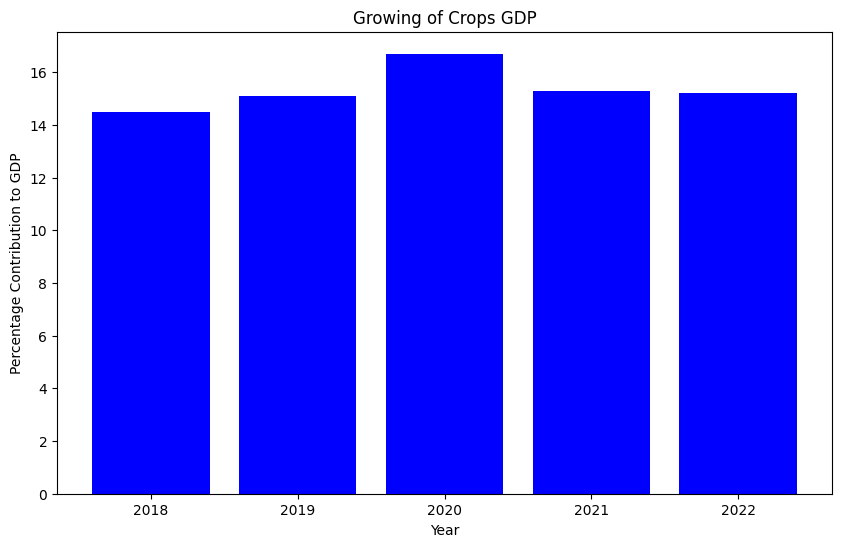

In [38]:
# Selecting the row for 'Growing of crops'
crop_row = growing_of_crops_df[growing_of_crops_df['Industry'] == 'Growing of Crops']

# Extracting the years and values
years = crop_row.columns[1:]
values = crop_row.values[0][1:]

# Convert years to strings
years = list(map(str, years))

# Plotting the values
plt.figure(figsize=(10, 6))
plt.bar(years, values, color='blue')
plt.title('Growing of Crops GDP')
plt.xlabel('Year')
plt.ylabel('Percentage Contribution to GDP')
plt.show()

Observation:

In 2020, the cultivation of crops made a more substantial contribution to the GDP of the Kenyan economy.

A trend line will showcase the significant changes over the years.

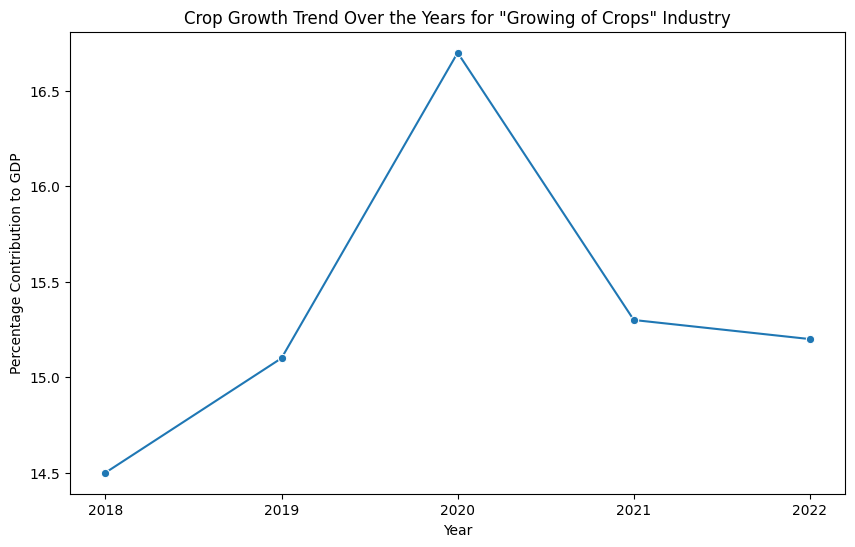

In [39]:
# Display a line plot to visualize the trend over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=years, y=values, marker='o')
plt.title('Crop Growth Trend Over the Years for "Growing of Crops" Industry')
plt.xlabel('Year')
plt.ylabel('Percentage Contribution to GDP')
plt.show()

Observation:

The trend line appears to be relatively stable with slight variations;

a. 2018 to 2019: There is a slight increase from 14.5 to 15.1, indicating a modest upward trend.

b. 2019 to 2020: There is a further increase to 16.7, suggesting a more significant growth in this period.

c. 2020 to 2021: The value decreases to 15.3, indicating a slight downturn or stabilization.

d. 2021 to 2022: There is a marginal decrease to 15.2, suggesting a relatively stable or slightly declining trend.

We need to analyze what the overall growth rate growing of crops GDP has experienced over the years.

In [40]:
# Extract beginning and ending values
beginning_value = 14.5  # 2018 value
ending_value = 15.2    # 2022 value
number_of_years = 2022 - 2018  # Number of years

# Calculate CAGR
cagr = ((ending_value / beginning_value) ** (1 / number_of_years)) - 1

# Print the calculated CAGR
print("Compound Annual Growth Rate (CAGR): {:.2%}".format(cagr))

Compound Annual Growth Rate (CAGR): 1.19%


Observation:

A Compound Annual Growth Rate of 1.19% suggests that, on average, the GDP's value for Growing of crops has increased by approximately 1.19% per year from 2018 to 2022.

## **Population**

### **Kenya Population Trend (2019-2022)**

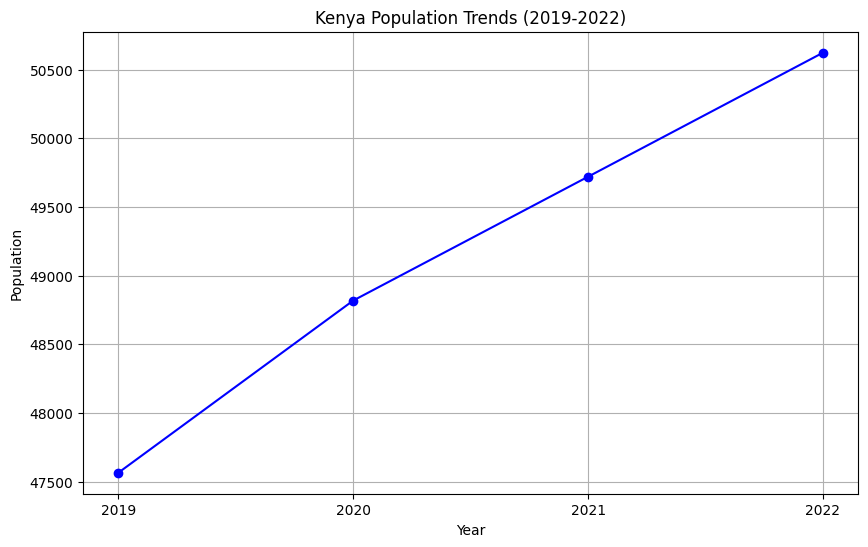

In [41]:
# Visualize the population trends with a line graph
plt.figure(figsize=(10, 6))

county = kenyan_population['County'].iloc[0]
population_values = kenyan_population.drop('County', axis=1).iloc[0]

population_values.index = population_values.index.astype(int)

plt.plot(population_values.index, population_values, marker='o', linestyle='-', color='blue')

plt.title(f'{county} Population Trends (2019-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)

# Set the X-axis ticks without decimals
plt.xticks(population_values.index)

plt.show()

Observation:

The line plot for Kenyan population over the years (2019 to 2022) reveals a consistent and steady increase in population. The trend shows a continuous upward trajectory, indicating a sustained growth in the overall population of Kenya during this period. What is the growth rate of the Kenyan Population?

In [42]:
# Calculate the growth rate for Kenyan population
kenyan_population_growth_rate = ((kenyan_population.iloc[0, -1] - kenyan_population.iloc[0, 1]) / kenyan_population.iloc[0, 1]) * 100

print(f"The growth rate of Kenyan population from 2019 to 2022 is: {kenyan_population_growth_rate:.2f}%")

The growth rate of Kenyan population from 2019 to 2022 is: 6.43%


### **Population Distribution Across Counties**

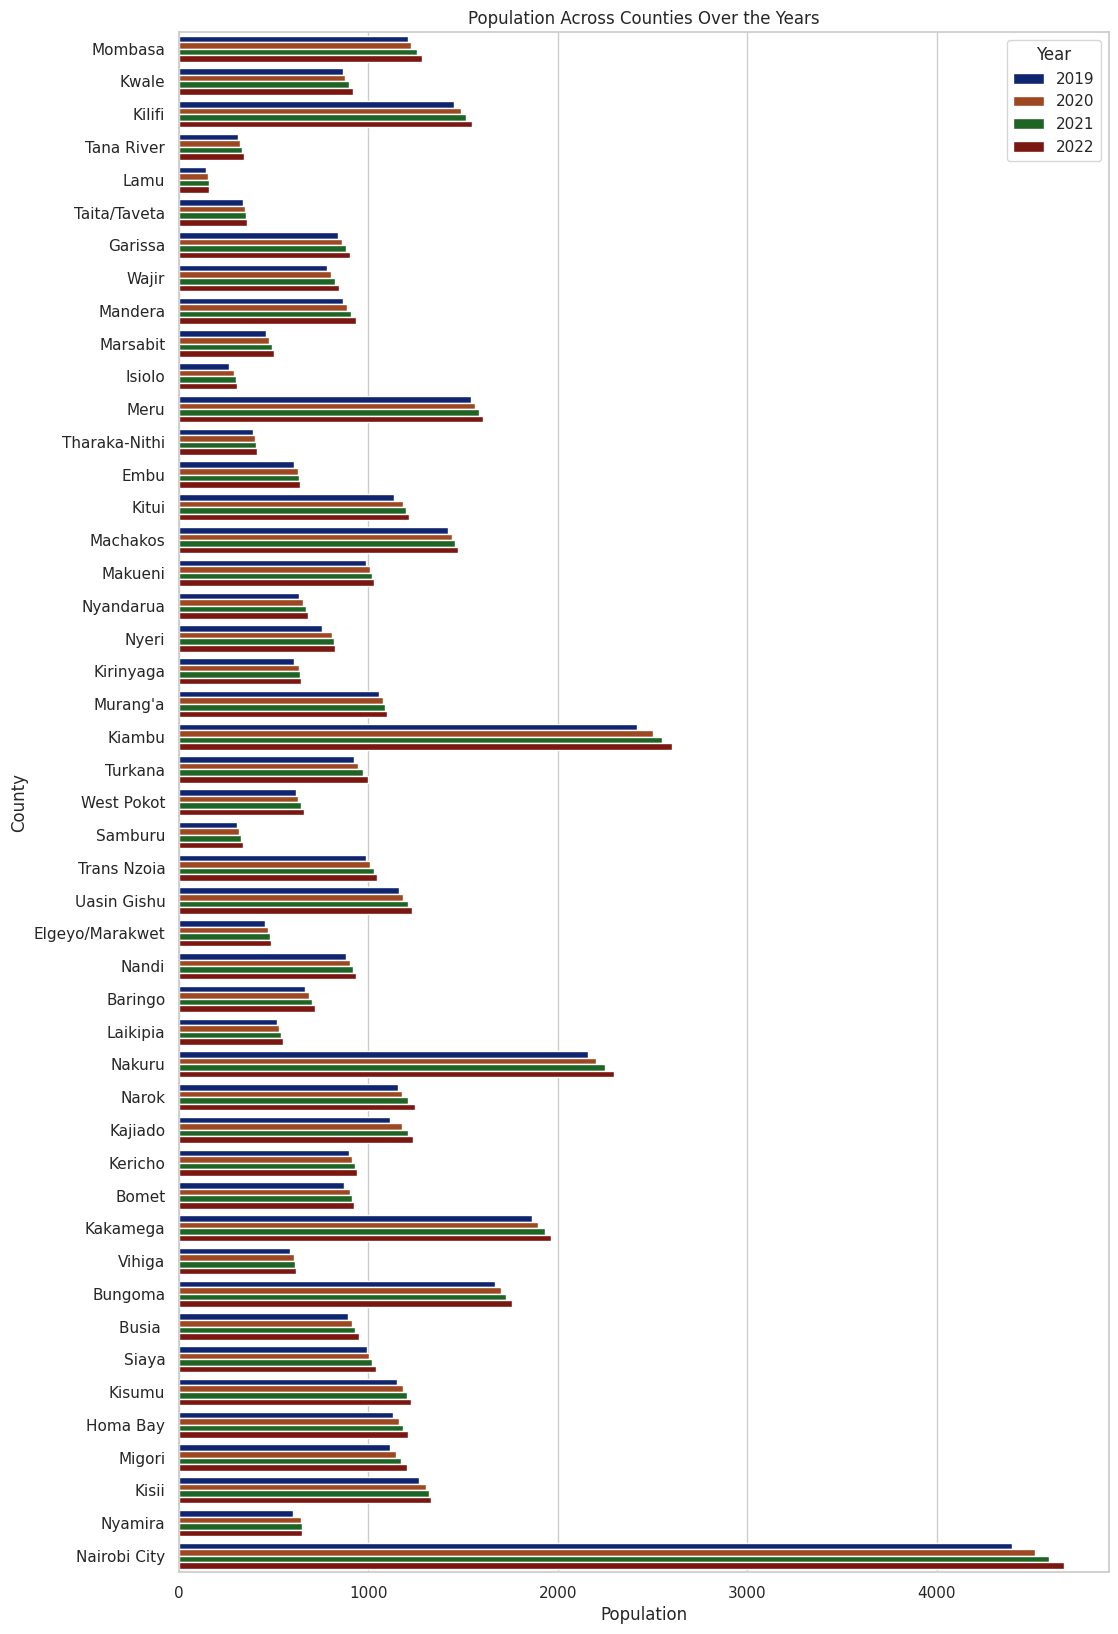

In [43]:
# Melt the DataFrame to reshape it for plotting
melted_county_populations = pd.melt(county_population, id_vars=['County'], var_name='Year', value_name='Population')

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(12, 20))
sns.barplot(data=melted_county_populations, x='Population', y='County', hue='Year', palette='dark')
plt.title('Population Across Counties Over the Years')
plt.xlabel('Population')
plt.ylabel('County')
plt.show()

Observation:

Each county in Kenya has exhibited exponential growth in population over the years. The bar charts illustrate a consistent upward trend in population figures for every county from 2019 to 2022. The growth rates vary among counties, indicating unique demographic patterns.

Understanding these growth rates can provide valuable insights to our time series predictive model.

### **Growth Rate Per County**

In [44]:
# Calculate the growth rate for each county
growth_rates = county_population.set_index('County').pct_change(axis=1) * 100
growth_rates

2019      2020      2021      2022
County                                             
Mombasa           NaN  1.655629  2.280130  2.229299
Kwale             NaN  1.501155  2.502844  2.441731
Kilifi            NaN  2.477632  1.947616  1.976285
Tana River        NaN  3.492063  2.760736  2.686567
Lamu              NaN  8.391608  2.580645  2.515723
Taita/Taveta      NaN  3.235294  1.139601  1.408451
Garissa           NaN  2.378121  2.555168  2.491506
Wajir             NaN  2.944942  2.736318  2.663438
Mandera           NaN  2.306805  2.705750  2.634468
Marsabit          NaN  4.575163  2.291667  2.443992
Isiolo            NaN  9.701493  2.380952  2.657807
Meru              NaN  1.294498  1.341853  1.261034
Tharaka-Nithi     NaN  2.544529  1.240695  0.980392
Embu              NaN  3.453947  0.953895  1.102362
Kitui             NaN  4.401408  1.264755  1.165695
Machakos          NaN  1.477833  1.040222  1.029513
Makueni           NaN  2.127660  1.091270  1.177625
Nyandarua         NaN  2.978056  1.978691  1.940299
Nyeri             NaN  6.719368  0.987654  1.100244
Kirinyaga         NaN  4.426230  0.784929  0.934579
Murang'a          NaN  1.988636  1.021356  1.102941
Kiambu            NaN  3.475383  2.039184  1.959248
Turkana           NaN  2.159827  2.748414  2.572016
West Pokot        NaN  1.610306  2.377179  2.321981
Samburu           NaN  3.225806  3.125000  2.727273
Trans Nzoia       NaN  2.020202  1.980198  1.844660
Uasin Gishu       NaN  1.719690  2.113271  2.069536
Elgeyo/Marakwet   NaN  4.405286  1.476793  1.455301
Nandi             NaN  2.372881  1.655629  1.628664
Baringo           NaN  3.153153  2.183406  2.279202
Laikipia          NaN  2.123552  1.890359  2.040816
Nakuru            NaN  1.850139  2.225250  2.132386
Narok             NaN  1.815039  2.971138  2.967848
Kajiado           NaN  5.550582  2.544529  2.398677
Kericho           NaN  1.775805  1.417666  1.290323
Bomet             NaN  3.085714  1.330377  1.422319
Kakamega          NaN  1.606856  1.845018  1.811594
Vihiga            NaN  3.389831  0.819672  0.813008
Bungoma           NaN  1.796407  1.705882  1.677270
Busia             NaN  2.351624  1.969365  1.931330
Siaya             NaN  1.007049  1.894317  1.859100
Kisumu            NaN  2.683983  1.770658  1.739851
Homa Bay          NaN  2.740937  1.979346  1.940928
Migori            NaN  2.777778  2.528335  2.465986
Kisii             NaN  3.238547  0.918133  0.985595
Nyamira           NaN  6.776860  0.619195  0.615385
Nairobi City      NaN  2.706391  1.727192  1.697867

Observation:

For the year 2019, there is no previous year population data, leading to the undefined growth rate. The growth rates for subsequent years are calculated based on the available population data for each county in the previous year.



In [45]:
# Melt the DataFrame for plotting
melted_growth_rates = pd.melt(growth_rates.reset_index(), id_vars=['County'], var_name='Year', value_name='Growth Rate')

# Sort the data by growth rate in ascending order
melted_growth_rates = melted_growth_rates.sort_values(by=['Growth Rate'], ascending=False)

# Create an interactive vertical bar chart using Plotly
fig = px.bar(melted_growth_rates, y='Growth Rate', x='County', color='Year',
             title='Population Growth Rate of Kenyan Counties (2019-2022)',
             labels={'Growth Rate': 'Population Growth Rate (%)'})

# Customize the layout
fig.update_layout(yaxis=dict(title='Population Growth Rate (%)'))
fig.update_layout(height=800, width=1200)

fig.show()

Observation:

The graph does not clearly depict counties with the lowest population growth rates. Sorting the values will provide a clearer indication of the growth rates.

### **Counties with the highest growth rate**

In [46]:
# Calculate growth rates for each county
county_population['Growth Rate'] = ((county_population[2022] - county_population[2019]) / county_population[2019]) * 100

# Sort counties based on growth rate
sorted_counties = county_population.sort_values(by='Growth Rate', ascending=False)

# Get the top 3 and bottom 3 counties
top_3_counties = sorted_counties.head(3)
bottom_3_counties = sorted_counties.tail(3)

# Print the results
print("Top 3 Counties with Highest Growth Rate:")
print(top_3_counties[['County', 'Growth Rate']])

print("\nBottom 3 Counties with Lowest Growth Rate:")
print(bottom_3_counties[['County', 'Growth Rate']])

Top 3 Counties with Highest Growth Rate:
     County  Growth Rate
11   Isiolo    15.298507
5      Lamu    13.986014
34  Kajiado    10.832587

Bottom 3 Counties with Lowest Growth Rate:
      County  Growth Rate
21  Murang'a     4.166667
12      Meru     3.948220
16  Machakos     3.589022


Observation:

Isiolo, Lamu, and Kajiado exhibit the highest growth rates, with Isiolo leading at 15.30%. Murang'a, Meru, and Machakos show the lowest growth rates.

### **Outlier Detection**

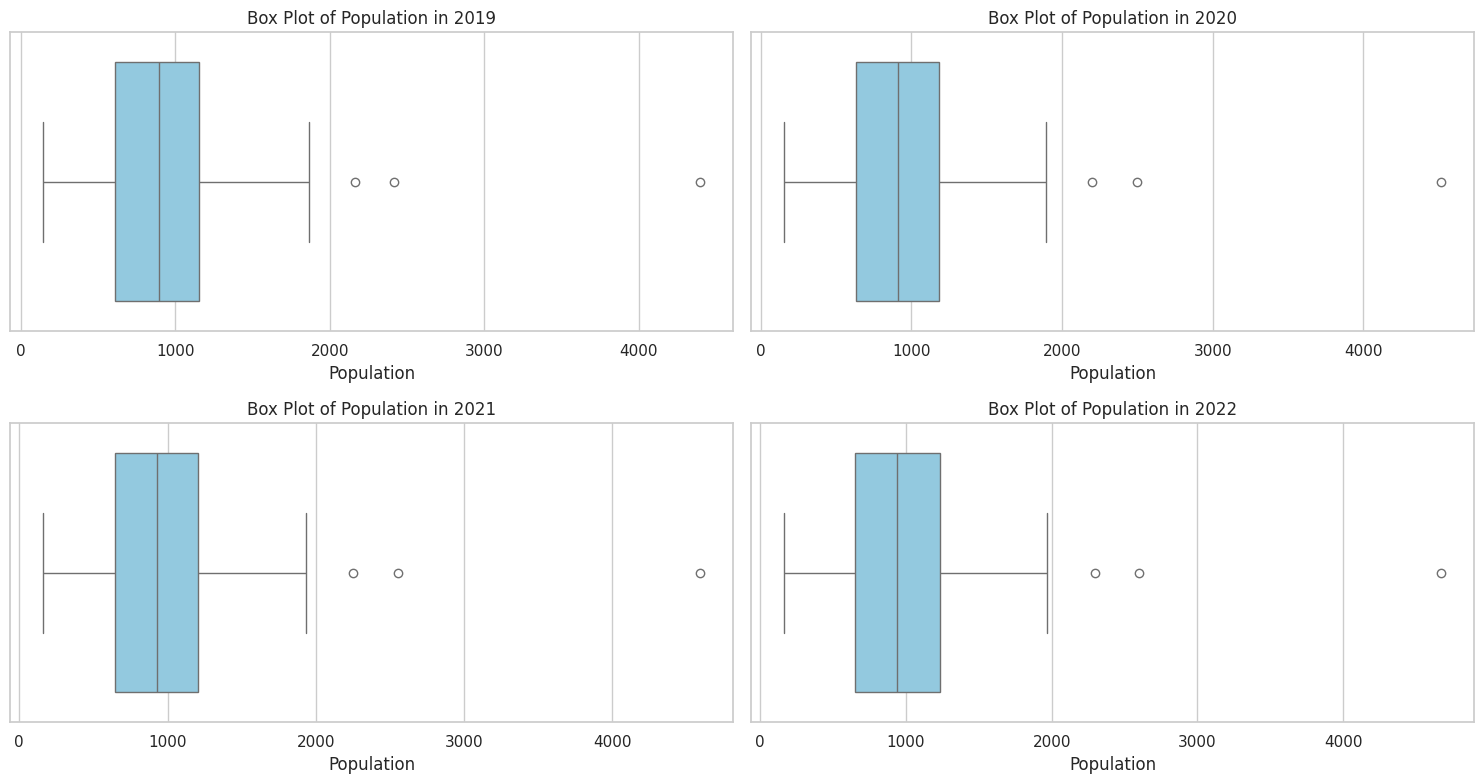

In [47]:
# Extract the relevant data (excluding Growth Rate column)
population_data = county_population.drop(['Growth Rate'], axis=1)

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Create box plots for each year
for i, year in enumerate([2019, 2020, 2021, 2022]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=population_data, x=year, color='skyblue')
    plt.title(f'Box Plot of Population in {year}')
    plt.xlabel('Population')
    plt.ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

Observation:

Outliers in county populations may result from natural factors such as significant events, migrations, or developments.

### **Map County Population To Regions**

KNBS maps regions using their synoptic stations;


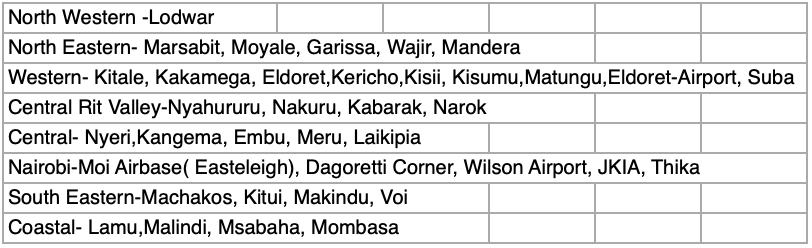

We will assign counties to their respective regions based on the locations of the synoptic stations as outlined in the provided diagram.


In [48]:
# Mapping of counties to regions
county_to_region = {
    'Turkana': 'North Western',
    'Marsabit': 'North Eastern',
    'Mandera': 'North Eastern',
    'Wajir': 'North Eastern',
    'Garissa': 'North Eastern',
    'Kakamega': 'Western',
    'Kisumu': 'Western',
    'Kericho': 'Western',
    'Nakuru': 'Central Rift Valley',
    'Nyandarua': 'Central Rift Valley',
    'Narok': 'Central Rift Valley',
    'Baringo': 'Central Rift Valley',
    'Laikipia': 'Central Rift Valley',
    'Nyeri': 'Central',
    'Embu': 'Central',
    'Nairobi': 'Nairobi',
    'Machakos': 'South Eastern',
    'Kitui': 'South Eastern',
    'Taita-Taveta': 'South Eastern',
    'Lamu': 'Coastal',
    'Malindi': 'Coastal',
    'Kilifi': 'Coastal',
    'Kwale': 'Coastal',
}

# Add 'Region' column based on the mapping
county_population['Region'] = county_population['County'].map(county_to_region)

# Drop rows with missing values in the 'Region' column
county_population = county_population.dropna(subset=['Region'])

# Create separate DataFrames for each region
regions = county_population['Region'].unique()
region_dataframes = {region: county_population[county_population['Region'] == region].copy() for region in regions}

# Display data for each region
for region, df in region_dataframes.items():
    print(f"\n{region} Region:")
    print(df)



Coastal Region:
   County  2019  2020  2021  2022  Growth Rate   Region
2   Kwale   866   879   901   923     6.581986  Coastal
3  Kilifi  1453  1489  1518  1548     6.538197  Coastal
5    Lamu   143   155   159   163    13.986014  Coastal

North Eastern Region:
      County  2019  2020  2021  2022  Growth Rate         Region
7    Garissa   841   861   883   905     7.609988  North Eastern
8      Wajir   781   804   826   848     8.578745  North Eastern
9    Mandera   867   887   911   935     7.843137  North Eastern
10  Marsabit   459   480   491   503     9.586057  North Eastern

Central Region:
   County  2019  2020  2021  2022  Growth Rate   Region
14   Embu   608   629   635   642     5.592105  Central
19  Nyeri   759   810   818   827     8.959157  Central

South Eastern Region:
      County  2019  2020  2021  2022  Growth Rate         Region
15     Kitui  1136  1186  1201  1215     6.954225  South Eastern
16  Machakos  1421  1442  1457  1472     3.589022  South Eastern

Central

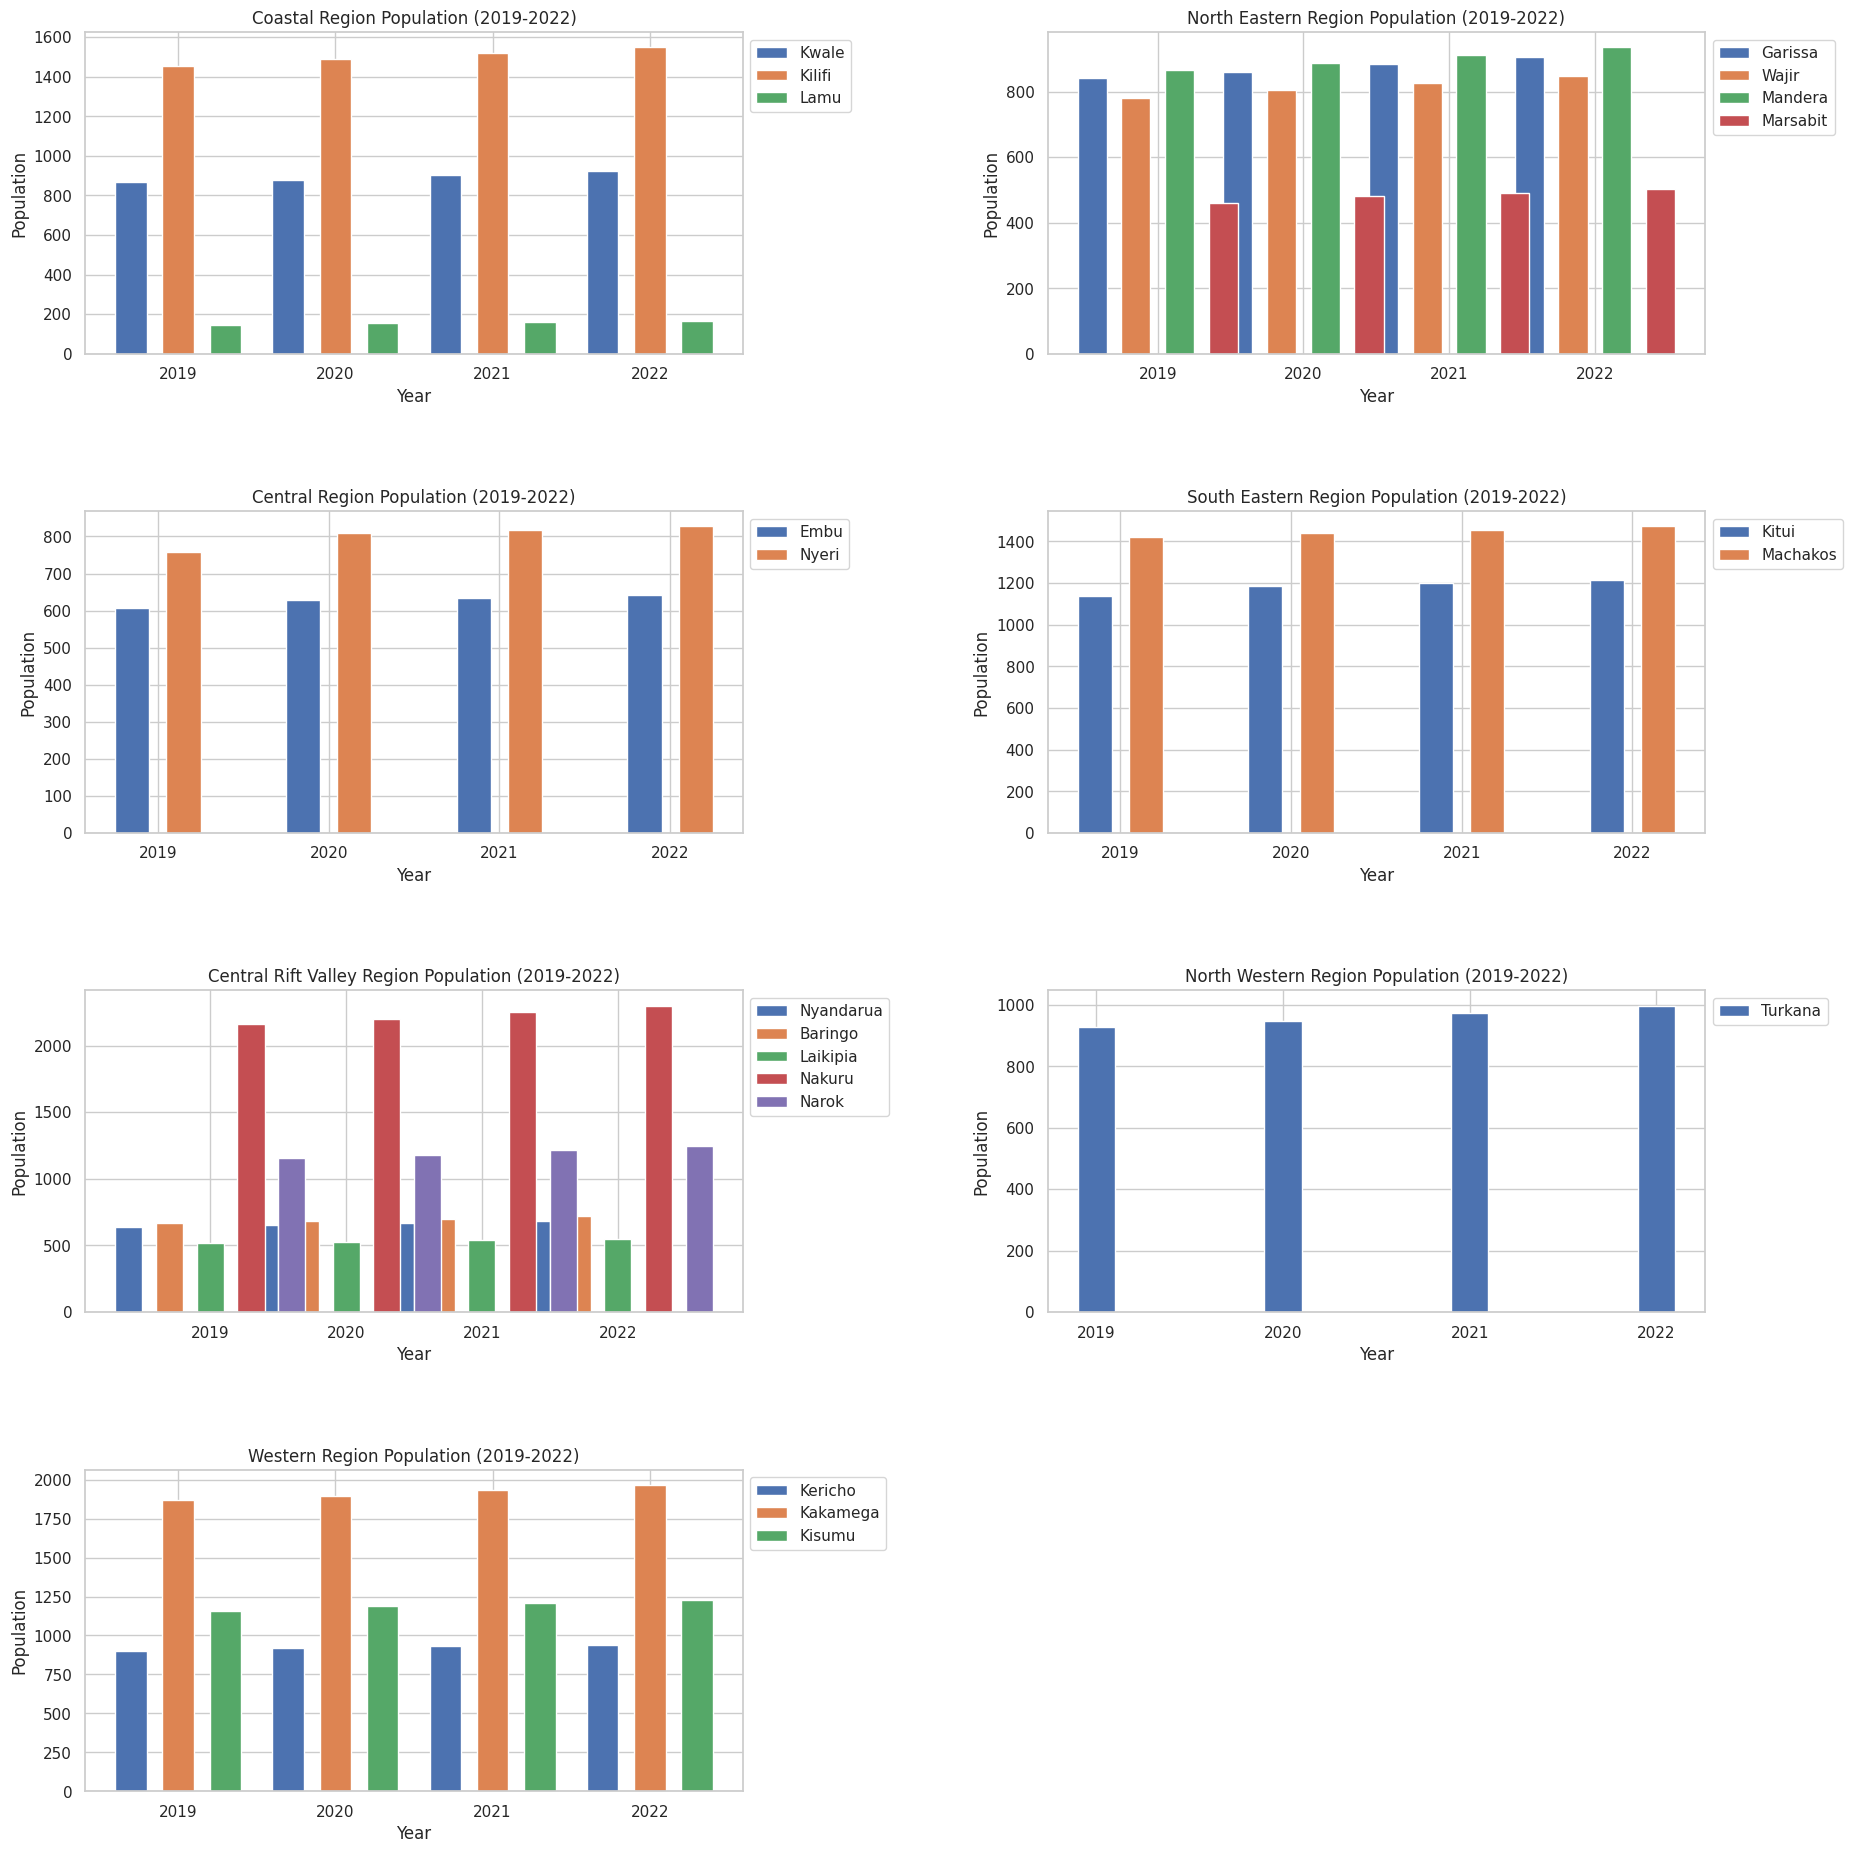

In [49]:
# Function to create vertical bar graph for our regional DataFrames
def create_vertical_bar_graph(ax, region_df, region_name):
    # Extract years from DataFrame columns
    years = region_df.columns[1:-1]
    county_labels = region_df['County'].values
    # Extract population data
    population_data = region_df.iloc[:, 1:-1].values

    bar_width = 0.2
    bar_gap = 0.1
    for i, (county, data) in enumerate(zip(county_labels, population_data)):
            ax.bar(np.arange(len(years)) + (bar_width + bar_gap) * i, data, width=bar_width, label=county)

            ax.set_xticks(np.arange(len(years)) + (bar_width + bar_gap) * (len(county_labels) - 1) / 2)
            ax.set_xticklabels(years)
            ax.set_ylabel('Population')
            ax.set_xlabel('Year')
            ax.set_title(f'{region_name} Region Population (2019-2022)')
            ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plot graph for each region
num_regions = len(region_dataframes)

# Determine the layout of the subplots
num_cols = 2
num_rows = (num_regions + num_cols - 1) // num_cols

# Create a grid of subplots with increased size
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Flatten the axs array to iterate over it
axs_flat = axs.flatten()
# Create vertical bar graphs for each region, up to the number of subplots
for i, (region, df) in enumerate(region_dataframes.items()):
    # Exclude the growth rate column from the DataFrame
    df_no_growth = df.drop(columns=['Growth Rate'])
    create_vertical_bar_graph(axs_flat[i], df_no_growth, region)

# Hide any remaining empty subplots
for i in range(num_regions, len(axs_flat)):
    axs_flat[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout(pad=5.0)
plt.show()

## **Material Inputs**

### **Univariate**

We shall look at the distribution of the value as well as how the value compares against the years.

In [50]:
# Function to clean and process the dataframe
def process_dataframe(df):
    # Ensure 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')
    df = df.dropna(subset=['Date'])  # Drop rows with missing or invalid dates
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')  # Convert 'Value' to numeric
    return df

# Function to reset index and convert 'Date' to a regular column
def reset_and_convert_date(df):
    df_reset = df.reset_index()
    df_reset['Date'] = pd.to_datetime(df_reset['Date'])
    return df_reset

# Function to perform EDA and plot visualizations
def perform_eda(df, title_prefix):

    # Plot a boxplot of the 'Value' column
    plt.figure(figsize=(8, 6))
    df.boxplot(column='Value')
    plt.title(f'{title_prefix} Boxplot of Prices')
    plt.ylabel('Prices')
    plt.show()

    # Plot average values for each year
    plt.figure(figsize=(10, 6))
    avg_values = df.groupby(df['Date'].dt.year)['Value'].mean()
    avg_values.plot(kind='bar', color='skyblue')
    plt.title(f'Average {title_prefix} Prices Per Year')
    plt.xlabel('Year')
    plt.ylabel('Average Prices')
    plt.xticks(rotation=45)
    plt.show()


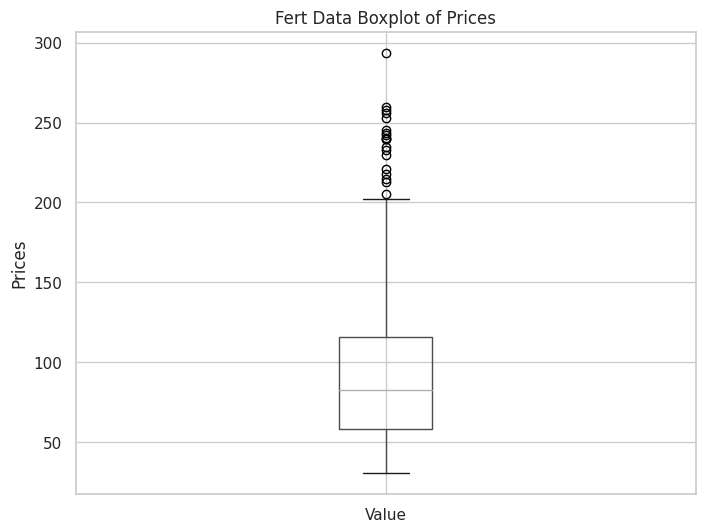

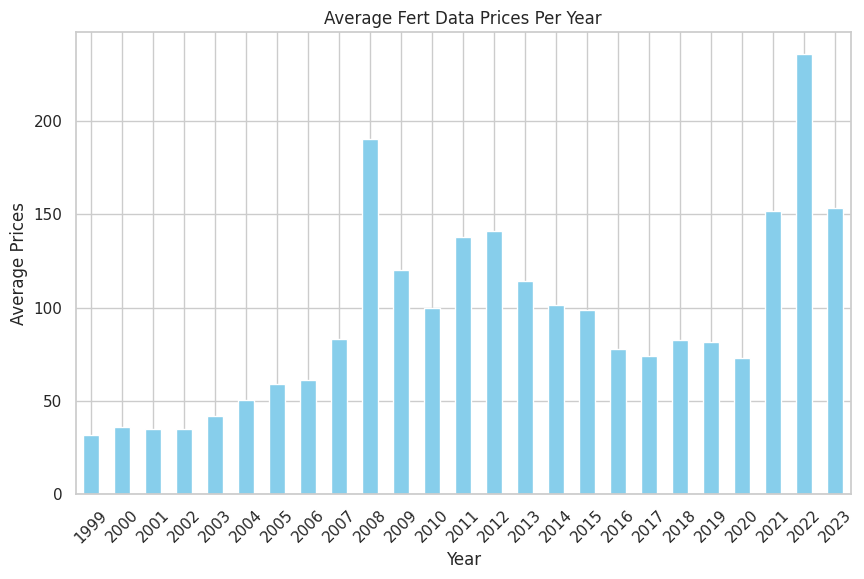

In [51]:
# Load and process the first dataset
df1 = df_fert.copy()
df1 = process_dataframe(df1)
df1_reset = reset_and_convert_date(df1)
perform_eda(df1_reset, 'Fert Data')

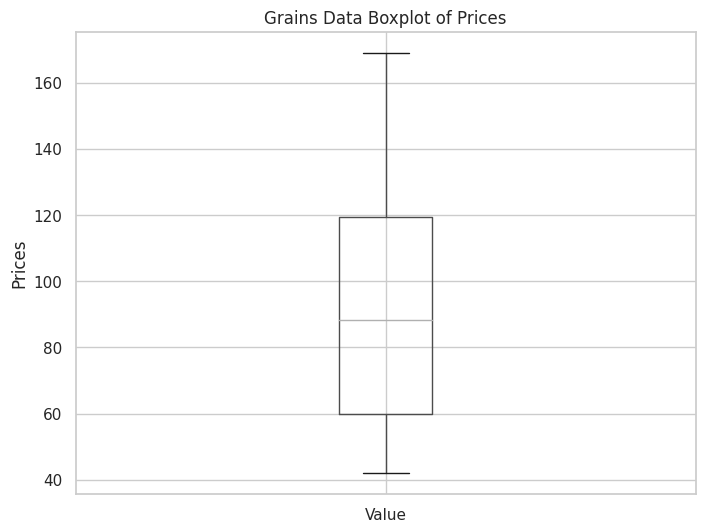

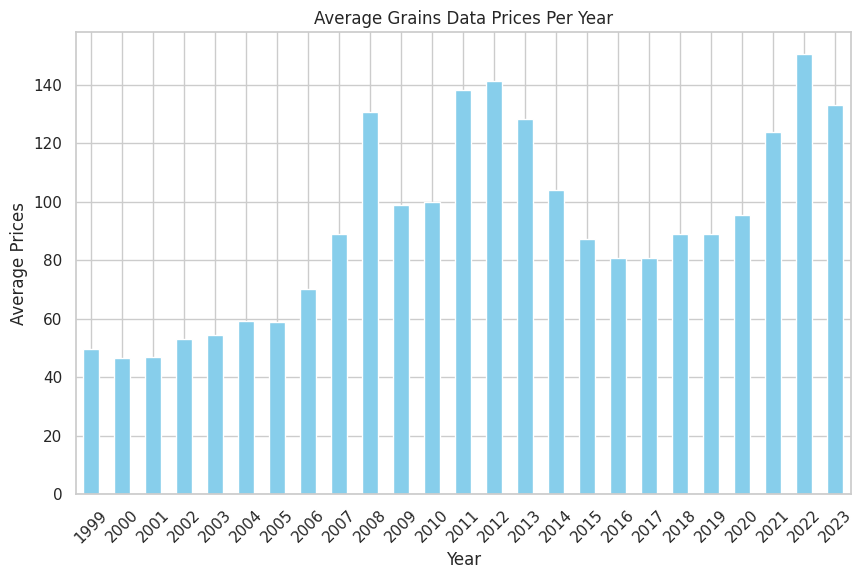

In [52]:
# Load and process the second dataset
df2 = df_grains.copy()
df2 = process_dataframe(df2)
df2_reset = reset_and_convert_date(df2)
perform_eda(df2_reset, 'Grains Data')

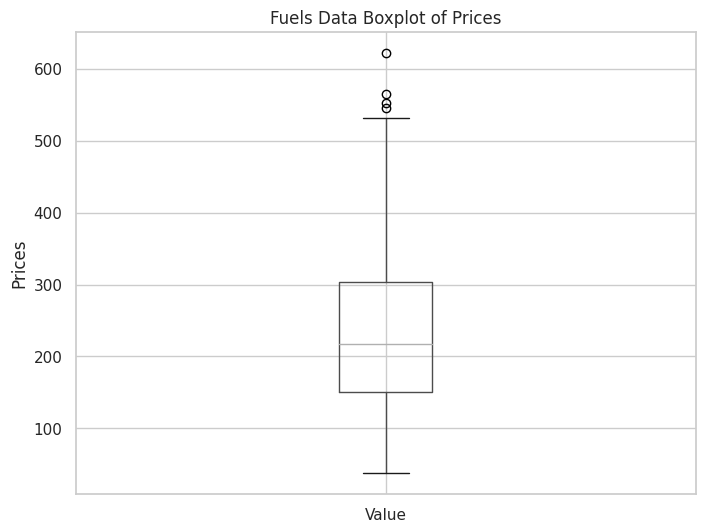

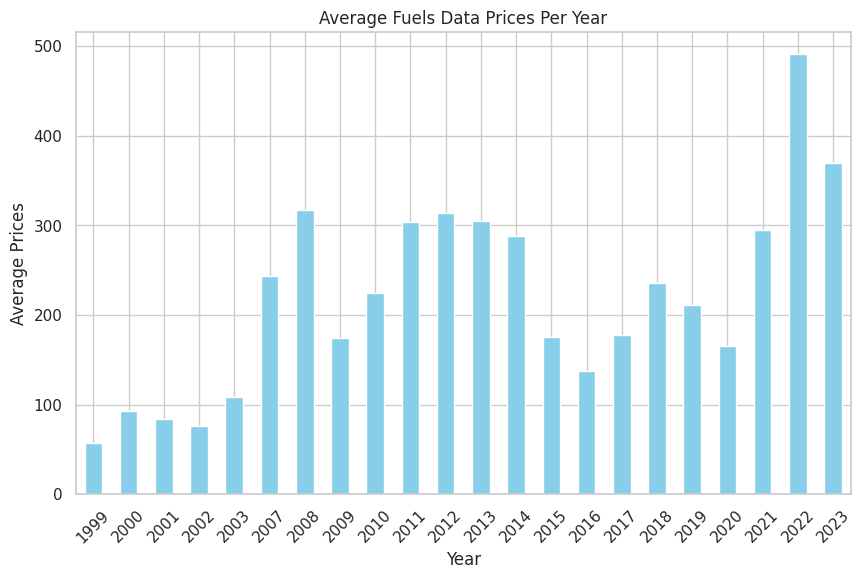

In [53]:
# Load and process the third dataset
df3 = df_fuels.copy()
df3 = process_dataframe(df3)
df3_reset = reset_and_convert_date(df3)
perform_eda(df3_reset, 'Fuels Data')

Observation:

**Fertiizer data:**

Gradual Ascension (1999-2008): The period witnesses a steady upward trajectory, suggesting sustained growth or inflationary pressures.

Abrupt Surge and Recession (2008-2013): Following a sharp spike in 2008, there's a subsequent downturn, likely stemming from economic crises or market upheavals.

Fluctuations and Recovery (2013-2023): Subsequent years depict a mix of volatility and gradual recovery, indicating ongoing market adjustments and economic uncertainties.

Outliers in fertilizer prices suggest the presence of premium-priced products within the sector, potentially driven by brand differentiation. This observation underscores the importance of fostering healthy competition among brands to ensure fair pricing and market accessibility.

**Grains data:**

Initial Fluctuations (1999-2005): The period begins with some variability in the average values, suggesting potential market adjustments or external influences.

Steady Increase (2006-2008): From 2006 to 2008, there's a notable uptick in the average values, possibly indicating economic growth or increased demand.

Sharp Rise and Recession (2008-2013): The peak in 2008 is followed by a significant decline, likely influenced by economic downturns or financial crises.

Recovery and Stability (2013-2023): Subsequent years show a pattern of recovery and relative stability, albeit with some fluctuations, possibly reflecting market adjustments and economic resilience.

There are no outliers in the dataset.

**Fuel data:**

Early Years (1999-2003): Prices were unpredictable initially, showing irregular changes.

Price Surge (2007-2013): There was a significant increase in prices during this period, peaking in 2008. This could be due to a surge in demand or limited supply.

Post-2013 Trends: Prices declined after 2013 but gradually began to rise again. This indicates a more stabilized market, although price fluctuations persisted.

The outliers in the fuel dataset has an outlier difference of 50 kshs. In the real world, fuel data can have outliers due to various factors like sudden changes in oil prices, geopolitical events affecting supply, natural disasters disrupting production or transportation, and market speculation impacting pricing.

### **Multivariate Analysis**

Here we compare the different value variables with each other and how they collectively relate to the date

In [54]:
df_analysis=pd.merge(df_fert,df_grains,on='Date')
df_analysis=pd.merge(df_analysis,df_fuels,on='Date')
df_analysis.rename(columns={'Value_x':'Fertilizer','Value_y':'Grains', 'Value':'Fuel'}, inplace = True)
df_analysis.head()

Date  Fertilizer  Grains    Fuel
0 2023-12-31      119.36  122.65  320.29
1 2023-11-30      157.16  120.05  369.78
2 2023-10-31      161.78  125.53  384.54
3 2023-09-30      157.52  127.78  420.69
4 2023-08-31      157.58  125.33  402.11

In [55]:
df_analysis['Date'] = pd.to_datetime(df_analysis['Date'])

# Set 'Date' as the index
df_analysis.set_index('Date', inplace=True)
df_yearly = df_analysis.resample('Y').sum()
df_yearly.reset_index(inplace=True)
df_yearly.head(10)

Date  Fertilizer   Grains    Fuel
0 1999-12-31      382.47   595.14   678.4
1 2000-12-31      433.41   559.73  1113.1
2 2001-12-31      418.35   562.72  1002.8
3 2002-12-31      419.08   635.27   915.2
4 2003-12-31       77.68   110.52   216.1
5 2004-12-31        0.00     0.00     0.0
6 2005-12-31        0.00     0.00     0.0
7 2006-12-31        0.00     0.00     0.0
8 2007-12-31      702.09   739.51  1948.1
9 2008-12-31     2281.03  1568.30  3804.5

Observation:

There are some values that indicate a price of 0.00. We need to investigate occurrences of the anomaly where values are recorded as 0.00 across the dataset.

In [56]:
# Find occurrences of 0.00
zero_occurrences = df_yearly[df_yearly.eq(0.00).any(axis=1)]

print(zero_occurrences)

        Date  Fertilizer  Grains  Fuel
5 2004-12-31         0.0     0.0   0.0
6 2005-12-31         0.0     0.0   0.0
7 2006-12-31         0.0     0.0   0.0


Observation:

We shall drop these rows based on their indices.

In [57]:
df_yearly.drop(index=5,inplace=True)
df_yearly.drop(index=6,inplace=True)
df_yearly.drop(index=7,inplace=True)
df_yearly.reset_index()
df_yearly= df_yearly.reset_index().drop(columns='index')
df_yearly.head()


Date  Fertilizer  Grains    Fuel
0 1999-12-31      382.47  595.14   678.4
1 2000-12-31      433.41  559.73  1113.1
2 2001-12-31      418.35  562.72  1002.8
3 2002-12-31      419.08  635.27   915.2
4 2003-12-31       77.68  110.52   216.1

In [58]:
df_yearly['Date'] = pd.to_datetime(df_yearly['Date'])

# Basic Statistics
print("Basic Statistics:")
print(df_yearly.describe())

Basic Statistics:
        Fertilizer       Grains         Fuel
count    22.000000    22.000000    22.000000
mean   1164.966364  1111.095909  2548.419545
std     671.669867   447.786058  1384.711643
min      77.680000   110.520000   216.100000
25%     746.157500   796.272500  1725.050000
50%    1085.470000  1105.830000  2331.200000
75%    1598.665000  1525.745000  3615.962500
max    2828.830000  1804.480000  5892.680000


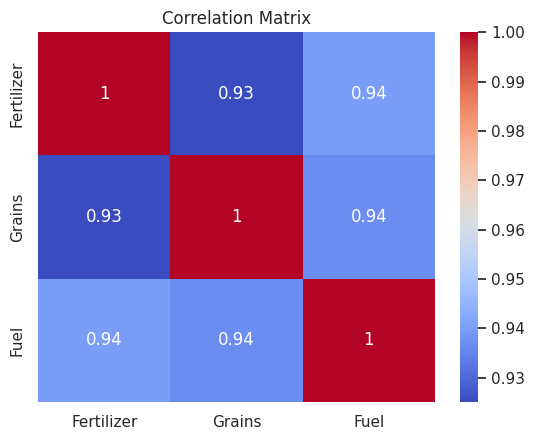

In [59]:
# Correlation Matrix
correlation_matrix = df_yearly.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

Observation:

The material inputs exhibit a strong positive correlation, suggesting that when the price of one input increases, the prices of all other inputs also tend to increase, and conversely, when one decreases, the others follow suit.

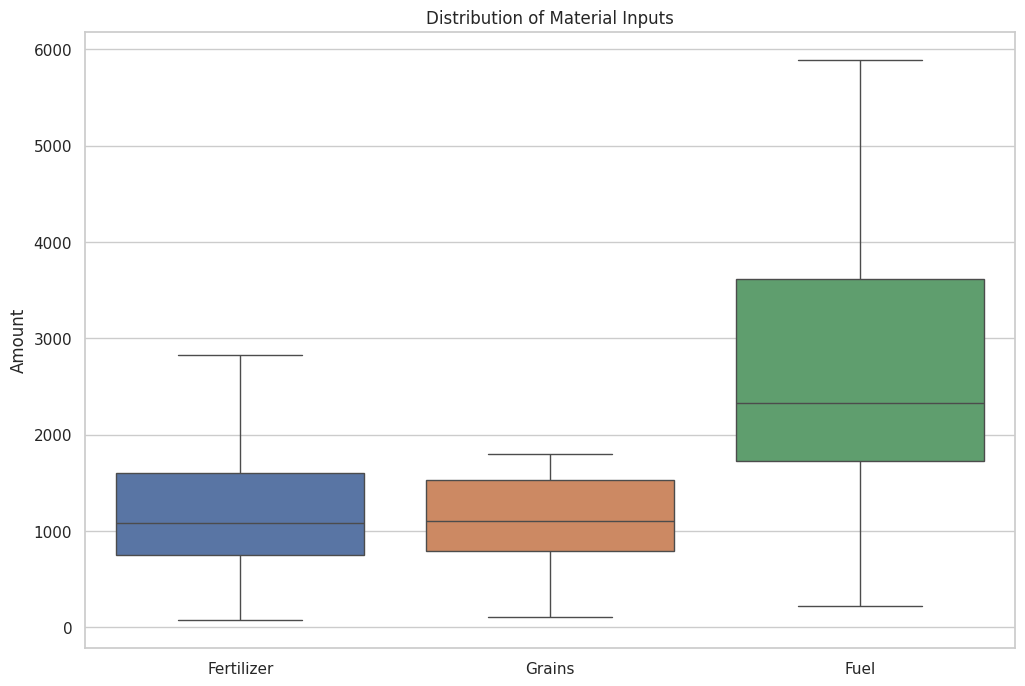

In [60]:
# Box Plots for Material Inputs
df_yearly_materials=df_yearly.drop(columns='Date')
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_yearly_materials, width=0.8)
plt.title('Distribution of Material Inputs')
plt.ylabel('Amount')
plt.show()

Observation:

Fuel prices appear to have the highest prices among the material inputs required for crop cultivation, followed by fertilizer, with grains being the least expensive in this category.

## **Retail and Wholesale Prices of crops**

### **Visualization of Maize prices over the Years 2012 -2023**

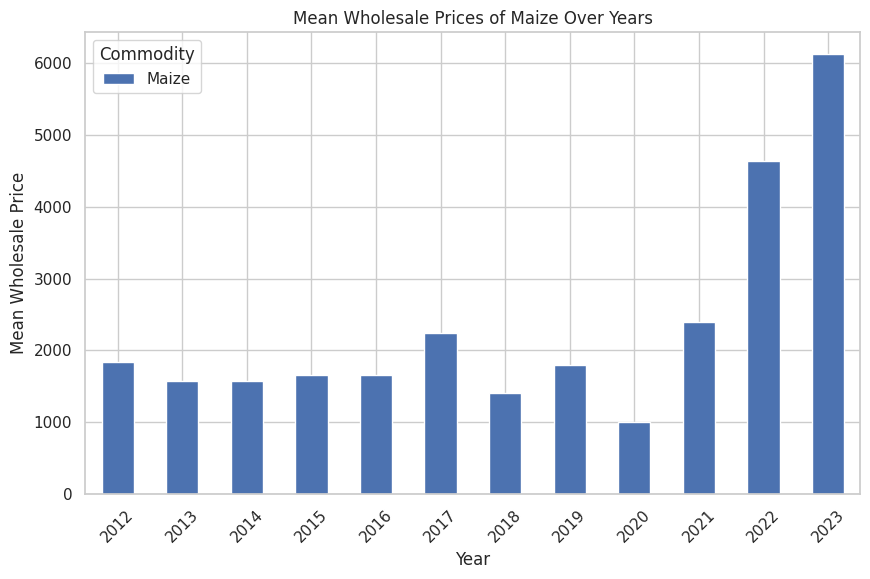

In [61]:
# Extract the year from the 'date' column
filtered_df['year'] = filtered_df.index.year

# Clean the 'price' column
filtered_df['price'] = pd.to_numeric(filtered_df['price'], errors='coerce')

# Select only Maize data and only wholesale prices
maize_data_wholesale = filtered_df[(filtered_df['commodity'] == 'Maize') & (filtered_df['pricetype'] == 'Wholesale')]

# Calculate mean prices for wholesale Maize and unstack the result
mean_prices_wholesale = maize_data_wholesale.groupby(['year', 'commodity'])['price'].mean().unstack()

# Bar plot for wholesale prices
mean_prices_wholesale.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Mean Wholesale Prices of Maize Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Wholesale Price')
plt.xticks(rotation=45)
plt.legend(title='Commodity')
plt.show()


Observation:

From the above we see a significant increase of wholesale prices of maize between 2021 - 2023 this can be assumed to be a shift in  economic factors, such as inflation rates, exchange rates, and general economic growth, which can impact commodity prices, including maize.

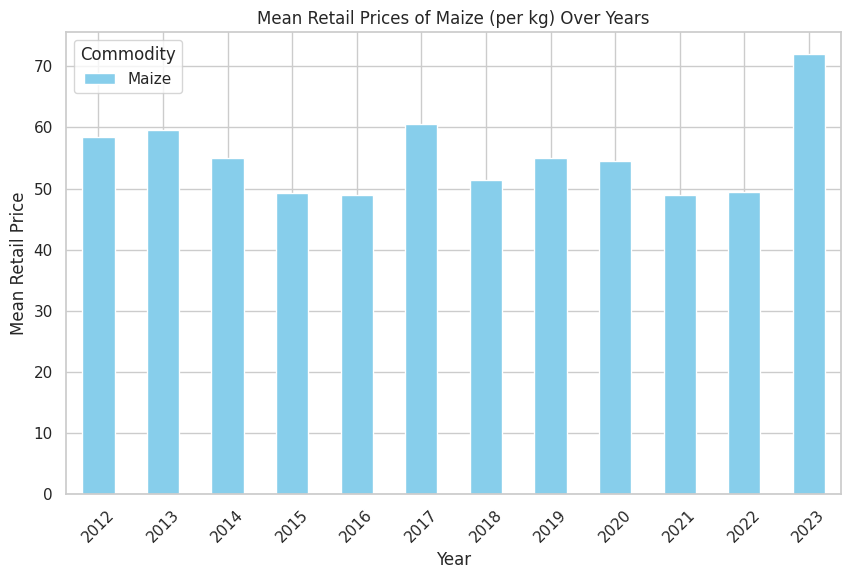

In [62]:
# Select only Maize data and only retail prices
maize_data_retail = filtered_df[(filtered_df['commodity'] == 'Maize') & (filtered_df['pricetype'] == 'Retail')]

# Calculate mean retail prices for Maize and unstack the result
mean_prices_retail = maize_data_retail.groupby(['year', 'commodity'])['price'].mean().unstack()

# Bar plot for mean retail prices of Maize
mean_prices_retail.plot(kind='bar', stacked=True, figsize=(10, 6), color='skyblue')
plt.title('Mean Retail Prices of Maize (per kg) Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Retail Price')
plt.xticks(rotation=45)
plt.legend(title='Commodity')
plt.show()

 Observation:

 The mean retail price of maize shows a steady increase and decrease over the years but seems to rapidly increase in 2023 which could indicate a decrease in crop yield hence higher prices

### **Visualization of Beans prices over the Years 2012 -2023**

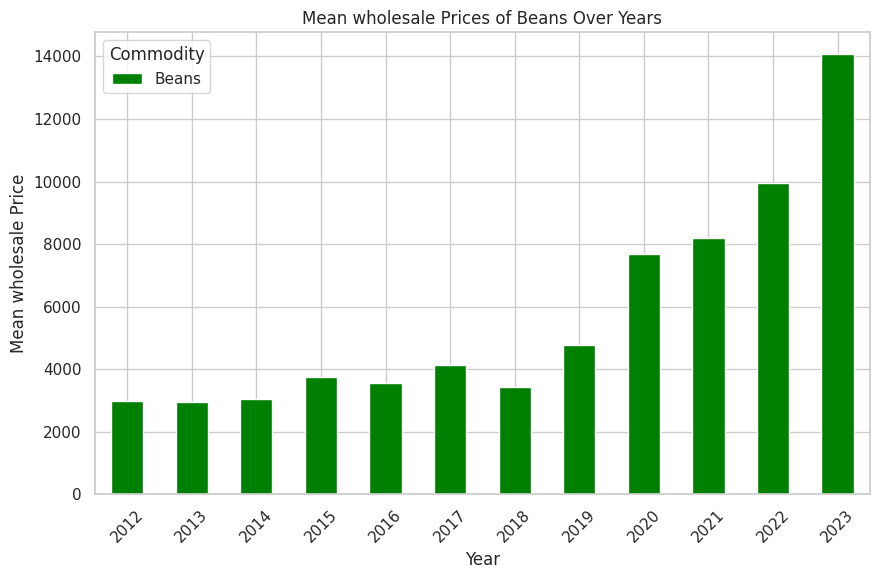

In [63]:
# Select only Beans data
beans_data_wholesale = filtered_df[(filtered_df['commodity'] == 'Beans') & (filtered_df['pricetype'] == 'Wholesale')]

# Calculate mean prices for Beans and unstack the result
mean_prices_wholesale_beans = beans_data_wholesale.groupby(['year', 'commodity'])['price'].mean().unstack()

# Bar plot for Beans
mean_prices_wholesale_beans.plot(kind='bar', stacked=True, figsize=(10, 6), color='green')
plt.title('Mean wholesale Prices of Beans Over Years')
plt.xlabel('Year')
plt.ylabel('Mean wholesale Price')
plt.xticks(rotation=45)
plt.legend(title='Commodity')
plt.show()

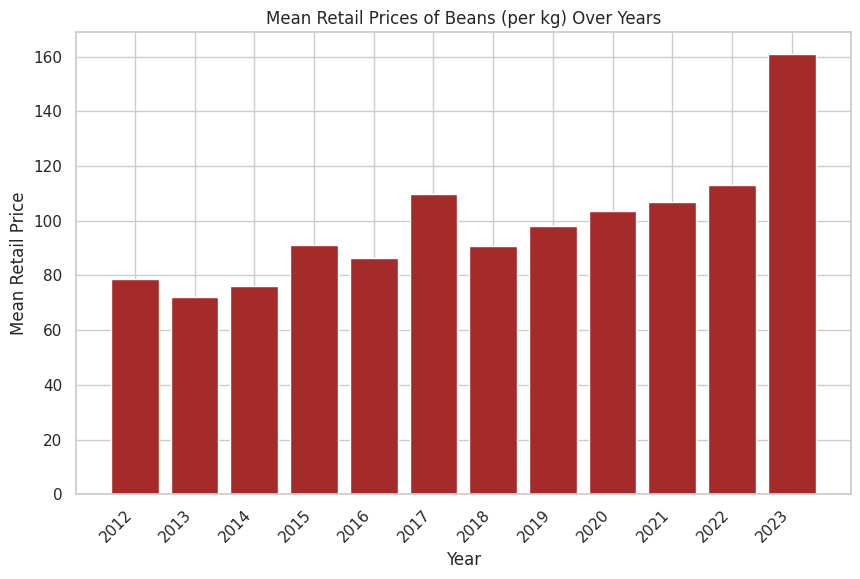

In [64]:
# Select only Beans data and only retail prices
beans_data_retail = filtered_df[(filtered_df['commodity'] == 'Beans') & (filtered_df['pricetype'] == 'Retail')]

# Calculate mean prices for retail Beans and unstack the result
beans_mean_prices_retail = beans_data_retail.groupby('year')['price'].mean()

# Bar plot for retail prices of Beans
plt.figure(figsize=(10, 6))
plt.bar(beans_mean_prices_retail.index, beans_mean_prices_retail.values, color='brown')
plt.title('Mean Retail Prices of Beans (per kg) Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Retail Price')
plt.xticks(beans_mean_prices_retail.index, rotation=45, ha='right')  # Specify tick locations and rotation
plt.show()

### **Visualization of Bananas prices over the Years 2018 - 2023**

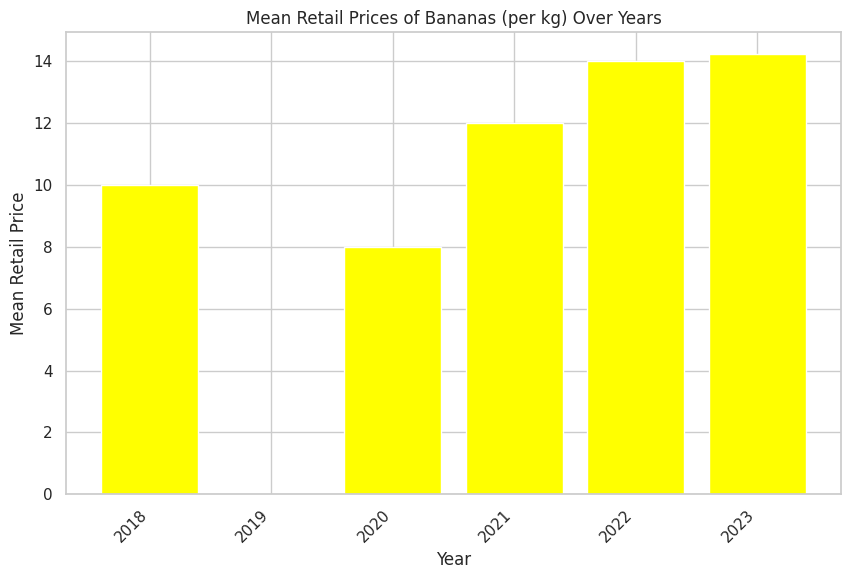

In [65]:
# Select only Bananas data and only retail prices
bananas_data_retail = filtered_df[(filtered_df['commodity'] == 'Bananas') & (filtered_df['pricetype'] == 'Retail')]

# Extract year from the date index
bananas_data_retail['year'] = bananas_data_retail.index.year

# Calculate mean prices for retail Bananas
bananas_mean_prices_retail = bananas_data_retail.groupby('year')['price'].mean()

# Bar plot for retail prices of Bananas
plt.figure(figsize=(10, 6))
plt.bar(bananas_mean_prices_retail.index, bananas_mean_prices_retail.values, color='yellow')
plt.title('Mean Retail Prices of Bananas (per kg) Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Retail Price')
plt.xticks(rotation=45, ha='right')
plt.show()

Observation:

There are no retail prices of bananas in 2019.

### **Visualization of Potatoes prices over the Years 2012 -2023**

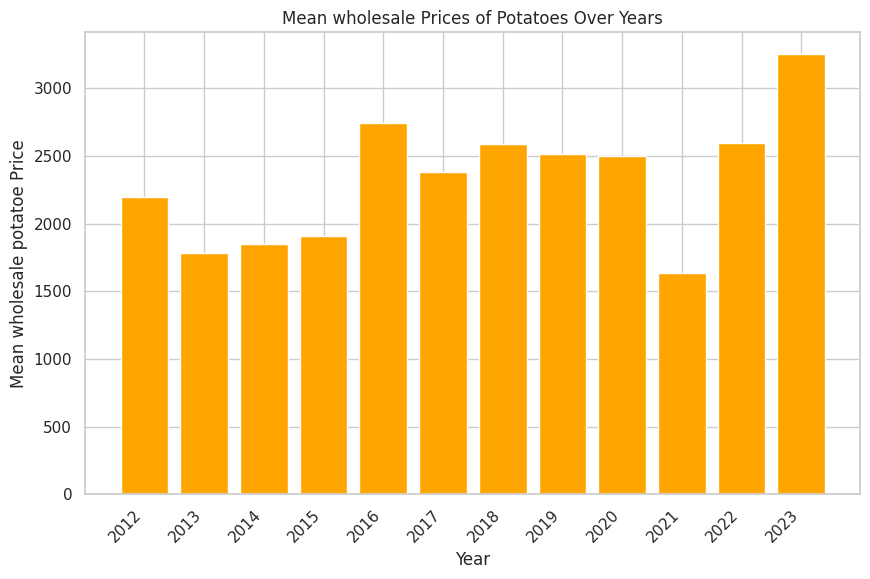

In [66]:
# Select only Potatoes data and only Wholesale prices
potatoes_data_wholesale = filtered_df[(filtered_df['commodity'] == 'Potatoes') & (filtered_df['pricetype'] == 'Wholesale')]

# Calculate mean prices for retail Potatoes
potatoes_mean_prices_wholesale = potatoes_data_wholesale.groupby('year')['price'].mean()

# Bar plot for retail prices of Potatoes
plt.figure(figsize=(10, 6))
plt.bar(potatoes_mean_prices_wholesale.index, potatoes_mean_prices_wholesale.values, color='orange')
plt.title('Mean wholesale Prices of Potatoes Over Years')
plt.xlabel('Year')
plt.ylabel('Mean wholesale potatoe Price')
plt.xticks(potatoes_mean_prices_wholesale.index, rotation=45, ha='right')  # Specify tick locations and rotation
plt.show()

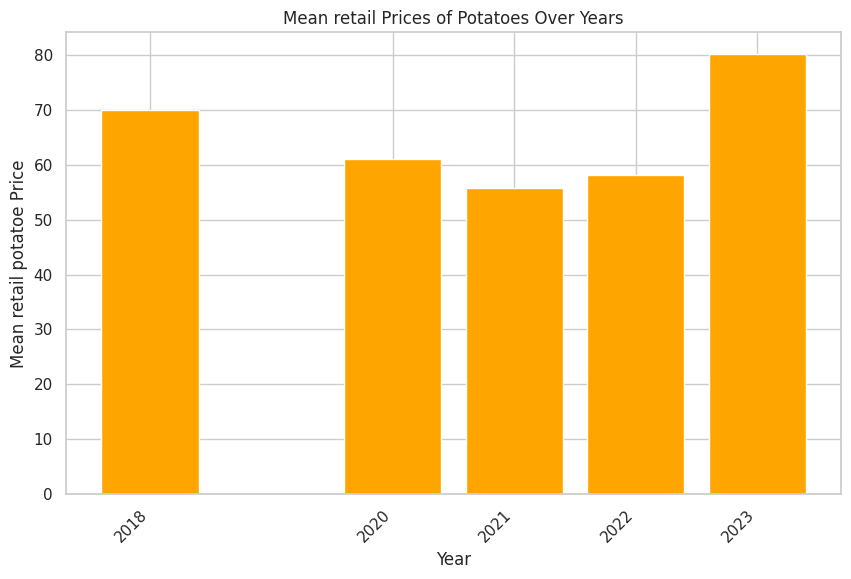

In [67]:
# Select only Potatoes data and only retail prices
potatoes_data_wholesale = filtered_df[(filtered_df['commodity'] == 'Potatoes') & (filtered_df['pricetype'] == 'Retail')]

# Calculate mean prices for retail Potatoes
potatoes_mean_prices_wholesale = potatoes_data_wholesale.groupby('year')['price'].mean()

# Bar plot for retail prices of Potatoes
plt.figure(figsize=(10, 6))
plt.bar(potatoes_mean_prices_wholesale.index, potatoes_mean_prices_wholesale.values, color='orange')
plt.title('Mean retail Prices of Potatoes Over Years')
plt.xlabel('Year')
plt.ylabel('Mean retail potatoe Price')
plt.xticks(potatoes_mean_prices_wholesale.index, rotation=45, ha='right')  # Specify tick locations and rotation
plt.show()

### **Crops Statistics**

In [68]:
stats_crops = filtered_df.groupby(['commodity', 'admin1'])['price'].describe()
stats_crops

count         mean          std      min        25%  \
commodity admin1                                                                
Bananas   Coast            40.0     9.993750     0.372942     8.41    10.0000   
          Eastern          12.0     7.916667     2.274696     5.00     5.7500   
          Nairobi          75.0     5.722133     1.469682     5.00     5.0000   
          North Eastern    73.0    10.436849     2.304245     5.00     9.8800   
          Rift Valley     127.0    18.744173     2.767870     5.00    19.5400   
Beans     Central          38.0  9062.289474  2869.611028  6003.00  7002.0000   
          Coast           311.0  2977.444309  3803.150601    41.95    86.2200   
          Eastern         282.0  4681.356950  4224.177096    60.00    81.0000   
          Nairobi         426.0  5771.276338  4759.274797    41.73   105.6050   
          North Eastern   190.0  6260.090632  5544.248745    88.75   126.7500   
          Nyanza          245.0  5610.755796  4582.066200    49.60    76.0400   
          Rift Valley    1046.0  4798.402256  4961.297267    44.96   100.9325   
Maize     Central          19.0  4273.105263  1588.160244  2601.00  2997.0000   
          Coast           333.0  1057.258168  1540.248232    20.23    40.0000   
          Eastern         263.0   661.385856  1505.557443    26.90    37.0000   
          Nairobi         348.0  1610.795086  1917.519256    22.17    35.9100   
          North Eastern   278.0   926.380827  2000.498331    45.00    60.0000   
          Nyanza          170.0  2729.349529  1935.651960    25.67    44.4575   
          Rift Valley     835.0  1138.465832  1741.306766    15.10    41.0000   
Potatoes  Central          26.0  1840.880769   513.343697   868.00  1422.0825   
          Coast            69.0   804.905652   975.922645    43.33    56.0000   
          Eastern         191.0  2193.278586  1075.433783    30.00  1591.6650   
          Nairobi         256.0  1602.770469  1137.195066    35.00    62.1250   
          North Eastern   125.0  1181.005680  1507.653777    42.97    56.5800   
          Nyanza          121.0  2423.501240   889.851026   800.00  1818.1800   
          Rift Valley     495.0  1547.429879  1335.841607    35.00    60.0000   

                              50%        75%       max  
commodity admin1                                        
Bananas   Coast            10.000     10.000     11.67  
          Eastern           8.500     10.000     10.00  
          Nairobi           5.000      5.605     10.00  
          North Eastern    10.000     10.000     18.75  
          Rift Valley      20.000     20.000     20.00  
Beans     Central        8001.000  10998.000  15498.00  
          Coast           107.300   5997.690  15300.00  
          Eastern        6750.000   7650.000  17100.00  
          Nairobi        6450.000   9000.000  17100.00  
          North Eastern  7424.000   9900.000  18900.00  
          Nyanza         6831.000   9600.000  14000.00  
          Rift Valley    5400.000   8499.000  19800.00  
Maize     Central        3352.500   6099.750   7002.00  
          Coast            52.500   2619.000   5895.00  
          Eastern          45.800     52.050   6750.00  
          Nairobi          50.000   3011.770   7571.00  
          North Eastern    66.000     80.000   7650.00  
          Nyanza         3200.000   3600.000   7833.00  
          Rift Valley      62.500   2501.000   8138.00  
Potatoes  Central        1813.165   2150.500   3090.83  
          Coast            70.000   1450.000   3193.33  
          Eastern        2125.000   2763.885   5700.00  
          Nairobi        1846.500   2454.000   5019.00  
          North Eastern    97.290   2250.000   6120.00  
          Nyanza         2170.550   2944.440   5000.00  
          Rift Valley    1514.000   2473.500   6126.67

Observation:

Bananas

Coast Region: Bananas have a consistent mean retail price around 9.99 with low variability.
Eastern Region: The mean retail price is lower (7.92) compared to the Coast region, but there's higher variability.
Nairobi Region: The mean retail price is around 5.72, and there's moderate variability.
North Eastern Region: Bananas have a higher mean retail price of 10.44 with moderate variability.
Rift Valley Region: The mean retail price is 18.74 with relatively low variability.

Beans

Central Region: Beans have a high mean wholesale price (9062.29) with considerable variability.
Coast Region: The mean wholesale price is 2977.44, and there's a wide range of prices.
Eastern Region: Beans have a mean wholesale price of 4681.36 with significant variability.
Nairobi Region: The mean wholesale price is 5771.28, and there's considerable variability.
North Eastern Region: Beans have a mean wholesale price of 6260.09 with moderate variability.
Nyanza Region: The mean wholesale price is 5610.76 with moderate variability.
Rift Valley Region: The mean wholesale price is 4798.40 with high variability.

Maize

Central Region: Maize has a mean wholesale price of 4273.11 with moderate variability.
Coast Region: The mean wholesale price is 1057.26, and there's a wide range of prices.
Eastern Region: Maize has a mean wholesale price of 661.39 with high variability.
Nairobi Region: The mean wholesale price is 1610.80, and there's considerable variability.
North Eastern Region: Maize has a mean wholesale price of 926.38 with considerable variability.
Nyanza Region: The mean wholesale price is 2729.35 with moderate variability.
Rift Valley Region: The mean wholesale price is 1138.47 with high variability.

Potatoes

Central Region: Potatoes have a mean wholesale price of 1840.88 with moderate variability.
Coast Region: The mean wholesale price is 804.91, and there's a wide range of prices.
Eastern Region: Potatoes have a mean wholesale price of 2193.28 with high variability.
Nairobi Region: The mean wholesale price is 1602.77, and there's considerable variability.
North Eastern Region: Potatoes have a mean wholesale price of 1181.01 with moderate variability.
Nyanza Region: The mean wholesale price is 2423.50 with moderate variability.
Rift Valley Region: The mean wholesale price is 1547.43 with high variability.

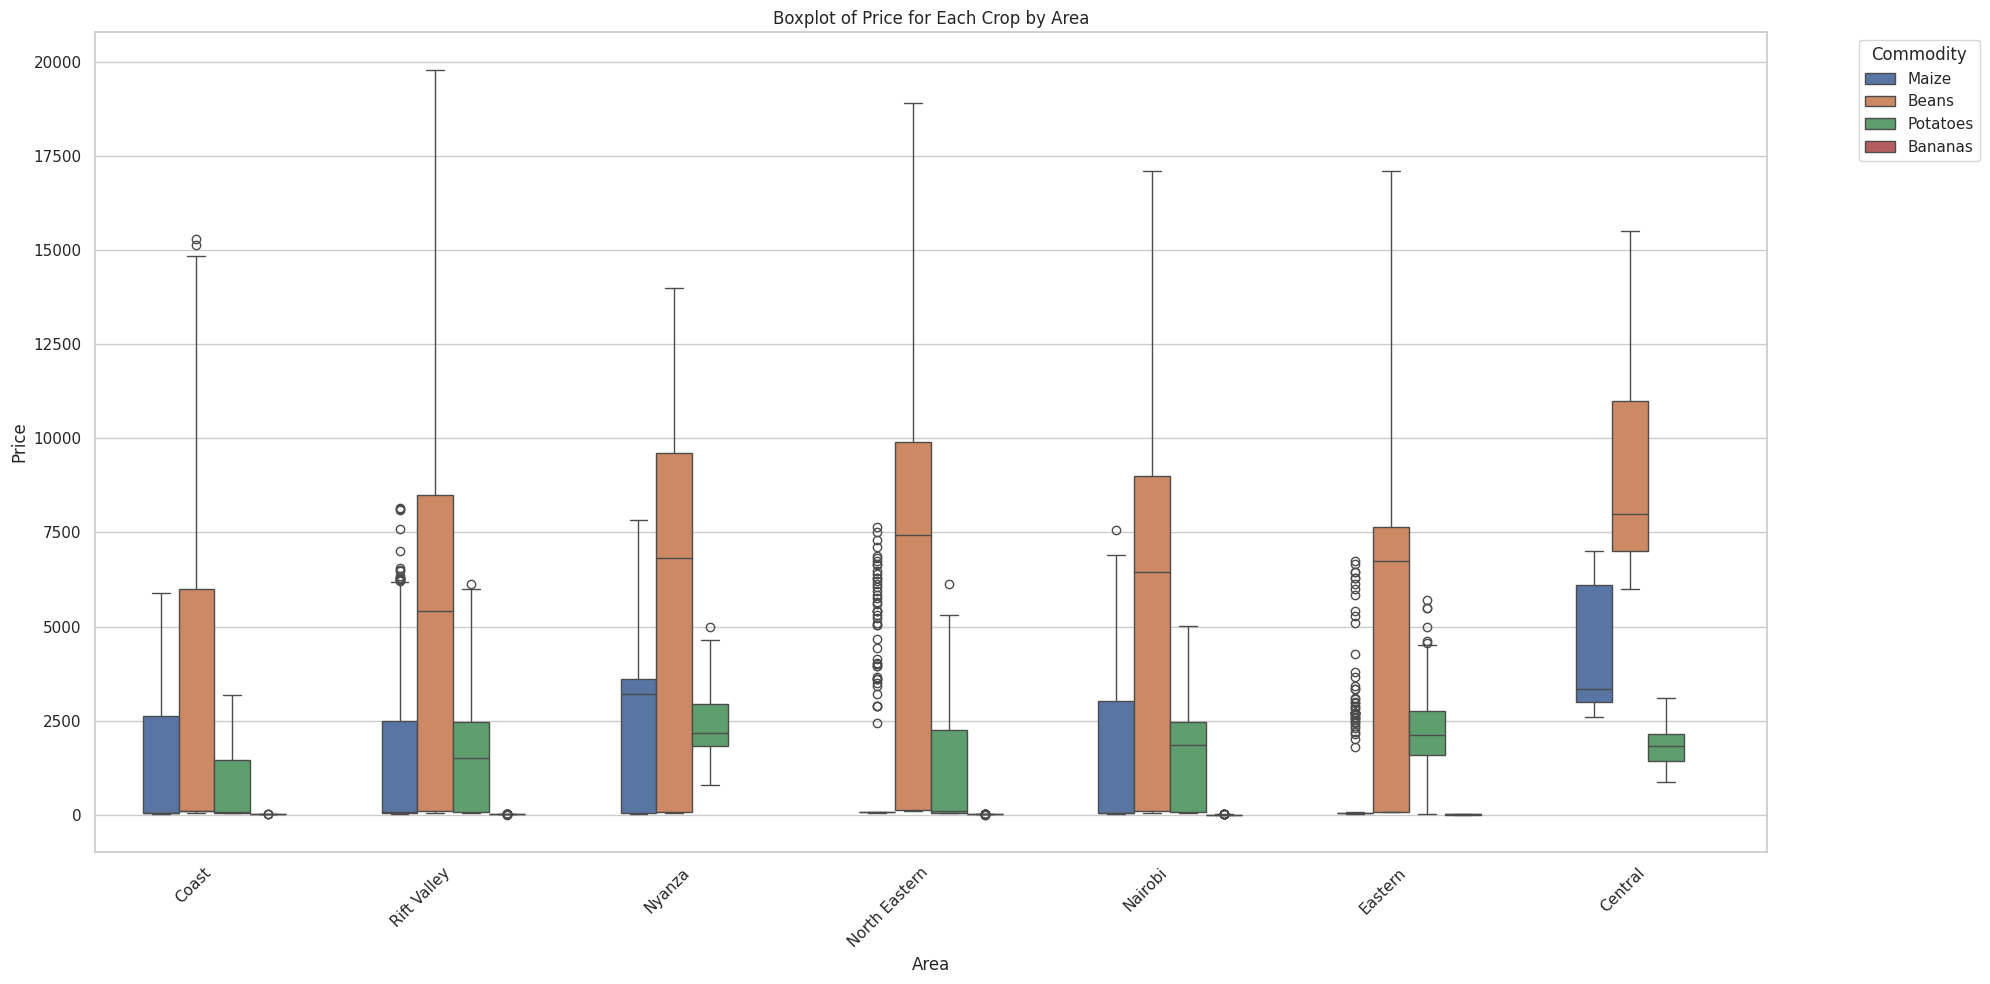

In [69]:
# Set a larger figure size and adjust spacing
plt.figure(figsize=(20, 10))

# Set color palette with yellow for 'Bananas'
palette = {'Bananas': 'yellow', 'Maize': 'blue', 'Beans': 'green', 'Potatoes': 'red'}


# Create a boxplot
sns.boxplot(x='admin1', y='price', hue='commodity', data=filtered_df, width=0.6)
plt.title('Boxplot of Price for Each Crop by Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Observation:

From the above we can see that the most popular crop is beans followed by potatoes then maize and finally bananas.

## **Climatic Conditions**

### **Temperature**

In [70]:
# Identify the indices where 'Minimum Temperatures' and 'Maximum Temperatures' occur
min_temp_start = temp_df[temp_df['Region'] == 'Minimum Temperatures'].index[0] + 1
min_temp_end = min_temp_start + 9

max_temp_start = temp_df[temp_df['Region'] == 'Maximum Temperatures'].index[0] + 1
max_temp_end = max_temp_start + 9

# Separate the DataFrame into two based on temperature categories
min_temp_df = temp_df.iloc[min_temp_start:min_temp_end].reset_index(drop=True)
max_temp_df = temp_df.iloc[max_temp_start:max_temp_end].reset_index(drop=True)

# Display the DataFrames
print("Minimum Temperature DataFrame:")
print(min_temp_df)

print("\nMaximum Temperature DataFrame:")
print(max_temp_df)

Minimum Temperature DataFrame:
          Region  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022
0      N-Western  24.3  24.2  24.7  24.9  23.8  24.7  24.3  24.7  24.1  24.8
1      N-Eastern  21.1  21.1  20.9  21.4  22.5  20.6  21.6  21.7  21.2  21.8
2        Western  13.8  13.8  14.2  14.2  13.1  13.3  14.6  14.6  14.3  14.9
3  C-Rift Valley  10.3  10.4  10.7  10.5  10.2  10.7  11.2  11.7  10.9  11.9
4        Central  13.4  13.6  13.4  13.6  12.8  13.0  13.4  13.5  12.5  13.1
5        Nairobi  14.1  14.4  14.4  14.3  14.6  14.3  14.8  14.9  14.4  15.4
6      S-Eastern  17.1  17.2  17.5  17.4  17.5  17.2  17.7  17.3  18.9  18.1
7        Coastal  23.5  23.7  23.9  24.0  24.0  23.5  24.3  24.2  24.1  24.5
8        Country  17.2  17.3  17.5  17.5  17.3  17.2  17.7  17.8  17.5  18.1

Maximum Temperature DataFrame:
          Region  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022
0      N-Western  35.5  35.9  36.2  36.0  35.9  35.0  36.0  35.4  36.1  35.9
1      N-East

In [71]:
# Display basic statistics for Minimum Temperature DataFrame
print("Summary Statistics for Minimum Temperature DataFrame:")
print(min_temp_df.describe())

# Display basic statistics for Maximum Temperature DataFrame
print("\nSummary Statistics for Maximum Temperature DataFrame:")
print(max_temp_df.describe())

Summary Statistics for Minimum Temperature DataFrame:
            2013       2014       2015       2016       2017       2018  \
count   9.000000   9.000000   9.000000   9.000000   9.000000   9.000000   
mean   17.200000  17.300000  17.466667  17.533333  17.311111  17.166667   
std     4.854637   4.808586   4.846390   4.969406   5.121144   4.886205   
min    10.300000  10.400000  10.700000  10.500000  10.200000  10.700000   
25%    13.800000  13.800000  14.200000  14.200000  13.100000  13.300000   
50%    17.100000  17.200000  17.500000  17.400000  17.300000  17.200000   
75%    21.100000  21.100000  20.900000  21.400000  22.500000  20.600000   
max    24.300000  24.200000  24.700000  24.900000  24.000000  24.700000   

            2019       2020       2021       2022  
count   9.000000   9.000000   9.000000   9.000000  
mean   17.733333  17.822222  17.544444  18.066667  
std     4.757625   4.721964   4.888280   4.750000  
min    11.200000  11.700000  10.900000  11.900000  
25%    14.

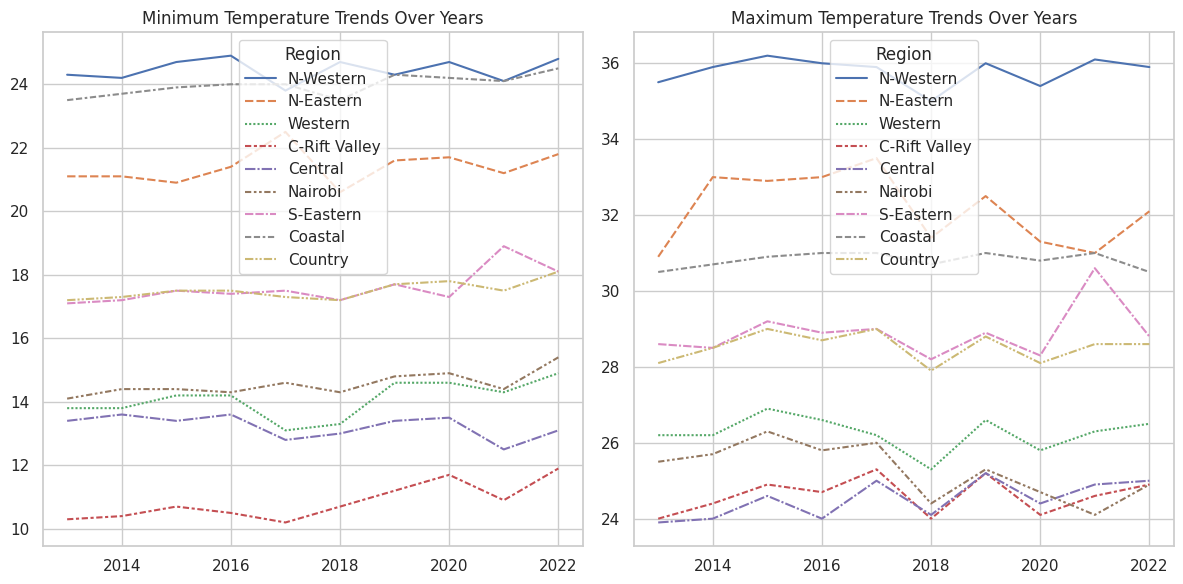

In [72]:
# Visualize the trend of temperatures over the years for each region
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=min_temp_df.set_index('Region').T)
plt.title('Minimum Temperature Trends Over Years')

plt.subplot(1, 2, 2)
sns.lineplot(data=max_temp_df.set_index('Region').T)
plt.title('Maximum Temperature Trends Over Years')

plt.tight_layout()
plt.show()

Observation:

**Minimum Temperatures**

Lowest Minimum Temperatures:

Region with the lowest minimum temperature in most years is C-Rift Valley.

Highest Minimum Temperatures:

Region with the highest minimum temperature in most years are N. Western and Coastal regions.


**Maximum Temperatures**

Lowest Maximum Temperatures:

Regions with the lowest maximum temperature in most years are Nairobi, C. Riftvalley and Central.

Highest Maximum Temperatures:

Regions with the highest maximum temperature in most years are N.Western and  N.Eastern.



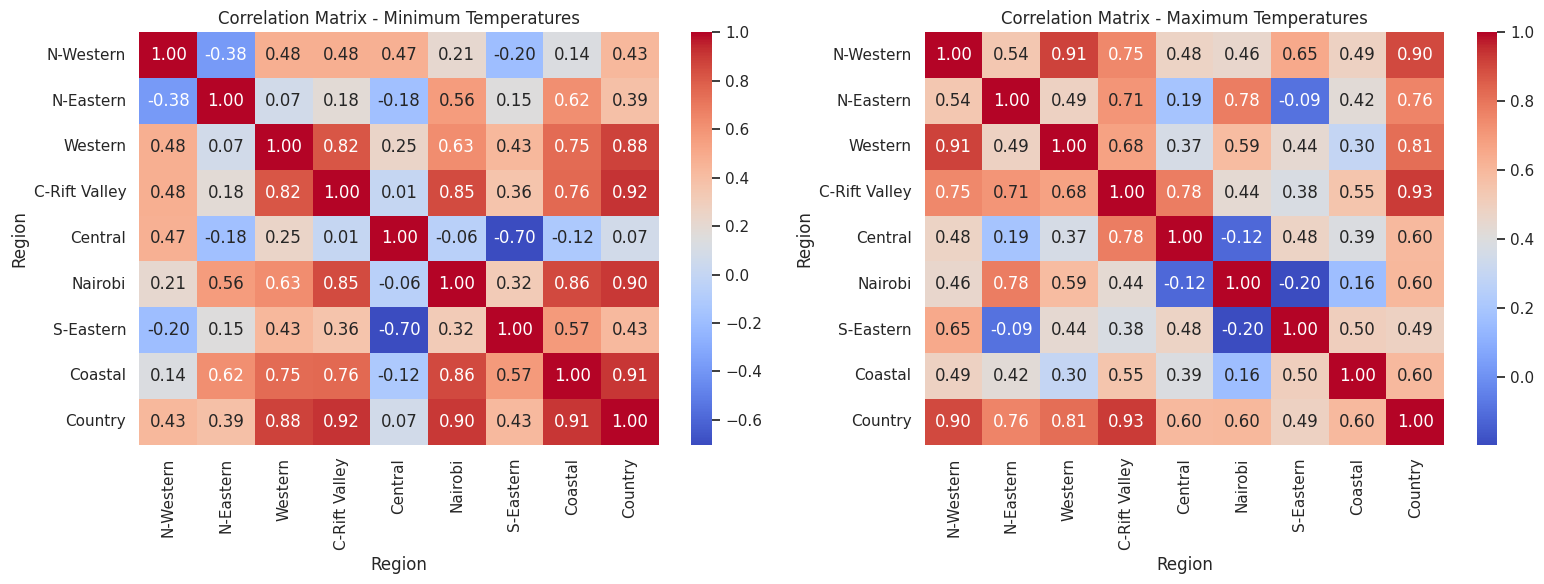

In [73]:
transposed_min_temp_df = min_temp_df.set_index('Region').T
transposed_max_temp_df = max_temp_df.set_index('Region').T

# Calculate the correlation matrix for Minimum Temperatures
min_temp_corr_matrix = transposed_min_temp_df.corr()

# Calculate the correlation matrix for Maximum Temperatures
max_temp_corr_matrix = transposed_max_temp_df.corr()

# Plot the correlation matrices
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.heatmap(min_temp_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Minimum Temperatures')

plt.subplot(1, 2, 2)
sns.heatmap(max_temp_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Maximum Temperatures')

plt.tight_layout()
plt.show()

Observation:

**Minimum Temperature Correlation Matrix**

Strong Positive Correlations: Western-C-Rift Valley, C-Rift Valley-Nairobi, Coastal-Country, and Western-Country.

Negative Correlations: Central and S-Eastern.

Some regions show weak correlations with others, indicating less consistent patterns in minimum temperature trends.

Isolated Regions: N-Western and S-Eastern appear less correlated with other regions.

**Maximum Temperature Correlation Matrix**

Strong Positive Correlations: Western-N-Western, Western-Country, C-Rift Valley-N-Western, and C-Rift Valley-Country.

Negative Correlations: S-Eastern-Nairobi

Some regions exhibit weaker correlations with others, indicating varying patterns in maximum temperature trends.

Isolated Regions:S-Eastern and Nairobi show weaker correlations with other regions, suggesting potential unique factors influencing their maximum temperature trends.

**Overall**

Nairobi's maximum and minimum temperatures are positively correlated with various regions.


### **Rainfall**

**Distribution of rainfall across the regions over the years**

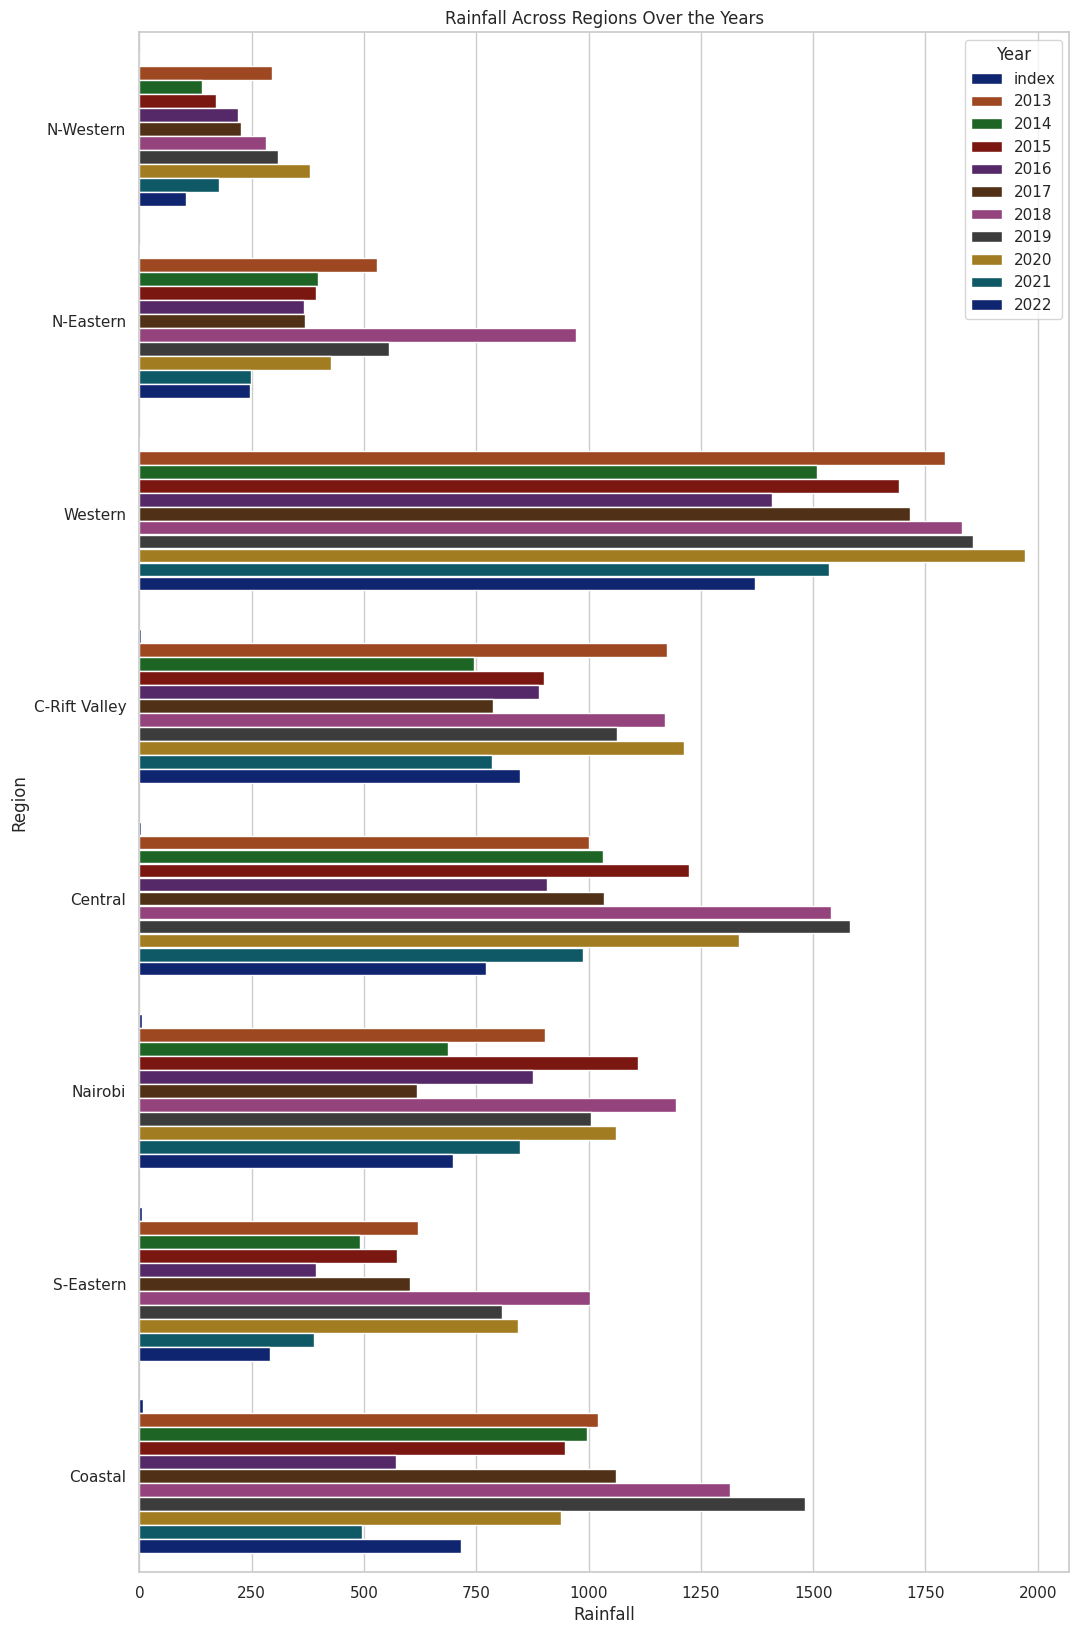

In [74]:
# Melt the DataFrame to reshape it for plotting
melted_rainfall_data = pd.melt(rain_df.reset_index(), id_vars=['Region'], var_name='Year', value_name='Rainfall')

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(12, 20))
sns.barplot(data=melted_rainfall_data, x='Rainfall', y='Region', hue='Year', palette='dark')
plt.title('Rainfall Across Regions Over the Years')
plt.xlabel('Rainfall')
plt.ylabel('Region')
plt.show()

Observation:

The Western region consistently experiences the highest rainfall levels throughout the observed period, while the North Western region consistently records the lowest rainfall levels over the same period. To visualize the distribution of rainfall more clearly, we will utilize a line graph.

<function matplotlib.pyplot.show(close=None, block=None)>

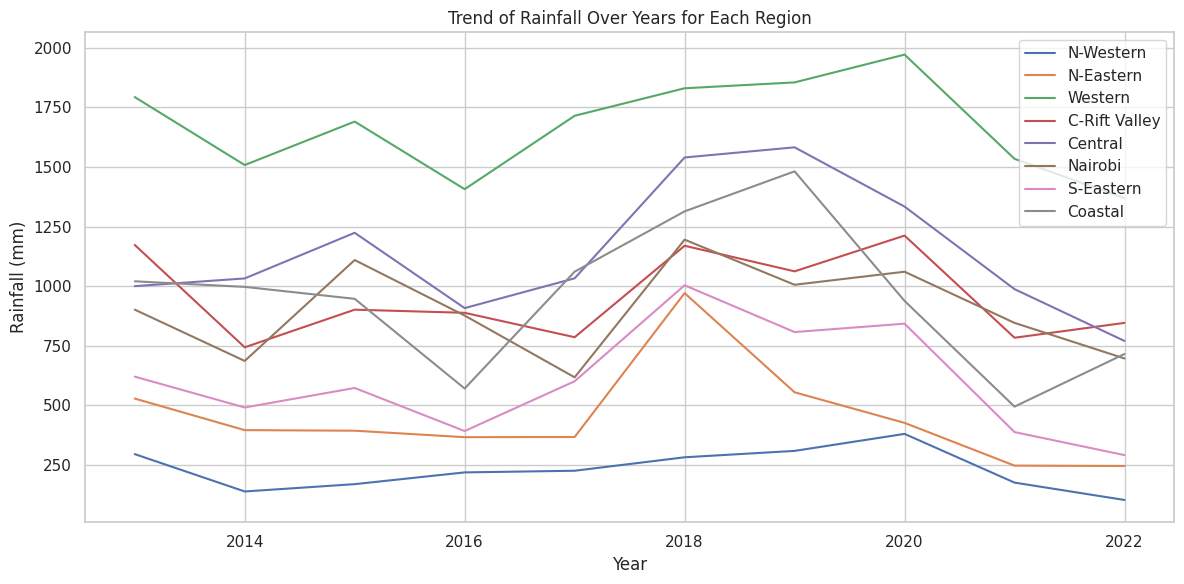

In [75]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Loop through each region and plot the trend
for region in rain_df['Region']:
    plt.plot(rain_df.columns[1:], rain_df.loc[rain_df['Region'] == region].values[0][1:], label=region)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Trend of Rainfall Over Years for Each Region')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show

**Check for outliers**

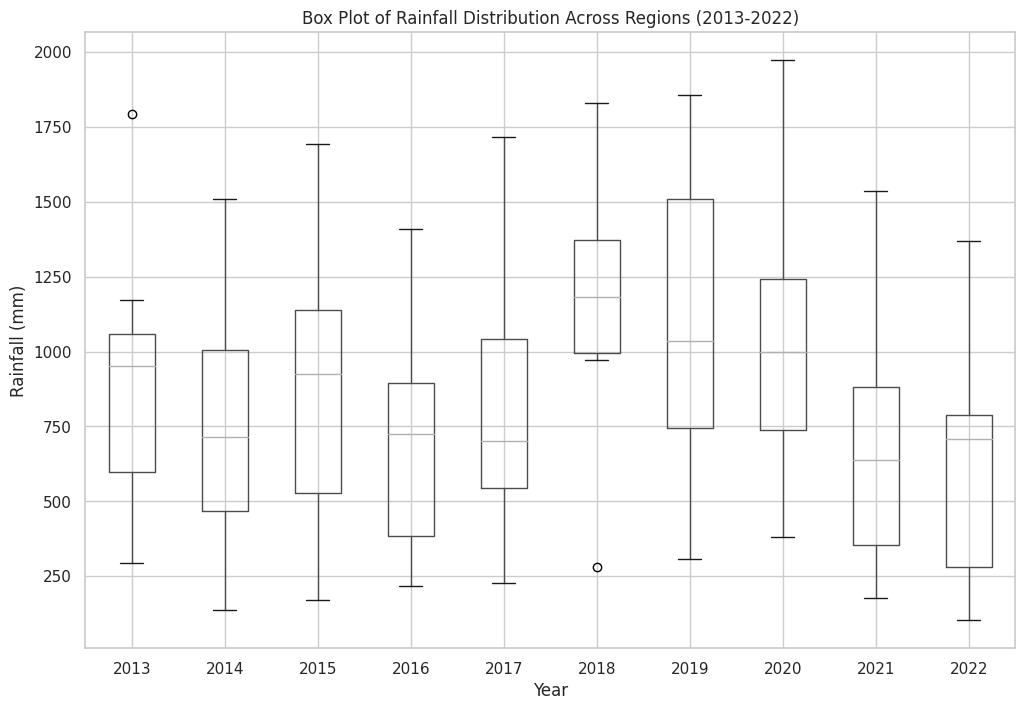

In [76]:
# Extracting relevant columns
years = rain_df.columns[1:]
regions_data = rain_df.iloc[:, 1:]

# Plotting the boxplot
plt.figure(figsize=(12, 8))
regions_data.boxplot(grid=True)
plt.title('Box Plot of Rainfall Distribution Across Regions (2013-2022)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')

plt.show()

Observation:

An outlier is observed in the 2018 rainfall data, characterized by significantly lower rainfall patterns in the North Western region compared to other regions during that year.

**Distribution of rainfall across different years**


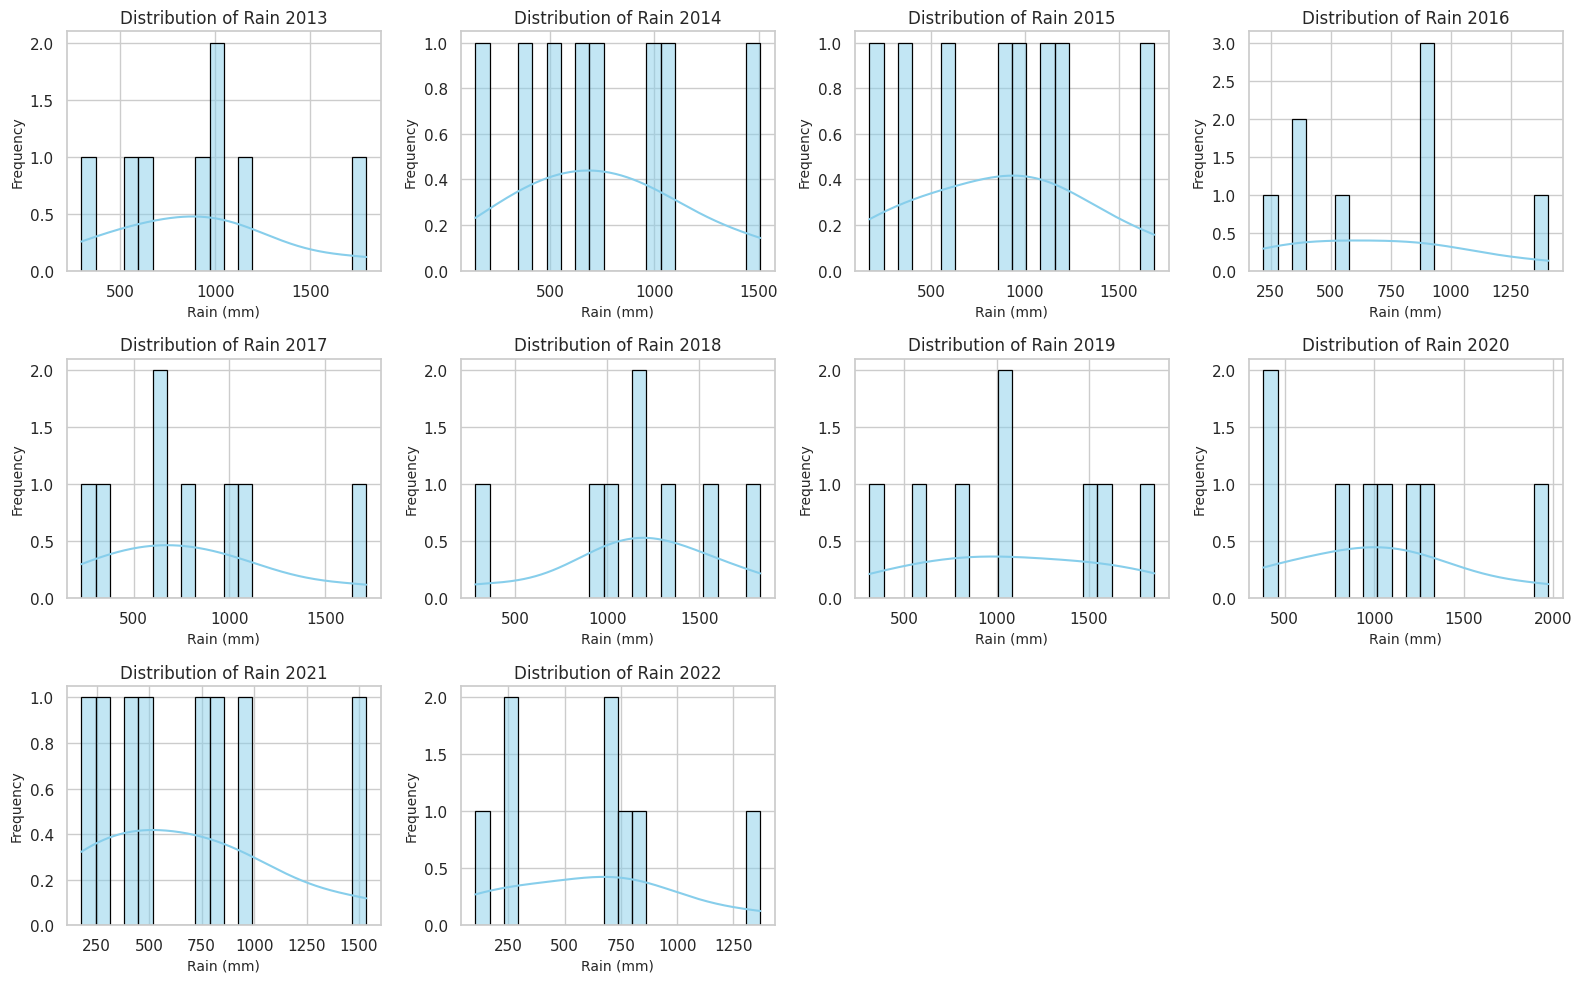

In [77]:
# Plotting separate histograms for each year
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

for i, year in enumerate(rain_df.columns[1:]):
    plt.subplot(3, 4, i+1)
    sns.histplot(rain_df[year], kde=True, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Rain {year}', fontsize=12)
    plt.xlabel('Rain (mm)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

Observation:

The histograms reveal variations in rainfall patterns across different years. Some years exhibit a wider range of rainfall values, while others have a more concentrated distribution.

## **MODELING**

## **Retail and Wholesale Prices of crops**

### **Time series decomposition**

Here we are performing time series decomposition for each crop in the dataset and visualize the original time series along with its trend, seasonal, and residual components.

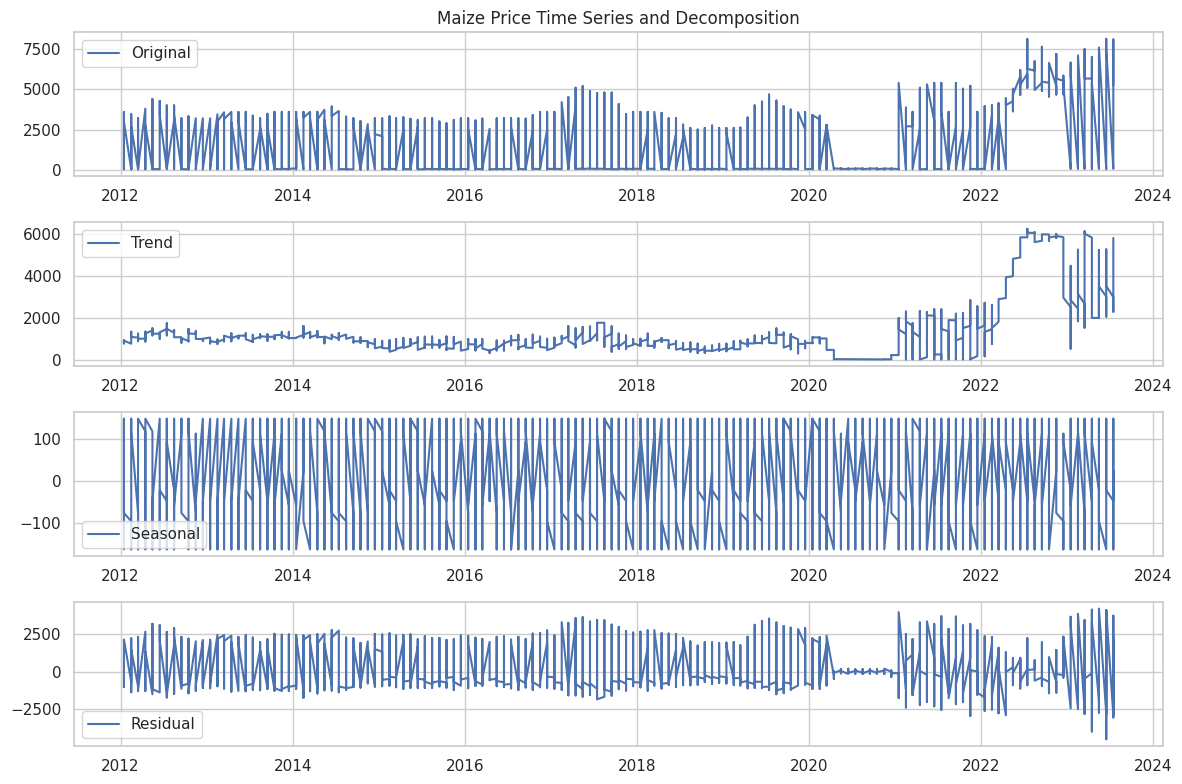

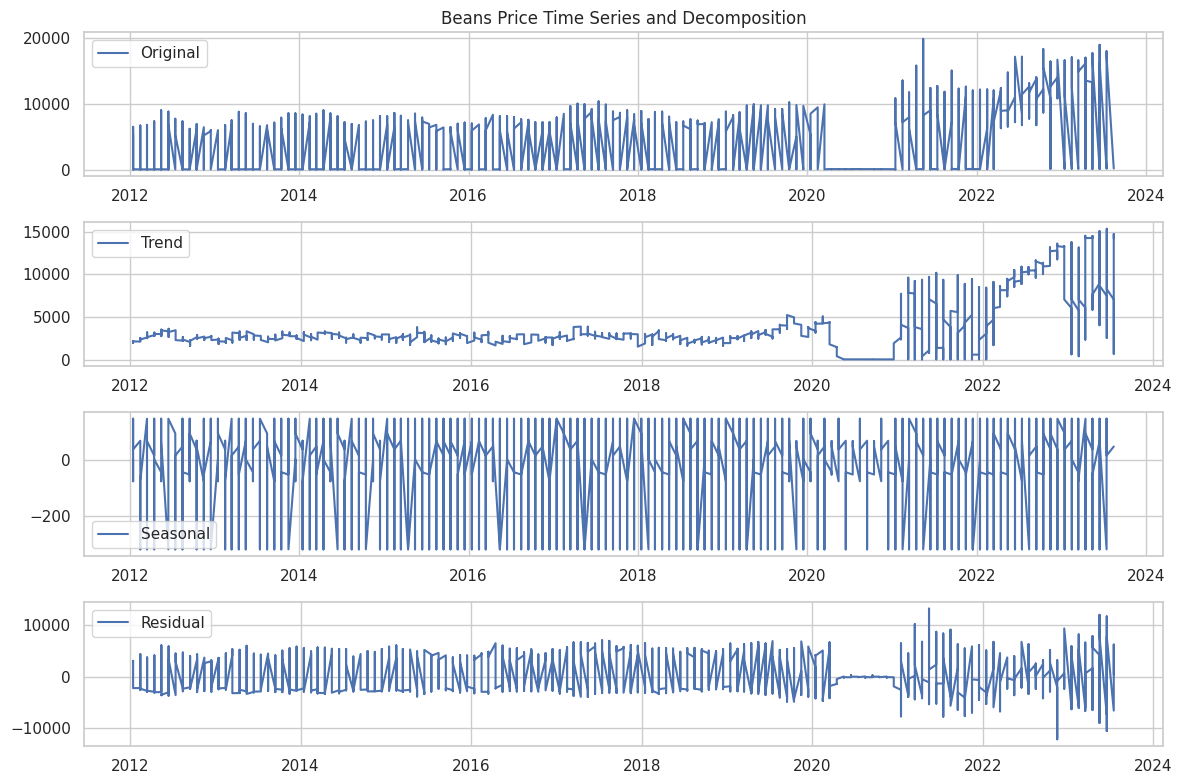

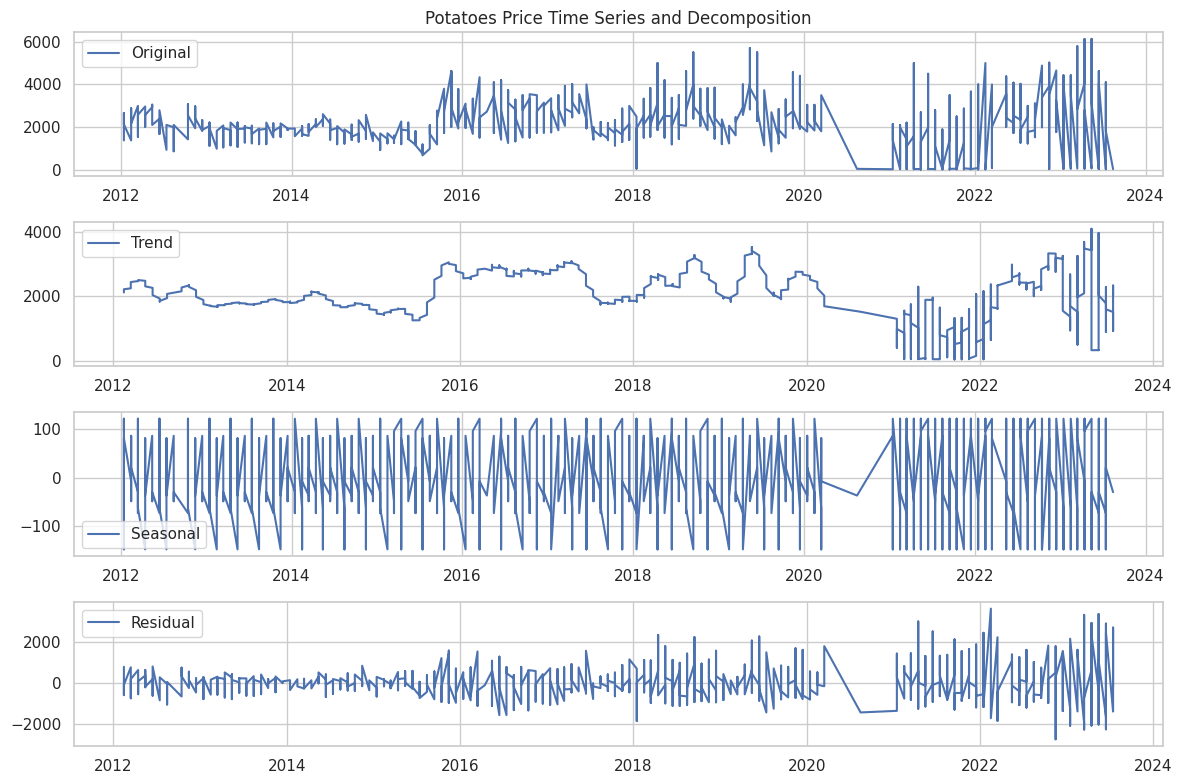

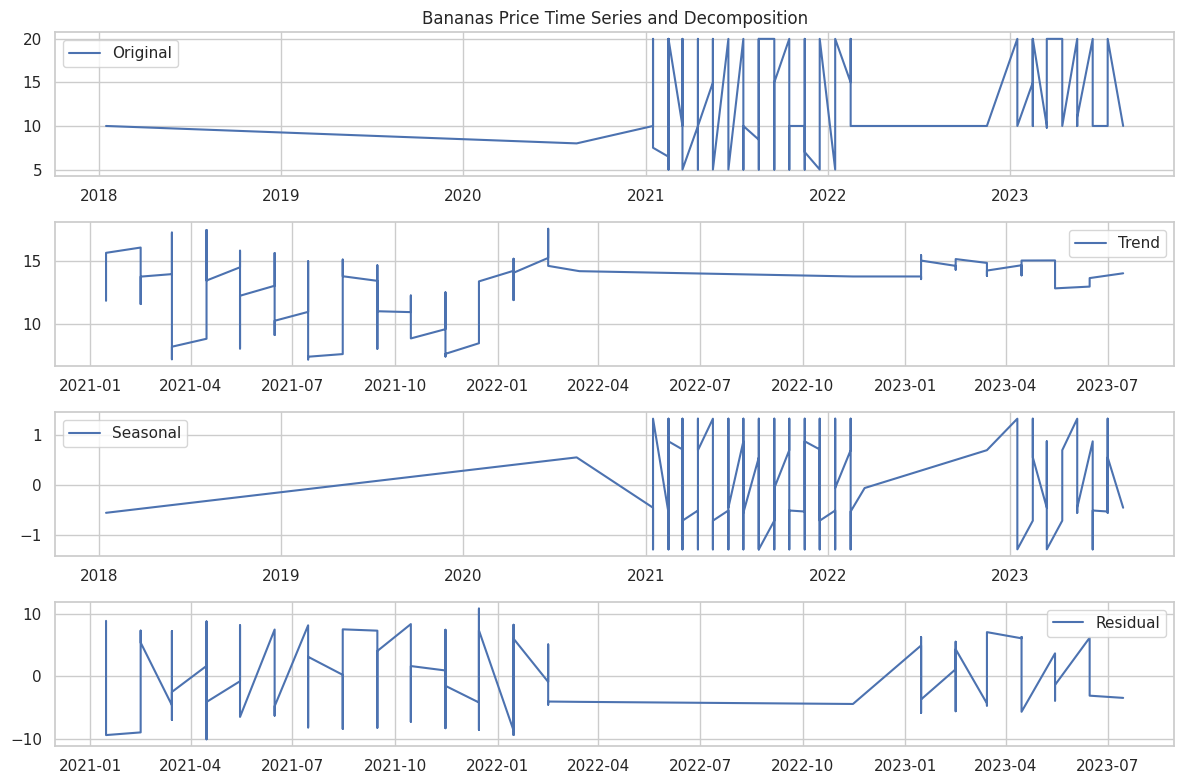

In [78]:
# Get unique crop names in the dataset
crop_names = filtered_df['commodity'].unique()

# Loop through each crop
for crop in crop_names:
    # Filter the dataset for the specific crop
    crop_data = filtered_df[filtered_df['commodity'] == crop]

    # Perform time series decomposition
    decomposition = seasonal_decompose(crop_data['price'], model='additive', period=12)

    # Plot the decomposition components
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(crop_data['price'], label='Original')
    plt.legend()
    plt.title(f'{crop} Price Time Series and Decomposition')

    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend()

    plt.tight_layout()
    plt.show()

### **Data Splitting**

In [79]:
n = len(filtered_df)

# Splitting the dataset into training, validation, and test sets
# Training set: The first 80% of the data
train_size = int(n * 0.8)
train_df = filtered_df.iloc[:train_size]

# Validation set: The next 10% of the data (from 80% to 90%)
val_size = int(n * 0.9)
val_df = filtered_df.iloc[train_size:val_size]

# Test set: The last 10% of the data
test_df = filtered_df.iloc[val_size:]


print("Length of Training Set:", len(train_df))
print("Length of Validation Set:", len(val_df))
print("Length of Test Set:", len(test_df))

Length of Training Set: 5115
Length of Validation Set: 639
Length of Test Set: 640


### **Scaling**

In [80]:
# Split the DataFrame into wholesale and retail subsets
wholesale_data = filtered_df[filtered_df['pricetype'] == 'Wholesale']
retail_data = filtered_df[filtered_df['pricetype'] == 'Retail']

# Selecting columns to scale (assuming 'price' is the column with prices)
columns_to_scale = ['price']

# Initialize MinMaxScaler for wholesale prices
wholesale_scaler = MinMaxScaler()
wholesale_data[columns_to_scale] = wholesale_scaler.fit_transform(wholesale_data[columns_to_scale])

# Initialize MinMaxScaler for retail prices
retail_scaler = MinMaxScaler()
retail_data[columns_to_scale] = retail_scaler.fit_transform(retail_data[columns_to_scale])

# Concatenate the wholesale and retail DataFrames
scaled_df = pd.concat([wholesale_data, retail_data])

### **Baseline Model**

In [81]:
# 'price' is the column we want to predict
y = scaled_df['price'].values

# Splitting the dataset into training and validation sets
train_size = int(len(y) * 0.8)
train_data = scaled_df.iloc[:train_size]
val_data = scaled_df.iloc[train_size:]

# Set the ARIMA hyperparameters
order = (1, 1, 1)  # p, d, q

# Fit ARIMA model with the training data
arima_model = ARIMA(train_data['price'].values, order=order)
arima_fit = arima_model.fit()

# Predict on the validation set
arima_predictions = arima_fit.predict(start=len(train_data), end=len(train_data) + len(val_data) - 1, typ='levels')

# Evaluate the model on the validation set
mae_arima = mean_absolute_error(val_data['price'].values, arima_predictions)

# Print the Mean Absolute Error
print(f"Mean Absolute Error for ARIMA on Validation Set: {mae_arima}")

Mean Absolute Error for ARIMA on Validation Set: 0.16362318164408923


### **ARIMA**

In [82]:
y_train = train_data['price'].values
y_val = val_data['price'].values

# Set the ARIMA hyperparameters
order = (1, 1, 1)  # p, d, q

# Fit ARIMA model with the training data
arima_model = ARIMA(y_train, order=order)
arima_fit = arima_model.fit()

# Predict on the validation set
arima_predictions = arima_fit.predict(start=len(y_train), end=len(y_train) + len(y_val) - 1, typ='levels')

# Evaluate the model on the validation set
mse_arima = mean_squared_error(y_val, arima_predictions)

# Calculate the range of the original data
data_range = np.max(y_val) - np.min(y_val)

# Normalize the MSE
normalized_mse = mse_arima / data_range**2  # Squaring the range to ensure the result is between 0 and 1

print(f"Normalized MSE for ARIMA on Validation Set: {normalized_mse}")

Normalized MSE for ARIMA on Validation Set: 0.04432222608787397


**Do predictions**

In [83]:
# List of crops
crop_names = filtered_df['commodity'].unique()

# Create a DataFrame to store predictions for each crop
columns = ['Crop', 'Year', 'Retail Predictions']
retail_prediction_df = pd.DataFrame(columns=columns)

# Set the ARIMA hyperparameters
order = (1, 1, 1)  # p, d, q
forecast_steps = 5  # Number of years to forecast

# Iterate over each crop
for crop in crop_names:
    # Filter the dataset for the specific crop
    crop_data = filtered_df[filtered_df['commodity'] == crop]

    # Assuming 'price' is the column we want to predict
    y_train_retail = crop_data[crop_data['pricetype'] == 'Retail']['price'].values

    # Split data into training and validation sets
    train_size = int(len(y_train_retail) * 0.8)
    train_retail, val_retail = y_train_retail[:train_size], y_train_retail[train_size:]

    # Fit ARIMA model with the training data for retail prices
    arima_retail_model = ARIMA(train_retail, order=order)
    arima_retail_fit = arima_retail_model.fit()

    # Predict on the future years (2024 to 2028) for retail prices
    arima_retail_predictions = arima_retail_fit.predict(start=len(train_retail), end=len(train_retail) + forecast_steps - 1, typ='levels')

    # Create a DataFrame for the current crop's predictions
    crop_predictions_df_retail = pd.DataFrame(columns=columns)
    crop_predictions_df_retail['Crop'] = [crop] * forecast_steps
    crop_predictions_df_retail['Year'] = range(2024, 2029)
    crop_predictions_df_retail['Retail Predictions'] = arima_retail_predictions

    # Append the crop's predictions to the main DataFrame
    retail_prediction_df = retail_prediction_df.append(crop_predictions_df_retail, ignore_index=True)


In [84]:
retail_prediction_df

Crop  Year  Retail Predictions
0      Maize  2024           46.324773
1      Maize  2025           46.313836
2      Maize  2026           46.313741
3      Maize  2027           46.313740
4      Maize  2028           46.313740
5      Beans  2024          100.325336
6      Beans  2025          101.977297
7      Beans  2026          101.818402
8      Beans  2027          101.833685
9      Beans  2028          101.832215
10  Potatoes  2024           56.205117
11  Potatoes  2025           55.866582
12  Potatoes  2026           55.836381
13  Potatoes  2027           55.833687
14  Potatoes  2028           55.833447
15   Bananas  2024           10.888867
16   Bananas  2025           11.369154
17   Bananas  2026           11.628671
18   Bananas  2027           11.768897
19   Bananas  2028           11.844667

## **Population**

Utilizing time series modeling to forecast county and country populations from 2023 to 2028 is essential for making informed decisions regarding anticipated crop demand for sustainability. By employing historical data in these models, we can proactively anticipate both demographic shifts and their impact on the agricultural landscape, facilitating strategic planning for sustainable crop production.

In [85]:
# Convert the population columns to numeric
numeric_columns = [2019, 2020, 2021, 2022]
population_df[numeric_columns] = population_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Specify the order for the ARIMA model (p, d, q)
order = (1, 1, 1)

# Create a DataFrame for predictions
predictions_df = pd.DataFrame(columns=['County', '2023', '2024', '2025', '2026', '2027', '2028'])

# Iterate over each county
for index, row in population_df.iterrows():
    county_name = row['County']
    county_data = row[numeric_columns].to_numpy(dtype='float64')

    # Fit the ARIMA model
    model = ARIMA(county_data, order=order)
    fit_model = model.fit()

    # Make predictions for 2023 to 2028
    predictions = fit_model.predict(start=len(county_data), end=len(county_data) + 5)

    # Append the predictions to the DataFrame
    predictions_df = predictions_df.append({'County': county_name, '2023': predictions[0],
                                            '2024': predictions[1], '2025': predictions[2],
                                            '2026': predictions[3], '2027': predictions[4],
                                            '2028': predictions[5]}, ignore_index=True)

predictions_df.head()

County          2023          2024          2025          2026  \
0       Kenya  51349.548497  51958.633535  52469.245812  52897.305742   
1     Mombasa   1308.154090   1330.218920   1350.375205   1368.788030   
2       Kwale    940.077883    954.030481    965.429727    974.742890   
3      Kilifi   1578.247679   1608.365654   1638.354481   1668.214714   
4  Tana River    352.929579    361.783192    370.561483    379.265095   

           2027          2028  
0  53256.159830  53556.996809  
1   1385.608198   1400.973470  
2    982.351726    988.568130  
3   1697.946905   1727.551601  
4    387.894662    396.450814

In [86]:
# Extract actual population data for the years 2023 to 2028
actual_values = population_df[['County', 2019, 2020, 2021, 2022]]

# Merge actual values with predicted values based on the 'County' column
comparison_df = pd.merge(actual_values, predictions_df, on='County', suffixes=('_actual', '_predicted'))
comparison_df.head()

County   2019   2020   2021   2022          2023          2024  \
0       Kenya  47564  48818  49720  50623  51349.548497  51958.633535   
1     Mombasa   1208   1228   1256   1284   1308.154090   1330.218920   
2       Kwale    866    879    901    923    940.077883    954.030481   
3      Kilifi   1453   1489   1518   1548   1578.247679   1608.365654   
4  Tana River    315    326    335    344    352.929579    361.783192   

           2025          2026          2027          2028  
0  52469.245812  52897.305742  53256.159830  53556.996809  
1   1350.375205   1368.788030   1385.608198   1400.973470  
2    965.429727    974.742890    982.351726    988.568130  
3   1638.354481   1668.214714   1697.946905   1727.551601  
4    370.561483    379.265095    387.894662    396.450814

In [87]:
# Iterate over each county
for index, row in population_df.iterrows():
    county_name = row['County']
    county_data = row[numeric_columns].to_numpy(dtype='float64')

    # Fit the ARIMA model
    model = ARIMA(county_data, order=order)
    fit_model = model.fit()

    # Make predictions for 2023 to 2028
    predictions = fit_model.predict(start=len(county_data), end=len(county_data) + 5)

    # Calculate MAE and RMSE
    mae = mean_absolute_error(county_data, predictions[:len(county_data)])
    rmse = np.sqrt(mean_squared_error(county_data, predictions[:len(county_data)]))

    print(f"Metrics for {county_name}:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print("--------------")

Metrics for Kenya:
MAE: 2987.4333964334055
RMSE: 3038.287986919177
--------------
Metrics for Mombasa:
MAE: 95.38406123822676
RMSE: 95.62326950374899
--------------
Metrics for Kwale:
MAE: 66.32024517414587
RMSE: 66.9806356152721
--------------
Metrics for Kilifi:
MAE: 121.29563230676945
RMSE: 121.31768142510796
--------------
Metrics for Tana River:
MAE: 36.13483745054931
RMSE: 36.150158541160145
--------------
Metrics for Lamu:
MAE: 15.656320323637765
RMSE: 16.349119179491062
--------------
Metrics for Taita/Taveta:
MAE: 22.084692649556246
RMSE: 22.183136139766848
--------------
Metrics for Garissa:
MAE: 87.21675710733493
RMSE: 87.21997372970792
--------------
Metrics for Wajir:
MAE: 88.19835340958804
RMSE: 88.19954072635504
--------------
Metrics for Mandera:
MAE: 93.68624038865136
RMSE: 93.69525334287341
--------------
Metrics for Marsabit:
MAE: 48.99646141394379
RMSE: 49.17047401165315
--------------
Metrics for Isiolo:
MAE: 33.23778717311204
RMSE: 34.46206086885151
--------------

Observation:

Given that we have historical population data that is narrow, it has affected the model's performance hence the huge RMSE and MAE values.



## **Growing of Crops GDP**

In [88]:
growing_of_crops_df

Industry  2018  2019  2020  2021  2022
0  Growing of Crops  14.5  15.1  16.7  15.3  15.2

In [89]:
# Extract the time series data
time_series = growing_of_crops_df.loc[:, 2018:].squeeze()

# Fit ARIMA model
model = ARIMA(time_series, order=(1, 1, 1))  # Adjust the order as needed
result = model.fit()

# Forecast for the next 5 years
forecast = result.get_forecast(steps=5)
forecast_index = range(2024, 2029)
forecast_values = forecast.predicted_mean.values

# Update the DataFrame with forecasted values
for year, value in zip(forecast_index, forecast_values):
    growing_of_crops_df[year] = value

growing_of_crops_df

Industry  2018  2019  2020  2021  2022      2024       2025  \
0  Growing of Crops  14.5  15.1  16.7  15.3  15.2  15.29238  15.310438   

        2026       2027       2028  
0  15.313967  15.314657  15.314792

In [90]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(time_series, forecast_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(time_series, forecast_values))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.5036600850473597
Root Mean Squared Error (RMSE): 0.7220289383849033


Observation:

The Mean Absolute Error (MAE) of approximately 0.50 indicates the average absolute difference between the actual and predicted values for the years 2023 to 2027.

## **Material Inputs**

### **Fertilizer**

In [91]:
df_fert.set_index('Date', inplace=True)
df_fert.sort_values('Date').reset_index(drop=True)
df_fert=df_fert.sort_values('Date').reset_index(drop=True)
df_fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   300 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


**Checking for stationarity**





In [92]:
#The Augmented Dickey-Fuller test for stationarity on the filled dataset

adf_test_result_filled = adfuller(df_fert)

# Extracting the p-value from the test results
adf_p_value_filled = adf_test_result_filled[1]

adf_p_value_filled


0.01836051501336361

Observation:

Since the p-value (0.0184) is less than 0.05(alpha), we can reject the null hypothesis. Therefore, the dataset appears to be stationary based on the Augmented Dickey-Fuller test.

**Train Test Split**

In [93]:
train_size = int(len(df_fert) * 0.8)
train_data, test_data = df_fert[0:train_size], df_fert[train_size:]

# Checking the sizes of the training and testing sets
train_data_size = train_data.shape[0]
test_data_size = test_data.shape[0]

train_data_size, test_data_size

(240, 60)

In [94]:
# Perform grid search for ARIMA parameters using only the training data
arima_model = pm.auto_arima(train_data['Value'], seasonal=False, suppress_warnings=True)

# Perform grid search for SARIMA parameters using only the training data
sarima_model = pm.auto_arima(train_data['Value'], seasonal=True, suppress_warnings=True)

print("Best ARIMA model parameters:", arima_model.order)
print("Best SARIMA model parameters:", sarima_model.order)


Best ARIMA model parameters: (1, 1, 0)
Best SARIMA model parameters: (1, 1, 0)


In [95]:
#ARIMA
arima_order = (0,0,1)
arima_model=ARIMA(train_data,order=arima_order).fit()
arima_model.summary()

# Forecasting
arima_forecast = arima_model.get_forecast(steps=len(test_data))
arima_forecast_mean = arima_forecast.predicted_mean

# Calculate RMSE
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast_mean))
print(f'ARIMA RMSE: {arima_rmse:.2f}')

ARIMA RMSE: 85.38


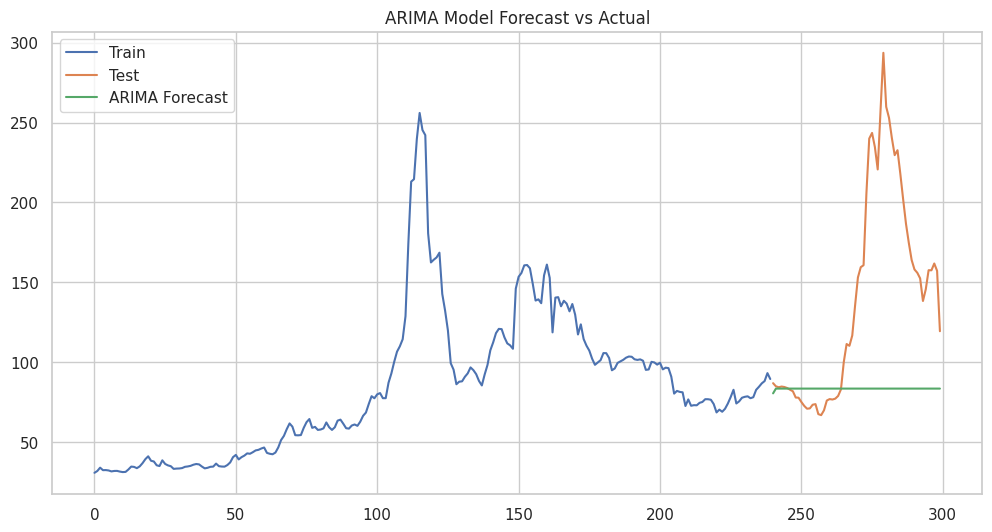

In [96]:
#Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(arima_forecast_mean.index, arima_forecast_mean, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast vs Actual')
plt.legend()
plt.show()

In [97]:
forecast_steps = 10
forecast =  arima_model.forecast(steps=forecast_steps)
forecast

240    80.450282
241    83.430953
242    83.430953
243    83.430953
244    83.430953
245    83.430953
246    83.430953
247    83.430953
248    83.430953
249    83.430953
Name: predicted_mean, dtype: float64

**SARIMA Model**

In [98]:
# SARIMA Order
sarima_order = (1, 1, 0, 50)
# Train and fit the SARIMA model
sarima_model = SARIMAX(train_data, order=(1, 0, 1), seasonal_order=sarima_order)
sarima_model_fit = sarima_model.fit(disp=False)
sarima_model_fit.summary()

# Forecasting
sarima_forecast = sarima_model_fit.get_forecast(steps=len(test_data))
sarima_forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE
sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_forecast_mean))
print(f'SARIMA RMSE: {sarima_rmse:.2f}')

SARIMA RMSE: 83.51


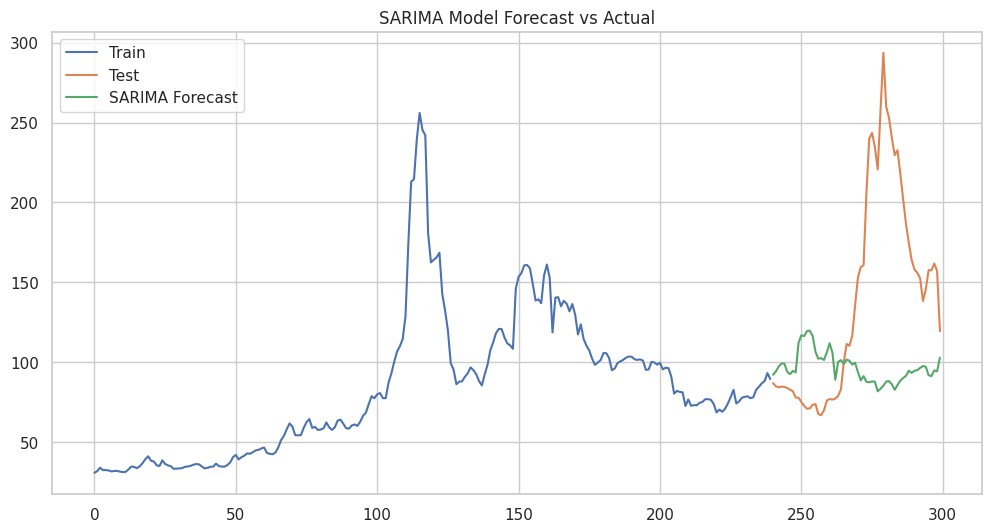

In [99]:
#Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(sarima_forecast_mean.index, sarima_forecast_mean, label='SARIMA Forecast')
plt.title('SARIMA Model Forecast vs Actual')
plt.legend()
plt.show()

In [100]:
forecast_steps = 10
forecast =  sarima_model_fit.forecast(steps=forecast_steps)
forecast

240     92.124641
241     94.213252
242     97.319732
243     99.190524
244     99.032694
245     93.914339
246     92.467654
247     94.536317
248     93.563328
249    112.217162
Name: predicted_mean, dtype: float64

Observation:

Given the RSME of the SARIMA is lower than the ARIMA model's RSME, it's reasonable to conclude that the SARIMA model provides better predictive performance for the fertilizer data. We will use the SARIMA model to generate fertilizer predictions for the years 2023 to 2028.

In [101]:
# Create a DataFrame to store the forecasted values
forecast_df = pd.DataFrame(columns=['Year', 'Forecasted Value'])

# Forecasted values for 2023 to 2028
forecast_years = range(2023, 2029)

# Append the forecasted values to the DataFrame
for year, value in zip(forecast_years, sarima_forecast_mean):
    forecast_df = forecast_df.append({'Year': year, 'Forecasted Value': value}, ignore_index=True)

forecast_df


Year  Forecasted Value
0  2023.0         92.124641
1  2024.0         94.213252
2  2025.0         97.319732
3  2026.0         99.190524
4  2027.0         99.032694
5  2028.0         93.914339

###**Fuel**

In [102]:
df_fuels.set_index('Date', inplace=True)
df_fuels = df_fuels.sort_values('Date').reset_index(drop=True)
df_fuels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   250 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


**Check for stationarity**

In [103]:
#The Augmented Dickey-Fuller test for stationarity on the filled dataset

adf_test_result_filled = adfuller(df_fuels)

# Extracting the p-value from the test results
adf_p_value_filled = adf_test_result_filled[1]

adf_p_value_filled

0.1347347038744915

Given the ad fuller p-value is greater than 0.05(0.1347347038744915) then we can't reject the null hypothesis showing that our data is not stationary. We shall do some decomposition.

6.540399738008233e-05


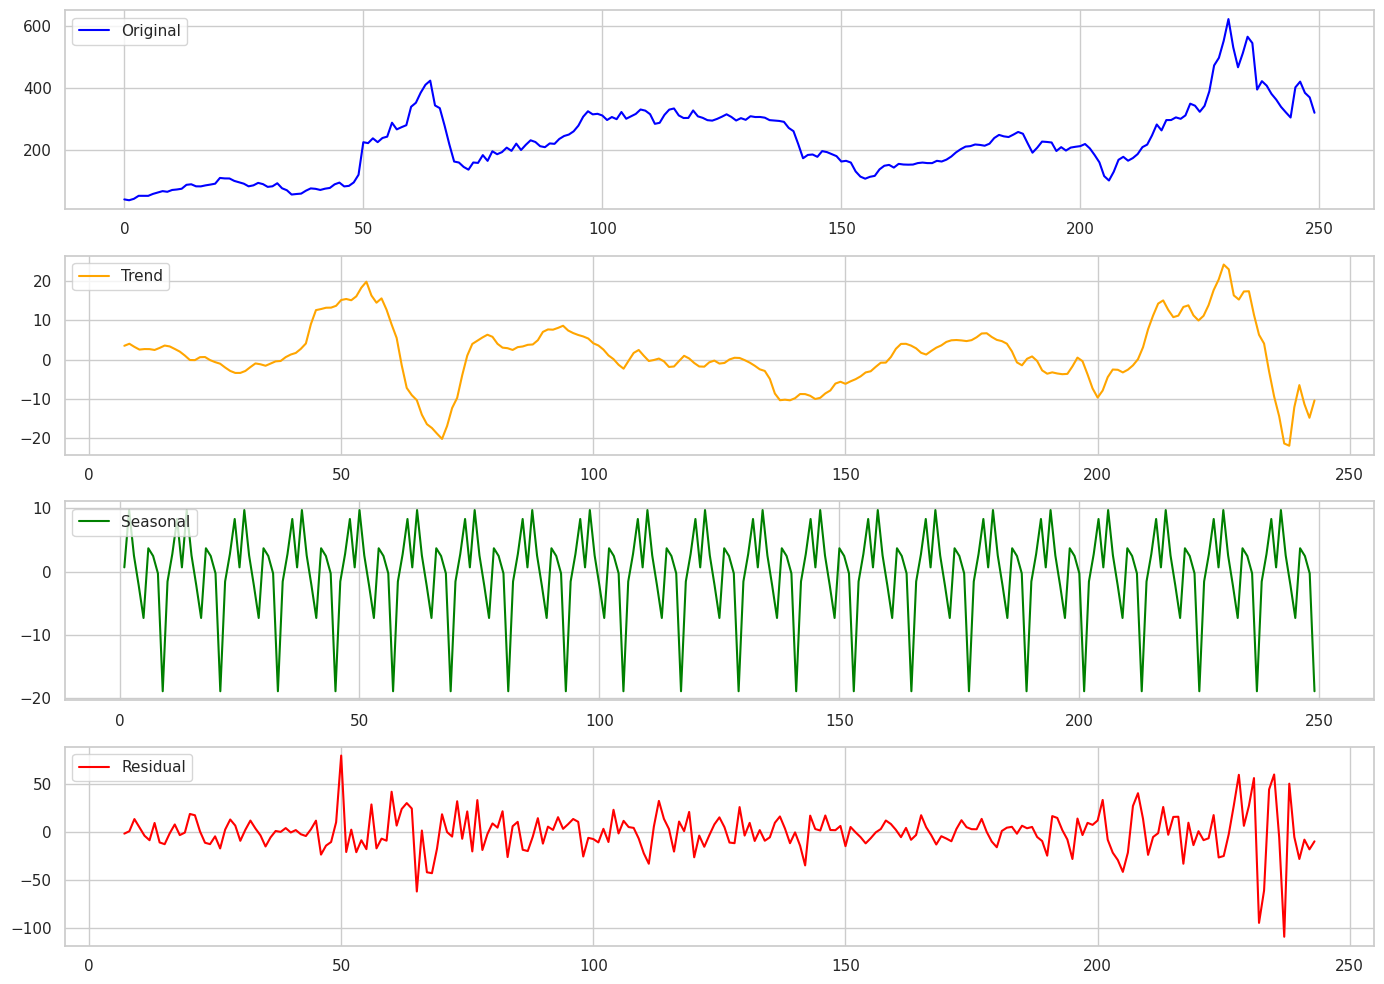

In [104]:
df_fuels_diff = df_fuels.diff().dropna()

# Use the differenced dataframe for decomposition
decomposition = seasonal_decompose(df_fuels_diff, period=12)

# Performing the Augmented Dickey-Fuller test again on the differenced data
adf_test_result_diff = adfuller(df_fuels_diff)
adf_p_value_diff = adf_test_result_diff[1]
print(adf_p_value_diff)

# Plotting the original series, trend, seasonal, and residual components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(df_fuels, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()


With new and improved ad fuller p-value of 0.000005 then the data is now stationary, we can proceed to modelling

**Train test split**

In [105]:
train_size = int(len(df_fuels) * 0.7)
train_data, test_data = df_fuels[0:train_size], df_fuels[train_size:]

# Checking the sizes of the training and testing sets
train_data_size = train_data.shape[0]
test_data_size = test_data.shape[0]

train_data_size, test_data_size

(175, 75)

Using an autoarima code, we can get a better idea on the parameters to use.

In [106]:
# Perform grid search for ARIMA parameters using only the training data
arima_model = pm.auto_arima(train_data['Value'], seasonal=False, suppress_warnings=True)

# Perform grid search for SARIMA parameters using only the training data
sarima_model = pm.auto_arima(train_data['Value'], seasonal=True, suppress_warnings=True)

print("Best ARIMA model parameters:", arima_model.order)
print("Best SARIMA model parameters:", sarima_model.order)

Best ARIMA model parameters: (2, 1, 1)
Best SARIMA model parameters: (2, 1, 1)


**ARIMA**

In [107]:
#ARIMA
arima_order = (2, 1, 1)
arima_model=ARIMA(train_data,order=arima_order).fit()
arima_model.summary()

# Forecasting
arima_forecast = arima_model.get_forecast(steps=len(test_data))
arima_forecast_mean = arima_forecast.predicted_mean

# Calculate RMSE
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast_mean))
print(f'ARIMA RMSE: {arima_rmse:.2f}')

ARIMA RMSE: 146.87


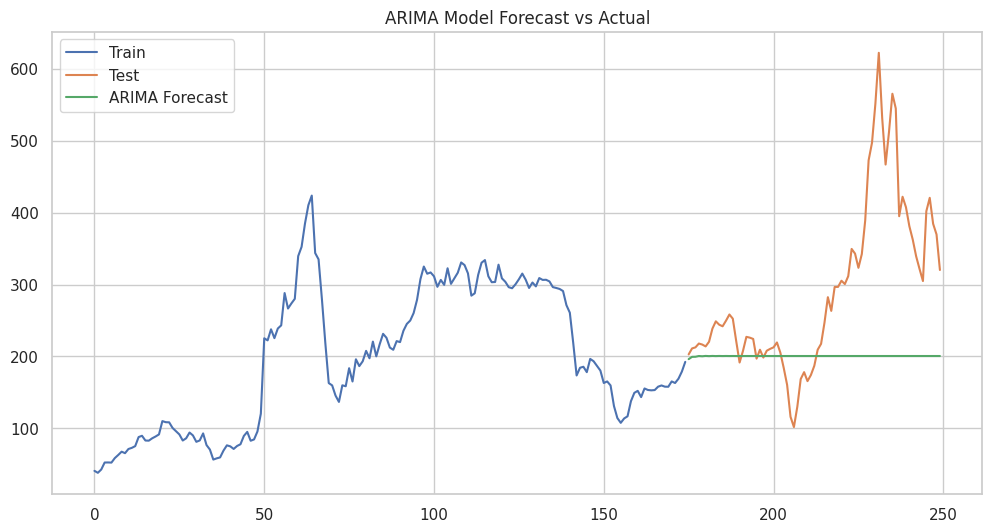

In [108]:
#Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(arima_forecast_mean.index, arima_forecast_mean, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast vs Actual')
plt.legend()
plt.show()

In [109]:
forecast_steps = 10
forecast =  arima_model.forecast(steps=forecast_steps)
forecast

175    196.298803
176    199.481185
177    199.600249
178    200.635687
179    200.295661
180    200.771709
181    200.481510
182    200.749558
183    200.552672
184    200.715902
Name: predicted_mean, dtype: float64

**SARIMA**

In [110]:
# SARIMA Order
sarima_order = (1, 1, 0, 50)  # (p, d, q, S) for seasonal order - S is 12 for monthly data
# Train and fit the SARIMA model
sarima_model = SARIMAX(train_data, order=(1, 0, 1), seasonal_order=sarima_order)
sarima_model_fit = sarima_model.fit(disp=False)
sarima_model_fit.summary()

# Forecasting
sarima_forecast = sarima_model_fit.get_forecast(steps=len(test_data))
sarima_forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE
sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_forecast_mean))
print(f'SARIMA RMSE: {sarima_rmse:.2f}')


SARIMA RMSE: 128.17


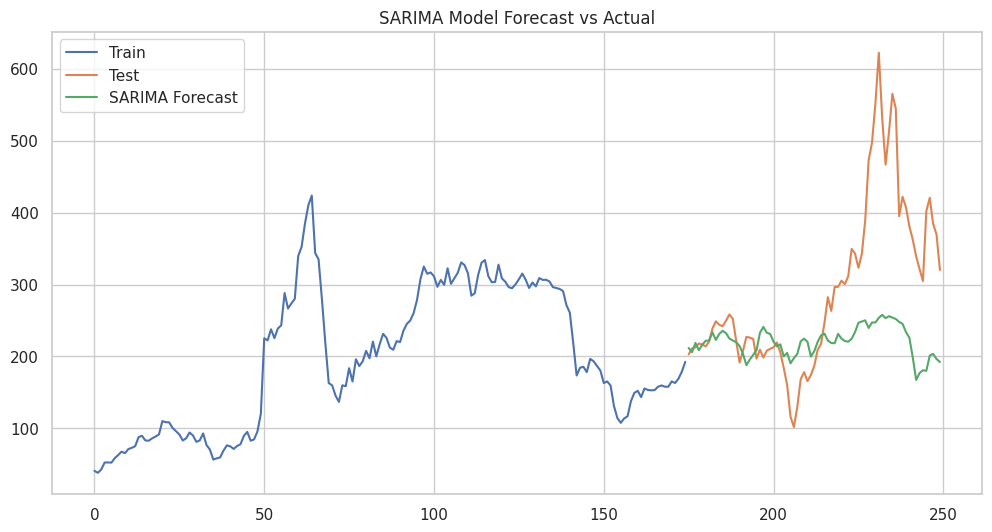

In [111]:
#Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(sarima_forecast_mean.index, sarima_forecast_mean, label='SARIMA Forecast')
plt.title('SARIMA Model Forecast vs Actual')
plt.legend()
plt.show()

In [112]:
forecast_steps = 10
forecast =  sarima_model_fit.forecast(steps=forecast_steps)
forecast

175    211.758679
176    205.933075
177    218.825185
178    208.749733
179    216.221927
180    221.792235
181    222.046543
182    233.557554
183    223.043941
184    231.270332
Name: predicted_mean, dtype: float64

In [113]:
# Create a DataFrame to store the forecasted values
fuel_prediction_df = pd.DataFrame(columns=['Year', 'Forecasted Value'])

# Forecasted values for 2023 to 2028
forecast_years = range(2023, 2029)

# Append the forecasted values to the DataFrame
for year, value in zip(forecast_years, sarima_forecast_mean):
    fuel_prediction_df = fuel_prediction_df.append({'Year': year, 'Forecasted Value': value}, ignore_index=True)

fuel_prediction_df

Year  Forecasted Value
0  2023.0        211.758679
1  2024.0        205.933075
2  2025.0        218.825185
3  2026.0        208.749733
4  2027.0        216.221927
5  2028.0        221.792235

### **Grains**

**Check for stationarity**

In [114]:
df_grains.set_index('Date', inplace=True)
df_grains = df_grains.sort_values('Date').reset_index(drop=True)
df_grains.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   300 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [115]:
#The Augmented Dickey-Fuller test for stationarity on the filled dataset

adf_test_result_filled = adfuller(df_grains)

# Extracting the p-value from the test results
adf_p_value_filled = adf_test_result_filled[1]

adf_p_value_filled

0.3640296722159263

Given the ad fuller p-value is greater than 0.05(0.188) then we can't reject the null hypothesis showing that our data is not stationary. We shall do some decomposition.

1.8039169246783467e-22


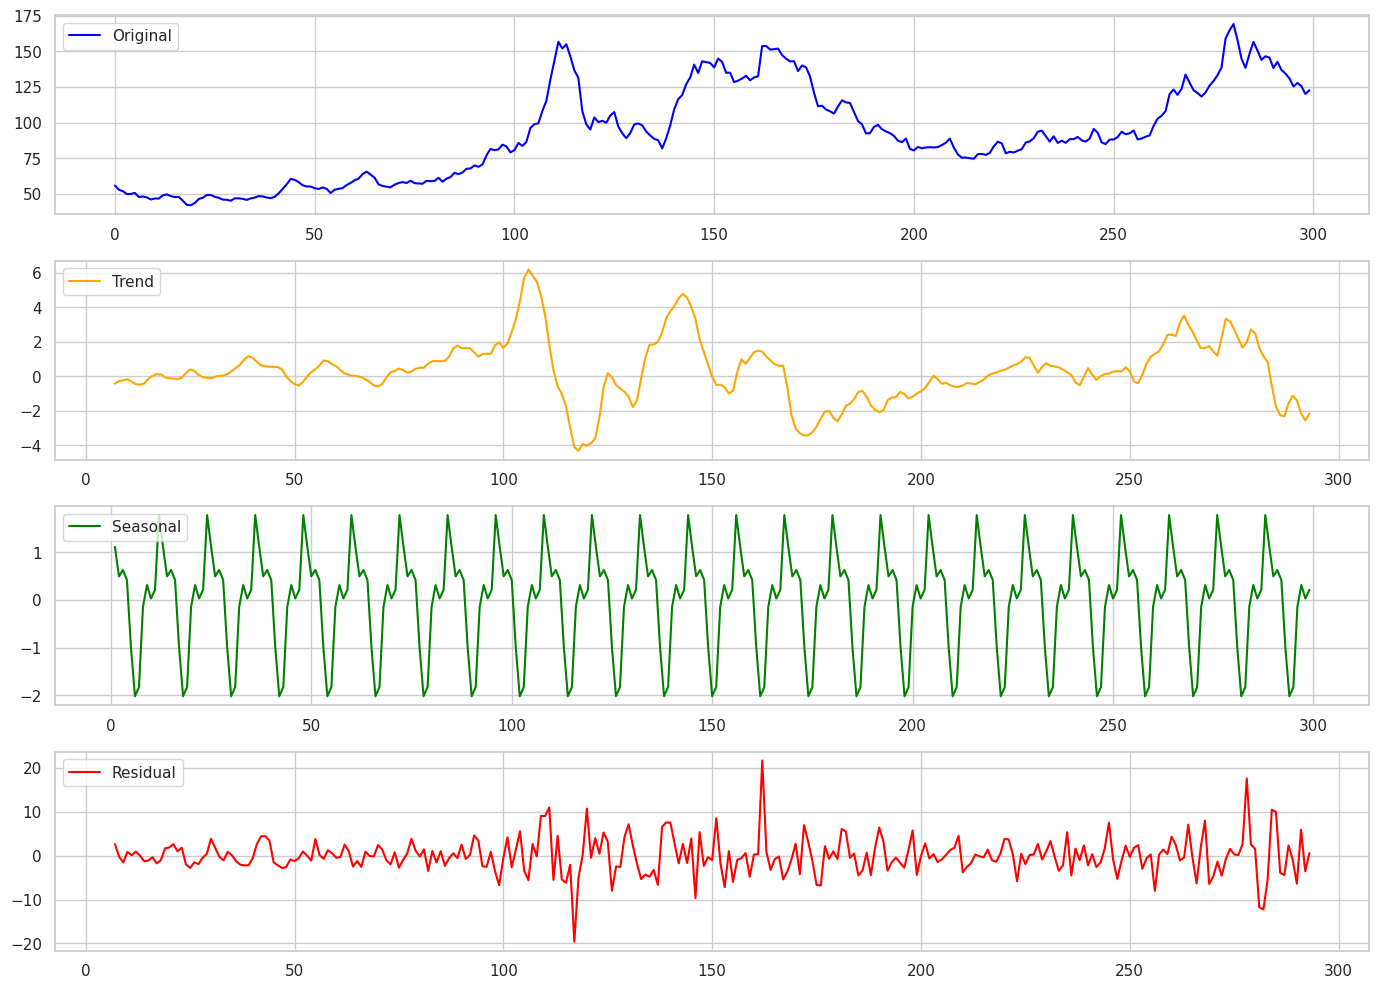

In [116]:
df_grains_diff = df_grains.diff().dropna()

# Use the differenced dataframe for decomposition
decomposition = seasonal_decompose(df_grains_diff, period=12)

# Performing the Augmented Dickey-Fuller test again on the differenced data
adf_test_result_diff = adfuller(df_grains_diff)
adf_p_value_diff = adf_test_result_diff[1]
print(adf_p_value_diff)

# Plotting the original series, trend, seasonal, and residual components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(df_grains, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()


In [117]:
df_grains_diff=df_grains_diff.reset_index(drop=True)
df_grains_diff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   299 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


**Train test split**

In [118]:
train_size = int(len(df_grains) * 0.7)
train_data, test_data = df_grains[0:train_size], df_grains[train_size:]

# Checking the sizes of the training and testing sets
train_data_size = train_data.shape[0]
test_data_size = test_data.shape[0]

train_data_size, test_data_size

(210, 90)

Below we use an autoarima model to help us get an idea for suitable parameters

In [119]:
# Perform grid search for ARIMA parameters using only the training data
arima_model = pm.auto_arima(train_data['Value'], seasonal=False, suppress_warnings=True)

# Perform grid search for SARIMA parameters using only the training data
sarima_model = pm.auto_arima(train_data['Value'], seasonal=True, suppress_warnings=True)

print("Best ARIMA model parameters:", arima_model.order)
print("Best SARIMA model parameters:", sarima_model.order)

Best ARIMA model parameters: (2, 1, 0)
Best SARIMA model parameters: (2, 1, 0)


**ARIMA**

In [120]:
#ARIMA
arima_order = (2, 1, 0)
arima_model=ARIMA(train_data,order=arima_order).fit()
arima_model.summary()

# Forecasting
arima_forecast = arima_model.get_forecast(steps=len(test_data))
arima_forecast_mean = arima_forecast.predicted_mean

# Calculate RMSE
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast_mean))
print(f'ARIMA RMSE: {arima_rmse:.2f}')


ARIMA RMSE: 29.87


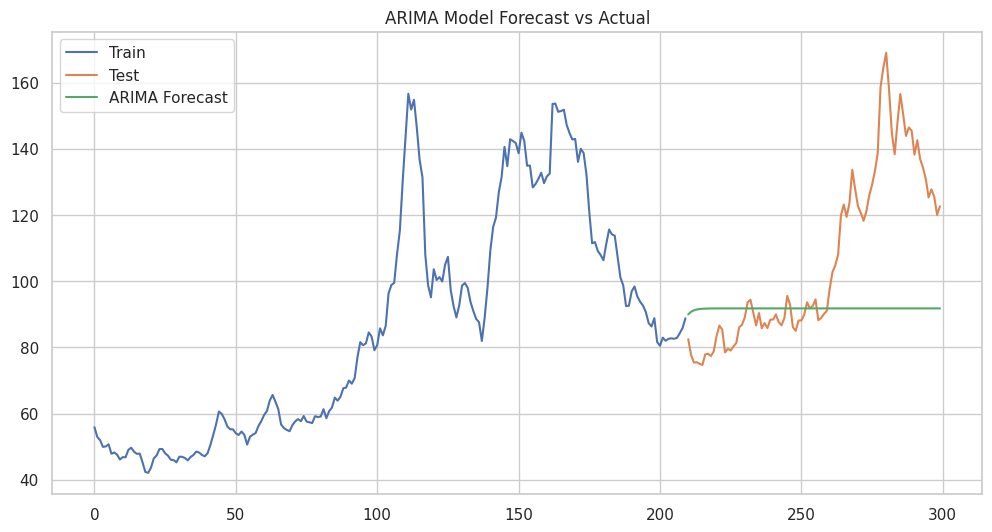

In [121]:
#Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(arima_forecast_mean.index, arima_forecast_mean, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast vs Actual')
plt.legend()
plt.show()

In [122]:
forecast_steps = 10
forecast =  arima_model.forecast(steps=forecast_steps)
forecast

210    89.990454
211    90.790171
212    91.214321
213    91.466521
214    91.608884
215    91.691135
216    91.738161
217    91.765175
218    91.780659
219    91.789544
Name: predicted_mean, dtype: float64

**SARIMA**

In [123]:
# SARIMA Order
sarima_order = (1, 1, 0, 50)  # (p, d, q, S) for seasonal order - S is 12 for monthly data
# Train and fit the SARIMA model
sarima_model = SARIMAX(train_data, order=(1, 0, 1), seasonal_order=sarima_order)
sarima_model_fit = sarima_model.fit(disp=False)
sarima_model_fit.summary()

# Forecasting
sarima_forecast = sarima_model_fit.get_forecast(steps=len(test_data))
sarima_forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE
sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_forecast_mean))
print(f'SARIMA RMSE: {sarima_rmse:.2f}')

SARIMA RMSE: 40.76


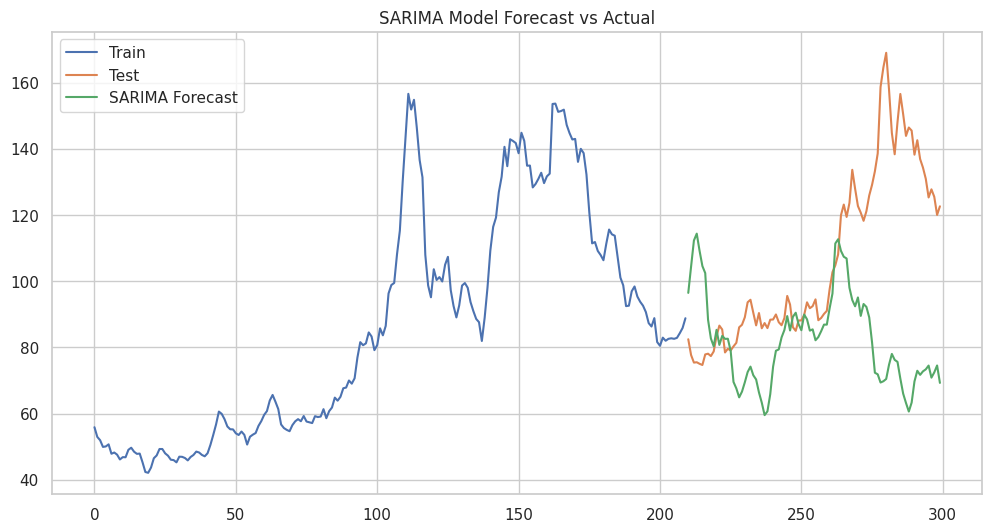

In [124]:
#Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(sarima_forecast_mean.index, sarima_forecast_mean, label='SARIMA Forecast')
plt.title('SARIMA Model Forecast vs Actual')
plt.legend()
plt.show()

In [125]:
forecast_steps = 10
forecast =  sarima_model_fit.forecast(steps=forecast_steps)
forecast

210     96.491767
211    104.467750
212    112.320433
213    114.394458
214    109.185773
215    104.593608
216    102.475336
217     88.345523
218     82.716822
219     80.337753
Name: predicted_mean, dtype: float64

In [126]:
# Create a DataFrame to store the forecasted values
grains_prediction_df = pd.DataFrame(columns=['Year', 'Forecasted Value'])

# Forecasted values for 2023 to 2028
forecast_years = range(2023, 2029)

# Append the forecasted values to the DataFrame
for year, value in zip(forecast_years, arima_forecast_mean):
    grains_prediction_df = grains_prediction_df.append({'Year': year, 'Forecasted Value': value}, ignore_index=True)

grains_prediction_df

Year  Forecasted Value
0  2023.0         89.990454
1  2024.0         90.790171
2  2025.0         91.214321
3  2026.0         91.466521
4  2027.0         91.608884
5  2028.0         91.691135

## **Climatic Conditions**

### **Temperature**

**Linear Regression**

The linear relationship observed in the correlation matrix suggests that a linear model is a reasonable approximation for the underlying patterns in the data. The simplicity of linear regression aligns with the task's requirements, offering a balance between accuracy and interpretability.

In [127]:
# Extract years and transpose the DataFrames
years = [2023, 2024, 2025, 2026, 2027, 2028]

# Function to predict temperatures
def predict_temperatures(df, years):
    df = df.set_index('Region')  # Set 'Region' as index
    df = df.dropna(axis=1)  # Drop columns with NaN values

    X = np.array(df.columns, dtype=int).reshape(-1, 1)

    predictions = {}
    for region in df.index:
        y = np.array(df.loc[region], dtype=float).reshape(-1, 1)

        model = LinearRegression()
        model.fit(X, y)

        future_years = np.array(years).reshape(-1, 1)
        future_predictions = model.predict(future_years)

        predictions[region] = future_predictions.flatten()

    return predictions

# Predict future temperatures for both minimum and maximum
min_temp_predictions = predict_temperatures(min_temp_df, years)
max_temp_predictions = predict_temperatures(max_temp_df, years)

min_temp_predictions_df = pd.DataFrame(min_temp_predictions, index=years)

max_temp_predictions_df = pd.DataFrame(max_temp_predictions, index=years)

In [128]:
min_temp_predictions_df

N-Western  N-Eastern    Western  C-Rift Valley    Central    Nairobi  \
2023  24.546667  21.713333  14.640000      11.700000  12.886667  15.073333   
2024  24.564242  21.772121  14.741818      11.854545  12.824242  15.166667   
2025  24.581818  21.830909  14.843636      12.009091  12.761818  15.260000   
2026  24.599394  21.889697  14.945455      12.163636  12.699394  15.353333   
2027  24.616970  21.948485  15.047273      12.318182  12.636970  15.446667   
2028  24.634545  22.007273  15.149091      12.472727  12.574545  15.540000   

      S-Eastern    Coastal    Country  
2023  18.273333  24.426667  17.893333  
2024  18.397576  24.509697  17.963030  
2025  18.521818  24.592727  18.032727  
2026  18.646061  24.675758  18.102424  
2027  18.770303  24.758788  18.172121  
2028  18.894545  24.841818  18.241818

In [129]:
max_temp_predictions_df

N-Western  N-Eastern    Western  C-Rift Valley    Central    Nairobi  \
2023  35.793333  31.666667  26.160000      24.800000  25.106667  24.346667   
2024  35.793939  31.576970  26.141818      24.834545  25.215152  24.178788   
2025  35.794545  31.487273  26.123636      24.869091  25.323636  24.010909   
2026  35.795152  31.397576  26.105455      24.903636  25.432121  23.843030   
2027  35.795758  31.307879  26.087273      24.938182  25.540606  23.675152   
2028  35.796364  31.218182  26.069091      24.972727  25.649091  23.507273   

      S-Eastern    Coastal    Country  
2023  29.273333  30.853333  28.526667  
2024  29.341212  30.861212  28.526061  
2025  29.409091  30.869091  28.525455  
2026  29.476970  30.876970  28.524848  
2027  29.544848  30.884848  28.524242  
2028  29.612727  30.892727  28.523636

**Model Evaluation**

In [130]:
# Function to evaluate the model's performance
def evaluate_model(df, years):
    df = df.set_index('Region')

    X = np.array(df.columns, dtype=int).reshape(-1, 1)

    mae_values = []
    for region in df.index:
        y_true = np.array(df.loc[region], dtype=float).reshape(-1, 1)

        model = LinearRegression()
        model.fit(X, y_true)

        y_pred = model.predict(X)

        # Evaluate performance using MAE
        mae = mean_absolute_error(y_true, y_pred)
        mae_values.append(mae)

    return mae_values

# Evaluate the model for both minimum and maximum temperatures
min_temp_mae_values = evaluate_model(min_temp_df, years)
max_temp_mae_values = evaluate_model(max_temp_df, years)

# Display the evaluation results
print("\nMinimum Temperature MAE for each region:")
print(min_temp_mae_values)

print("\nMaximum Temperature MAE for each region:")
print(max_temp_mae_values)

# Calculate average MAE for each temperature type
avg_min_temp_mae = np.mean(min_temp_mae_values)
avg_max_temp_mae = np.mean(max_temp_mae_values)

print("\nAverage Minimum Temperature MAE:", avg_min_temp_mae)
print("Average Maximum Temperature MAE:", avg_max_temp_mae)



Minimum Temperature MAE for each region:
[0.2976969696969697, 0.3335757575757558, 0.37927272727272837, 0.28181818181818363, 0.25648484848484754, 0.19066666666666893, 0.2419393939393956, 0.15369696969697166, 0.15478787878788652]

Maximum Temperature MAE for each region:
[0.29381818181817965, 0.7721212121212087, 0.33999999999999986, 0.3796363636363626, 0.28896969696970026, 0.44036363636363623, 0.4346666666666671, 0.16921212121212115, 0.30460606060605927]

Average Minimum Temperature MAE: 0.25443771043771196
Average Maximum Temperature MAE: 0.38037710437710387


Observation:

Average Minimum Temperature MAE (0.2544): On average, our model for minimum temperatures has an absolute deviation of approximately 0.2544 from the actual values.

Average Maximum Temperature MAE (0.3804): On average, our model for maximum temperatures has an absolute deviation of approximately 0.3804 from the actual values.

These low MAE values suggest that your models are performing well in predicting temperatures based on the given features.

### **Rainfall**

Forecasted DataFrame:
       N-Western   N-Eastern      Western  C-Rift Valley     Central  \
2023  122.990211  383.915936  1370.453494     957.433213  731.229314   
2024  107.329343  425.133464  1369.917305     953.621542  744.072235   
2025  119.978137  437.460664  1370.254154     953.752393  739.882808   
2026  109.762100  441.147442  1370.042536     953.747901  741.249421   
2027  118.013275  442.250071  1370.175480     953.748055  740.803624   
2028  111.349059  442.579841  1370.091961     953.748050  740.949045   

         Nairobi   S-Eastern     Coastal  
2023  929.007053  414.360853  750.581230  
2024  895.650731  482.514567  740.786637  
2025  900.450603  520.413526  743.560802  
2026  899.759917  541.488402  742.775063  
2027  899.859304  553.207732  742.997612  
2028  899.845003  559.724624  742.934578  


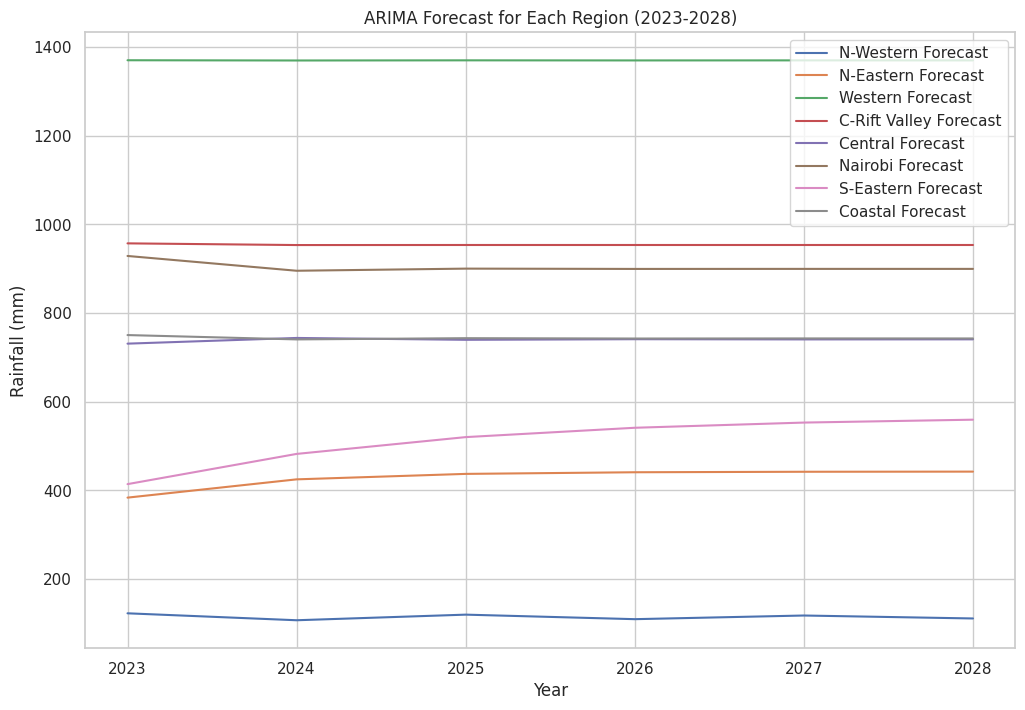

In [131]:
# Extracting relevant columns
years = rain_df.columns[1:]
regions_data = rain_df.set_index('Region').T

# Number of steps to forecast
forecast_steps = 6

# Create an empty DataFrame to store forecast values
forecast_df_ = pd.DataFrame(index=range(2023, 2029))

# Loop through each region
for region in regions_data.columns:
    # Extract the time series data for the current region
    region_data = regions_data[region]

    # Assuming the series is already stationary
    region_data_diff = region_data

    # Fit ARIMA model (start with ARIMA(1, 1, 1))
    model = ARIMA(region_data_diff, order=(1, 1, 1))
    results = model.fit()

    # Make forecasts for the next 6 years (2023 to 2028)
    forecast = results.get_forecast(steps=forecast_steps)

    # Extracting forecast values
    forecast_values = forecast.predicted_mean

    # Store forecast values in the DataFrame
    forecast_df_[region] = forecast_values.values

# Print the forecasted DataFrame
print("Forecasted DataFrame:")
print(forecast_df_)

# Plotting the line graph for each region
plt.figure(figsize=(12, 8))
for region in forecast_df_.columns:
    plt.plot(forecast_df_.index, forecast_df_[region], label=f'{region} Forecast')

plt.title('ARIMA Forecast for Each Region (2023-2028)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()

In [132]:
# Ensure the index is set to the years
regions_data.index = regions_data.index.astype(int)

# Extract the actual rainfall data for the last 6 years (2017 to 2022)
actual_data = regions_data.loc[2017:2022]

# Extract the forecasted rainfall data for the last 6 years (2023 to 2028) from forecast_df
forecast_data = forecast_df_.loc[2023:2028]

# Create empty lists to store evaluation metrics for each region
mae_list = []
rmse_list = []

# Iterate over each region
for region in actual_data.columns:
    # Calculate MAE and RMSE for the current region
    mae = mean_absolute_error(actual_data[region], forecast_data[region])
    rmse = np.sqrt(mean_squared_error(actual_data[region], forecast_data[region]))

    # Append the metrics to the lists
    mae_list.append(mae)
    rmse_list.append(rmse)

# Calculate the average MAE and RMSE across all regions
average_mae = np.mean(mae_list)
average_rmse = np.mean(rmse_list)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Average MAE: {average_mae:.2f}")
print(f"Average RMSE: {average_rmse:.2f}")


Evaluation Metrics:
Average MAE: 265.58
Average RMSE: 311.76


Observations:

Due to the high RSME in the ARIMA model, we will use Linear Regression to see whether the model will improve its performance.

**Linear Regression**

Recall the model we used for temperature: predict_temperatures(df, years)

In [133]:
years = [2023, 2024, 2025, 2026, 2027, 2028]

# Predict future rainfall patterns
rain_predictions = predict_temperatures(rain_df, years)
rain_prediction_df = pd.DataFrame(rain_predictions, index=years)
rain_prediction_df

N-Western   N-Eastern      Western  C-Rift Valley      Central  \
2023  227.388667  374.993333  1641.993333     950.166667  1164.700000   
2024  226.842424  361.321212  1637.328485     948.927879  1168.914545   
2025  226.296182  347.649091  1632.663636     947.689091  1173.129091   
2026  225.749939  333.976970  1627.998788     946.450303  1177.343636   
2027  225.203697  320.304848  1623.333939     945.211515  1181.558182   
2028  224.657455  306.632727  1618.669091     943.972727  1185.772727   

         Nairobi   S-Eastern     Coastal  
2023  899.840000  578.633333  843.793333  
2024  899.801818  574.464848  823.686667  
2025  899.763636  570.296364  803.580000  
2026  899.725455  566.127879  783.473333  
2027  899.687273  561.959394  763.366667  
2028  899.649091  557.790909  743.260000

In [134]:
years = [2023, 2024, 2025, 2026, 2027, 2028]

# Evaluate the model for Rainfall
rain_values = evaluate_model(rain_df, years)
# Calculate average MAE for each temperature type
avg_rain_mae = np.mean(rain_values)
print("\nAverage Rainfall MAE:", avg_rain_mae)


Average Rainfall MAE: 161.67413939393919


# **PREDICTION DATASETS**

## **Data Cleaning and Pre-Processing**

Drop 2023 column in all predictions dataset.

In [135]:
def drop_row_by_index(df):
    for df_name, data in df.items():
        df[df_name] = data.drop(2023, errors='ignore')
        df.dropna(inplace=True)
    return df

### **Minimum Temperature**

In [136]:
min_temp_prediction_df = drop_row_by_index(min_temp_predictions_df)
min_temp_prediction_df.head()

N-Western  N-Eastern    Western  C-Rift Valley    Central    Nairobi  \
2024  24.564242  21.772121  14.741818      11.854545  12.824242  15.166667   
2025  24.581818  21.830909  14.843636      12.009091  12.761818  15.260000   
2026  24.599394  21.889697  14.945455      12.163636  12.699394  15.353333   
2027  24.616970  21.948485  15.047273      12.318182  12.636970  15.446667   
2028  24.634545  22.007273  15.149091      12.472727  12.574545  15.540000   

      S-Eastern    Coastal    Country  
2024  18.397576  24.509697  17.963030  
2025  18.521818  24.592727  18.032727  
2026  18.646061  24.675758  18.102424  
2027  18.770303  24.758788  18.172121  
2028  18.894545  24.841818  18.241818

### **Maximum Temperature**

In [137]:
max_temp_prediction_df = drop_row_by_index(max_temp_predictions_df)
max_temp_prediction_df.head()

N-Western  N-Eastern    Western  C-Rift Valley    Central    Nairobi  \
2024  35.793939  31.576970  26.141818      24.834545  25.215152  24.178788   
2025  35.794545  31.487273  26.123636      24.869091  25.323636  24.010909   
2026  35.795152  31.397576  26.105455      24.903636  25.432121  23.843030   
2027  35.795758  31.307879  26.087273      24.938182  25.540606  23.675152   
2028  35.796364  31.218182  26.069091      24.972727  25.649091  23.507273   

      S-Eastern    Coastal    Country  
2024  29.341212  30.861212  28.526061  
2025  29.409091  30.869091  28.525455  
2026  29.476970  30.876970  28.524848  
2027  29.544848  30.884848  28.524242  
2028  29.612727  30.892727  28.523636

### **Rainfall**

In [138]:
 rainfall_prediction_df = drop_row_by_index(rain_prediction_df)
 rainfall_prediction_df.head()

N-Western   N-Eastern      Western  C-Rift Valley      Central  \
2024  226.842424  361.321212  1637.328485     948.927879  1168.914545   
2025  226.296182  347.649091  1632.663636     947.689091  1173.129091   
2026  225.749939  333.976970  1627.998788     946.450303  1177.343636   
2027  225.203697  320.304848  1623.333939     945.211515  1181.558182   
2028  224.657455  306.632727  1618.669091     943.972727  1185.772727   

         Nairobi   S-Eastern     Coastal  
2024  899.801818  574.464848  823.686667  
2025  899.763636  570.296364  803.580000  
2026  899.725455  566.127879  783.473333  
2027  899.687273  561.959394  763.366667  
2028  899.649091  557.790909  743.260000

### **Fuel**

In [139]:
# Set 'Year' column as index
fuel_prediction_df = fuel_prediction_df.astype(int).set_index('Year')
fuel_prediction_df.head()

Forecasted Value
Year                  
2023               211
2024               205
2025               218
2026               208
2027               216

### **Grains**

In [140]:
# Set 'Year' column as index
grains_prediction_df = grains_prediction_df.astype(int).set_index('Year')
grains_prediction_df.head()

Forecasted Value
Year                  
2023                89
2024                90
2025                91
2026                91
2027                91

### **Fertilizer**

In [141]:
# Set 'Year' column as index
fertilizer_prediction_df = forecast_df.astype(int).set_index('Year')
fertilizer_prediction_df.head()

Forecasted Value
Year                  
2023                92
2024                94
2025                97
2026                99
2027                99

### **Population**

In [142]:
population_prediction_df = predictions_df.drop(columns='2023')
population_prediction_df.head()

County          2024          2025          2026          2027  \
0       Kenya  51958.633535  52469.245812  52897.305742  53256.159830   
1     Mombasa   1330.218920   1350.375205   1368.788030   1385.608198   
2       Kwale    954.030481    965.429727    974.742890    982.351726   
3      Kilifi   1608.365654   1638.354481   1668.214714   1697.946905   
4  Tana River    361.783192    370.561483    379.265095    387.894662   

           2028  
0  53556.996809  
1   1400.973470  
2    988.568130  
3   1727.551601  
4    396.450814

### **Crops GDP**

In [143]:
crops_gdp_prediction_df = growing_of_crops_df.drop(columns=[2018,2019, '2020', '2021', '2022'])
crops_gdp_prediction_df.head()

Industry      2024       2025       2026       2027       2028
0  Growing of Crops  15.29238  15.310438  15.313967  15.314657  15.314792

### **Retail Prices of Crops**

In [144]:
retail_prediction_df

Crop  Year  Retail Predictions
0      Maize  2024           46.324773
1      Maize  2025           46.313836
2      Maize  2026           46.313741
3      Maize  2027           46.313740
4      Maize  2028           46.313740
5      Beans  2024          100.325336
6      Beans  2025          101.977297
7      Beans  2026          101.818402
8      Beans  2027          101.833685
9      Beans  2028          101.832215
10  Potatoes  2024           56.205117
11  Potatoes  2025           55.866582
12  Potatoes  2026           55.836381
13  Potatoes  2027           55.833687
14  Potatoes  2028           55.833447
15   Bananas  2024           10.888867
16   Bananas  2025           11.369154
17   Bananas  2026           11.628671
18   Bananas  2027           11.768897
19   Bananas  2028           11.844667

# **RECOMMENDER SYSTEM**

## **Assign Risk Percentages**

### **Population**

In [145]:
# Drop Kenya row
population_prediction_df = population_prediction_df.drop(population_prediction_df[population_prediction_df['County'] == 'Kenya'].index)
population_prediction_df.head()

County         2024         2025         2026         2027         2028
1     Mombasa  1330.218920  1350.375205  1368.788030  1385.608198  1400.973470
2       Kwale   954.030481   965.429727   974.742890   982.351726   988.568130
3      Kilifi  1608.365654  1638.354481  1668.214714  1697.946905  1727.551601
4  Tana River   361.783192   370.561483   379.265095   387.894662   396.450814
5        Lamu   169.585854   172.150356   174.326033   176.171837   177.737784

In [146]:
population_prediction_df = population_prediction_df.rename(columns={
    '2024': 2024,
    '2025': 2025,
    '2026' : 2026,
    '2027': 2027,
    '2028' : 2028
})
population_prediction_df.columns

Index(['County', 2024, 2025, 2026, 2027, 2028], dtype='object')

In [147]:
# Iterate over each year column
for year in range(2024, 2029):
    # Calculate the total population for the current year
    total_population = population_prediction_df[year].sum()

    # Calculate the percentage of each county's population for the current year
    population_prediction_df[f'Percentage_{year}'] = (population_prediction_df[year] / total_population) * 100

population_prediction_df = population_prediction_df.drop(columns=[2024, 2025, 2026, 2027, 2028])
population_prediction_df

County  Percentage_2024  Percentage_2025  Percentage_2026  \
1           Mombasa         2.544291         2.544976         2.544096   
2             Kwale         1.824761         1.819491         1.811705   
3            Kilifi         3.076298         3.087715         3.100625   
4        Tana River         0.691978         0.698376         0.704921   
5              Lamu         0.324364         0.324442         0.324011   
6      Taita/Taveta         0.709593         0.709192         0.709047   
7           Garissa         1.814811         1.829349         1.844591   
8             Wajir         1.706057         1.722448         1.739503   
9           Mandera         1.878629         1.894863         1.911448   
10         Marsabit         1.007623         1.014105         1.020338   
11           Isiolo         0.619051         0.621231         0.622364   
12             Meru         3.149534         3.141668         3.136116   
13    Tharaka-Nithi         0.800414         0.793528         0.786693   
14             Embu         1.253281         1.245444         1.237558   
15            Kitui         2.362731         2.341430         2.319528   
16         Machakos         2.871098         2.855507         2.841680   
17          Makueni         2.017391         2.008985         2.001401   
18        Nyandarua         1.354259         1.357046         1.360052   
19            Nyeri         1.583280         1.565260         1.539506   
20        Kirinyaga         1.259830         1.248930         1.237900   
21         Murang'a         2.149350         2.138999         2.129610   
22           Kiambu         5.152959         5.157295         5.160725   
23          Turkana         2.000601         2.016818         2.033533   
24       West Pokot         1.309078         1.308043         1.305747   
25          Samburu         0.682439         0.689125         0.696029   
26      Trans Nzoia         2.078911         2.084115         2.090534   
27      Uasin Gishu         2.451335         2.460055         2.469424   
28  Elgeyo/Marakwet         0.955612         0.950261         0.944472   
29            Nandi         1.845917         1.845369         1.845491   
30          Baringo         1.435775         1.445199         1.455122   
31         Laikipia         1.092742         1.096805         1.101482   
32           Nakuru         4.578466         4.599685         4.622762   
33            Narok         2.491791         2.494254         2.492227   
34          Kajiado         2.463942         2.468452         2.470641   
35          Kericho         1.847760         1.842662         1.838501   
36            Bomet         1.820222         1.814520         1.808833   
37         Kakamega         3.894667         3.902117         3.911505   
38           Vihiga         1.200444         1.187850         1.175366   
39          Bungoma         3.473391         3.477077         3.482958   
40           Busia          1.885391         1.891155         1.897843   
41            Siaya         2.037620         2.022740         2.006055   
42           Kisumu         2.425937         2.426758         2.428142   
43         Homa Bay         2.396313         2.402321         2.409035   
44           Migori         2.415550         2.434620         2.454716   
45            Kisii         2.589527         2.567668         2.545758   
46          Nyamira         1.259997         1.243637         1.227769   
47     Nairobi City         9.214990         9.208411         9.202636   

    Percentage_2027  Percentage_2028  
1          2.541402         2.537413  
2          1.801772         1.790473  
3          3.114275         3.128905  
4          0.711454         0.718043  
5          0.323124         0.321915  
6          0.708989         0.709076  
7          1.860110         1.876065  
8          1.756823         1.774561  
9          1.927962         1.944590  
10         1.026133         1.031623  
11         0.622523         0.6

### **Retail Prices of Crops**

A higher profit margin means that a greater portion of each sale contributes to covering expenses and generating profit. Therefore, if the price of a product is higher, it can potentially offset higher expenses or risks associated with operating a business.

We will use the overall percentages of the prices as it explains the percentage contribution to its revenue.

In [148]:
# Calculate the sum of prices for each year
sum_prices_per_year = retail_prediction_df.groupby('Year')['Retail Predictions'].sum()

# Merge the sum of prices back into the original DataFrame
retail_prediction_df = pd.merge(retail_prediction_df, sum_prices_per_year, on='Year', suffixes=('', '_sum'))

# Calculate the percentage of each crop's price for every year
retail_prediction_df['Price Percentage'] = (retail_prediction_df['Retail Predictions'] / retail_prediction_df['Retail Predictions_sum']) * 100

# Display the DataFrame with price percentages
print(retail_prediction_df[['Crop', 'Year', 'Price Percentage']])

        Crop  Year  Price Percentage
0      Maize  2024         21.673007
1      Beans  2024         46.937127
2   Potatoes  2024         26.295518
3    Bananas  2024          5.094348
4      Maize  2025         21.488660
5      Beans  2025         47.315352
6   Potatoes  2025         25.920936
7    Bananas  2025          5.275052
8      Maize  2026         21.481607
9      Beans  2026         47.226218
10  Potatoes  2026         25.898473
11   Bananas  2026          5.393702
12     Maize  2027         21.466391
13     Beans  2027         47.199852
14  Potatoes  2027         25.878880
15   Bananas  2027          5.454877
16     Maize  2028         21.459025
17     Beans  2028         47.182974
18  Potatoes  2028         25.869889
19   Bananas  2028          5.488112


In [149]:
retail_prediction_df = retail_prediction_df.drop(columns=['Retail Predictions', 'Retail Predictions_sum'])
retail_prediction_df

Crop  Year  Price Percentage
0      Maize  2024         21.673007
1      Beans  2024         46.937127
2   Potatoes  2024         26.295518
3    Bananas  2024          5.094348
4      Maize  2025         21.488660
5      Beans  2025         47.315352
6   Potatoes  2025         25.920936
7    Bananas  2025          5.275052
8      Maize  2026         21.481607
9      Beans  2026         47.226218
10  Potatoes  2026         25.898473
11   Bananas  2026          5.393702
12     Maize  2027         21.466391
13     Beans  2027         47.199852
14  Potatoes  2027         25.878880
15   Bananas  2027          5.454877
16     Maize  2028         21.459025
17     Beans  2028         47.182974
18  Potatoes  2028         25.869889
19   Bananas  2028          5.488112

### **Material Inputs**

**Rename the columns**

In [150]:
fuel_prediction_df = fuel_prediction_df.rename(columns={'Forecasted Value': 'Fuel_prices'})
fuel_prediction_df.head()

Fuel_prices
Year             
2023          211
2024          205
2025          218
2026          208
2027          216

In [151]:
fertilizer_prediction_df = fertilizer_prediction_df.rename(columns={'Forecasted Value': 'Fertilizer_prices'})
fertilizer_prediction_df.head()

Fertilizer_prices
Year                   
2023                 92
2024                 94
2025                 97
2026                 99
2027                 99

In [152]:
grains_prediction_df = grains_prediction_df.rename(columns={'Forecasted Value': 'Grains_prices'})
grains_prediction_df.head()

Grains_prices
Year               
2023             89
2024             90
2025             91
2026             91
2027             91

In [153]:
# Merge dfs
merged_df = pd.merge(fuel_prediction_df, fertilizer_prediction_df, on='Year')

# Merge the result with df3 on another common column
Material_input_df = pd.merge(merged_df, grains_prediction_df, on='Year')

Material_input_df.head()

Fuel_prices  Fertilizer_prices  Grains_prices
Year                                               
2023          211                 92             89
2024          205                 94             90
2025          218                 97             91
2026          208                 99             91
2027          216                 99             91

In [154]:
# Calculate the sum of prices for each year
sum_prices_per_year = Material_input_df.sum(axis=1)

# Merge the sum of prices back into the original DataFrame
Material_input_df['Total Prices'] = sum_prices_per_year

# Calculate the percentage of each column's price for every year
for col in Material_input_df.columns[0:]:
    Material_input_df[f'{col} Percentage'] = (Material_input_df[col] / Material_input_df['Total Prices']) * 100

Material_input_df = Material_input_df.drop(columns=['Fuel_prices', 'Fertilizer_prices', 'Grains_prices', 'Total Prices', 'Total Prices Percentage'])

Material_input_df.head()

Fuel_prices Percentage  Fertilizer_prices Percentage  \
Year                                                         
2023               53.826531                     23.469388   
2024               52.699229                     24.164524   
2025               53.694581                     23.891626   
2026               52.261307                     24.874372   
2027               53.201970                     24.384236   

      Grains_prices Percentage  
Year                            
2023                 22.704082  
2024                 23.136247  
2025                 22.413793  
2026                 22.864322  
2027                 22.413793

### **Climatic Conditions**

Maize:

Maize is grown in many parts of Kenya, but it thrives best in areas with temperatures ranging from 20°C to 30°C. Maize requires rainfall of about 600mm to 1000mm during the growing season. It is often cultivated in regions with a bimodal rainfall pattern. Some of the major maize-producing counties in Kenya include Uasin Gishu, Nakuru, Trans Nzoia, Kakamega, Nandi, Bungoma, and Kisii.

Beans:

Beans are grown in various regions of Kenya, with some of the major bean-producing counties being Nakuru, Uasin Gishu, Bungoma, and Trans Nzoia. Beans prefer temperatures between 18°C and 25°C. They require a rainfall of about 600mm to 1200mm during the growing season.

Potatoes:

Potatoes are cultivated in various parts of Kenya, with significant production in highland areas such as Nyandarua, Nakuru, and Meru. Potatoes grow well in cooler climates with temperatures ranging from 10°C to 20°C. They require moderate rainfall of about 500mm to 800mm during the growing season.

Bananas:

Bananas are grown in several regions across Kenya, including Meru, Embu, Kisii, Bungoma, and Kakamega. Bananas thrive in warm and humid tropical climates with temperatures between 20°C and 30°C. They require ample rainfall, typically between 1000mm to 2500mm annually, distributed evenly throughout the year.

In [155]:
# Drop the 'Country' column
max_temp_prediction_df = max_temp_prediction_df.drop(columns=['Country'])
min_temp_prediction_df = min_temp_prediction_df.drop(columns=['Country'])

In [156]:
# Print out the temperature and rainfall data for each region
print("Temperature and Rainfall Data:")
print(rainfall_prediction_df)
print(max_temp_prediction_df)
print(min_temp_prediction_df)

# Crop Criteria
crop_criteria = {
    "Maize": {"temp_min": 20, "temp_max": 30, "rainfall_min": 600, "rainfall_max": 1000},
    "Beans": {"temp_min": 18, "temp_max": 25, "rainfall_min": 600, "rainfall_max": 1200},
    "Potatoes": {"temp_min": 10, "temp_max": 20, "rainfall_min": 500, "rainfall_max": 800},
    "Bananas": {"temp_min": 20, "temp_max": 30, "rainfall_min": 1000, "rainfall_max": 2500}
}
print(crop_criteria)

Temperature and Rainfall Data:
       N-Western   N-Eastern      Western  C-Rift Valley      Central  \
2024  226.842424  361.321212  1637.328485     948.927879  1168.914545   
2025  226.296182  347.649091  1632.663636     947.689091  1173.129091   
2026  225.749939  333.976970  1627.998788     946.450303  1177.343636   
2027  225.203697  320.304848  1623.333939     945.211515  1181.558182   
2028  224.657455  306.632727  1618.669091     943.972727  1185.772727   

         Nairobi   S-Eastern     Coastal  
2024  899.801818  574.464848  823.686667  
2025  899.763636  570.296364  803.580000  
2026  899.725455  566.127879  783.473333  
2027  899.687273  561.959394  763.366667  
2028  899.649091  557.790909  743.260000  
      N-Western  N-Eastern    Western  C-Rift Valley    Central    Nairobi  \
2024  35.793939  31.576970  26.141818      24.834545  25.215152  24.178788   
2025  35.794545  31.487273  26.123636      24.869091  25.323636  24.010909   
2026  35.795152  31.397576  26.105455 

In [157]:
# Function to check if a region meets crop criteria based on temperature or rainfall
def check_region(region_data, criteria):
    suitable_regions = []
    # print("Criteria:", criteria)
    for region, year_data in region_data.items():
        for year, data in year_data.items():
            if (criteria["temp_min"] <= data <= criteria["temp_max"] or
                criteria["rainfall_min"] <= data <= criteria["rainfall_max"]):
                suitable_regions.append(region)
                break  # No need to check further years for this region
    return suitable_regions

# Check which regions each crop can grow in based on temperature or rainfall
print("\nCrop Suitability Based on Temperature and Rainfall:")
for crop, criteria in crop_criteria.items():
    suitable_regions = check_region(rainfall_prediction_df.to_dict(), criteria) + \
                       check_region(max_temp_prediction_df.to_dict(), criteria) + \
                       check_region(min_temp_prediction_df.to_dict(), criteria)
    print(f"\n{crop}:")
    print(", ".join(suitable_regions))



Crop Suitability Based on Temperature and Rainfall:

Maize:
C-Rift Valley, Nairobi, Coastal, Western, C-Rift Valley, Central, Nairobi, S-Eastern, N-Western, N-Eastern, Coastal

Beans:
C-Rift Valley, Central, Nairobi, Coastal, C-Rift Valley, Nairobi, N-Western, N-Eastern, S-Eastern, Coastal

Potatoes:
S-Eastern, Coastal, Western, C-Rift Valley, Central, Nairobi, S-Eastern

Bananas:
Western, Central, Western, C-Rift Valley, Central, Nairobi, S-Eastern, N-Western, N-Eastern, Coastal


In [158]:
# Function to check if a region meets crop criteria based on temperature or rainfall
def check_region(region_data, criteria):
    suitable_regions = []
    for region, year_data in region_data.items():
        for year, data in year_data.items():
            if (criteria["temp_min"] <= data <= criteria["temp_max"] or
                criteria["rainfall_min"] <= data <= criteria["rainfall_max"]):
                suitable_regions.append(region)
                break  # No need to check further years for this region
    return suitable_regions

# Initialize an empty DataFrame to store the crop suitability
suitability_data = []

# Check which regions each crop can grow in based on temperature or rainfall
for crop, criteria in crop_criteria.items():
    suitable_regions = check_region(rainfall_prediction_df.to_dict(), criteria) + \
                       check_region(max_temp_prediction_df.to_dict(), criteria) + \
                       check_region(min_temp_prediction_df.to_dict(), criteria)
    suitability_data.append({"Crop": crop, "Suitable_Regions": ", ".join(suitable_regions)})

# Create a DataFrame from the suitability data
crop_suitability_df = pd.DataFrame(suitability_data)

crop_suitability_df

Crop                                   Suitable_Regions
0     Maize  C-Rift Valley, Nairobi, Coastal, Western, C-Ri...
1     Beans  C-Rift Valley, Central, Nairobi, Coastal, C-Ri...
2  Potatoes  S-Eastern, Coastal, Western, C-Rift Valley, Ce...
3   Bananas  Western, Central, Western, C-Rift Valley, Cent...

Observation:

We need to map the regions to the counties for uniformity of the recommender system.

In [159]:
county_to_region = {
    'Turkana': 'N-Western',
    'West Pokot': 'N-Western',
    'Trans Nzoia': 'N-Western',
    'Uasin Gishu': 'N-Western',
    'Elgeyo-Marakwet': 'N-Western',
    'Nandi': 'N-Western',
    'Baringo': 'C-Rift Valley',
    'Laikipia': 'C-Rift Valley',
    'Nakuru': 'C-Rift Valley',
    'Narok': 'C-Rift Valley',
    'Kajiado': 'C-Rift Valley',
    'Kericho': 'C-Rift Valley',
    'Bomet': 'C-Rift Valley',
    'Kakamega': 'Western',
    'Vihiga': 'Western',
    'Bungoma': 'Western',
    'Busia': 'Western',
    'Siaya': 'Western',
    'Kisumu': 'Western',
    'Homa Bay': 'Western',
    'Migori': 'Western',
    'Nyamira': 'Western',
    'Kisii': 'Western',
    'Nairobi': 'Nairobi',
    'Mombasa': 'Coastal',
    'Kwale': 'Coastal',
    'Kilifi': 'Coastal',
    'Tana River': 'Coastal',
    'Lamu': 'Coastal',
    'Taita-Taveta': 'Coastal',
    'Garissa': 'N-Eastern',
    'Wajir': 'N-Eastern',
    'Mandera': 'N-Eastern',
    'Marsabit': 'N-Eastern',
    'Samburu': 'N-Eastern',
    'Isiolo': 'S-Eastern',
    'Meru': 'S-Eastern',
    'Tharaka-Nithi': 'S-Eastern',
    'Embu': 'S-Eastern',
    'Kitui': 'S-Eastern',
    'Machakos': 'S-Eastern',
    'Makueni': 'S-Eastern',
    'Nyandarua': 'Central',
    'Nyeri': 'Central',
    'Kirinyaga': 'Central',
    'Murang\'a': 'Central',
    'Kiambu': 'Central'
}

# Function to map regions to counties
def map_counties(regions_str):
    regions = regions_str.split(', ')
    counties = []
    for region in regions:
        counties.extend([county for county, reg in county_to_region.items() if reg == region])
    return ', '.join(counties)

# Map regions to counties and replace the column
crop_suitability_df['Suitable_Counties'] = crop_suitability_df['Suitable_Regions'].apply(map_counties)
crop_suitability_df.drop(columns=['Suitable_Regions'], inplace=True)

crop_suitability_df

Crop                                  Suitable_Counties
0     Maize  Baringo, Laikipia, Nakuru, Narok, Kajiado, Ker...
1     Beans  Baringo, Laikipia, Nakuru, Narok, Kajiado, Ker...
2  Potatoes  Isiolo, Meru, Tharaka-Nithi, Embu, Kitui, Mach...
3   Bananas  Kakamega, Vihiga, Bungoma, Busia, Siaya, Kisum...

## **Recommender System**

In [160]:
def calculate_crop_risks(year, county):
    crop_risks = {}

    # Error handling for county not found
    county_data = population_prediction_df[population_prediction_df["County"] == county]
    if county_data.empty:
        return "County not found in the population prediction data."

    # Error handling for population data not available for the year
    percentage_columns = [f"Percentage_{year}" for year in range(2024, 2029)]
    missing_years = [year for year in percentage_columns if year not in county_data.columns]
    if missing_years:
        return f"Population data not available for the year(s) {', '.join(missing_years)} in {county}."

    # Retrieve the population percentages for the specified year range
    population_percentages = county_data[percentage_columns].values[0]

    # Placeholder for retail risk calculation
    for crop in ["Maize", "Beans", "Potatoes", "Bananas"]:
        retail_risk = 0
        # Calculate retail risk for each crop and year combination
        retail_data = retail_prediction_df[(retail_prediction_df["Year"] == year) & (retail_prediction_df["Crop"] == crop)]
        if not retail_data.empty:
            retail_percentage = retail_data["Price Percentage"].values[0]
            retail_risk = 100 - retail_percentage

        # Check if the year exists in the index
        if year not in Material_input_df.index:
            print(f"No data available for the year {year}.")
        else:
            previous_year_data = Material_input_df.loc[year - 1]

        # Retrieve material input prices percentages for the specified year
        material_prices = Material_input_df.loc[year]

        # Calculate the percentage change in fuel prices, fertilizer prices, and grains prices
        fuel_change = material_prices['Fuel_prices Percentage'] - previous_year_data['Fuel_prices Percentage']
        fertilizer_change = material_prices['Fertilizer_prices Percentage'] - previous_year_data['Fertilizer_prices Percentage']
        grains_change = material_prices['Grains_prices Percentage'] - previous_year_data['Grains_prices Percentage']

        # Assess the risk based on the direction and magnitude of price changes
        material_input_risk = 0
        if fuel_change > 0:
            material_input_risk += 10  # Higher fuel prices indicate higher risk
        if fertilizer_change > 0:
            material_input_risk += 10  # Higher fertilizer prices indicate higher risk
        if grains_change > 0:
            material_input_risk += 5   # Higher grains prices indicate moderate risk

        # GDP risk calculation
        gdp_risk = 15

        # Placeholder for crop suitability risk calculation
        suitability_risk = 0

        # Calculate crop suitability risk
        if crop in crop_suitability_df["Crop"].values:
            suitability_data = crop_suitability_df[crop_suitability_df["Crop"] == crop]
            suitable_counties = suitability_data.iloc[0]["Suitable_Counties"].split(", ")
            if county not in suitable_counties:
                suitability_risk = 70  # Crop is not suitable for cultivation in the county

        # Combine all risk factors into the final risk assessment
        total_risk = (population_percentages[year - 2024] * 10 + material_input_risk + retail_risk + gdp_risk + suitability_risk) / 5

        crop_risks[crop] = total_risk

    return crop_risks

# Example usage
county = "Baringo"
year = 2024

# Calculate risks for four crops
risks = calculate_crop_risks(year, county)
for crop, risk in risks.items():
    print(f"Risk for {crop} in {county} in {year}: {risk}")

Risk for Maize in Baringo in 2024: 24.53694932139531
Risk for Beans in Baringo in 2024: 19.484125465186278
Risk for Potatoes in Baringo in 2024: 23.612447130830237
Risk for Bananas in Baringo in 2024: 27.85268125584371


# **DEPLOYMENT**

In [161]:
# Save population prediction DataFrame to CSV
population_prediction_df.to_csv("population_prediction.csv", index=True)

# Save retail prediction DataFrame to CSV
retail_prediction_df.to_csv("retail_prediction.csv", index=True)

# Save material input DataFrame to CSV
Material_input_df.to_csv("material_input.csv", index=True)

# Save crop suitability DataFrame to CSV
crop_suitability_df.to_csv("crop_suitability.csv")

# Save crop GDP DataFrame to CSV
crops_gdp_prediction_df.to_csv("crop_gdp.csv", index=True)

In [162]:
!pip install streamlit

In [164]:
import streamlit as st

population_prediction_df = pd.read_csv("population_prediction.csv", index_col=0)
retail_prediction_df = pd.read_csv("retail_prediction.csv", index_col=0)
Material_input_df = pd.read_csv("material_input.csv", index_col=0)
crop_suitability_df = pd.read_csv("crop_suitability.csv", index_col=0)

def calculate_crop_risks(year, county):
    crop_risks = {}

    # Error handling for county not found
    county_data = population_prediction_df[population_prediction_df["County"] == county]
    if county_data.empty:
        return {"error": "County not found in the population prediction data."}

    # Error handling for population data not available for the year
    percentage_columns = [f"Percentage_{year}" for year in range(2024, 2029)]
    missing_years = [year for year in percentage_columns if year not in county_data.columns]
    if missing_years:
        return {"error": f"Population data not available for the year(s) {', '.join(missing_years)} in {county}."}

    # Retrieve the population percentages for the specified year range
    population_percentages = county_data[percentage_columns].values[0]

    # Placeholder for retail risk calculation
    for crop in ["Maize", "Beans", "Potatoes", "Bananas"]:
        retail_risk = 0
        # Calculate retail risk for each crop and year combination
        retail_data = retail_prediction_df[(retail_prediction_df["Year"] == year) & (retail_prediction_df["Crop"] == crop)]
        if not retail_data.empty:
            retail_percentage = retail_data["Price Percentage"].values[0]
            retail_risk = 100 - retail_percentage

        # Check if the year exists in the index
        if year not in Material_input_df.index:
            print(f"No data available for the year {year}.")
        else:
            previous_year_data = Material_input_df.loc[year - 1]

        # Retrieve material input prices percentages for the specified year
        material_prices = Material_input_df.loc[year]

        # Calculate the percentage change in fuel prices, fertilizer prices, and grains prices
        fuel_change = material_prices['Fuel_prices Percentage'] - previous_year_data['Fuel_prices Percentage']
        fertilizer_change = material_prices['Fertilizer_prices Percentage'] - previous_year_data['Fertilizer_prices Percentage']
        grains_change = material_prices['Grains_prices Percentage'] - previous_year_data['Grains_prices Percentage']

        # Assess the risk based on the direction and magnitude of price changes
        material_input_risk = 0
        if fuel_change > 0:
            material_input_risk += 10  # Higher fuel prices indicate higher risk
        if fertilizer_change > 0:
            material_input_risk += 10  # Higher fertilizer prices indicate higher risk
        if grains_change > 0:
            material_input_risk += 5   # Higher grains prices indicate moderate risk

        # GDP risk calculation
        gdp_risk = 15

        # Placeholder for crop suitability risk calculation
        suitability_risk = 0

        # Calculate crop suitability risk
        if crop in crop_suitability_df["Crop"].values:
            suitability_data = crop_suitability_df[crop_suitability_df["Crop"] == crop]
            suitable_counties = suitability_data.iloc[0]["Suitable_Counties"].split(", ")
            if county not in suitable_counties:
                suitability_risk = 70  # Crop is not suitable for cultivation in the county

        # Combine all risk factors into the final risk assessment
        total_risk = (population_percentages[year - 2024] * 10 + material_input_risk + retail_risk + gdp_risk + suitability_risk) / 5

        crop_risks[crop] = total_risk

    return crop_risks

# Define the main function
def main():
    # Streamlit app title
    st.title("Crop Recommender System")

    # User input for year and county
    year = st.number_input("Enter the year", value=2024)
    county = st.text_input("Enter the county")

    # Calculate risks for four crops
    risks = calculate_crop_risks(year, county)
    if "error" in risks:
        st.error(risks["error"])
    else:
        for crop, risk in risks.items():
            st.write(f"Risk for {crop} in {county} in {year}: {risk}")

# Run the main function
if __name__ == "__main__":
    main()


2024-01-28 17:05:52.486 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
